# [Chapter 12 ]

*KU LeeDongGyu*

## 1. Introduction

In [ ]:
# 12-1)

# NN의 꽃이라 할 수 있는 RNN에 대해 알아보자
# 우리가 사용하는 데이터 중에서는 sequence 데이터가 굉장히 많다.

# 예를들어 언어, 음성인식들은 sequence로 되어있다.
# 말이란 것은 단어만 이해한다고 맥락을 이해하는 것이 아니다.
# 이런것이 sequence data이다.

# CNN, NN은 입력과 출력의 간단한 형태였고, 이런 형태의 series 데이터를 처리하기는 불편하다.
# series 데이터라는 것은 어느 연산이 그다음으로 영향을 미쳐야 series가 된다.

# x -> : ㅁ : -> Y 임.  : ㅁ : 는 뺑뺑이를 돌리면서 학습시킨다는 뜻. 즉,

#  y      y       y       y
#  |      |       |       |
# ㅁ  -> ㅁ   -> ㅁ    -> ㅁ
#  |      |       |       |
#  x      x       x       x    이런 형태로 이루어져 있음. 물론 x에서 y로 가는 | 도 화살표임.
# t-1     t      t+1    t+2

# 이때, ㅁ -> ㅁ 들에서, ㅁ -> ㅁ 는 첫번째 ㅁ 이 두번째 ㅁ 에 영향을 미친다는 뜻이다.
# 이 형태를  : ㅁ :  로 recurrent라는 의미로 쓰자.

# 그러면 이걸 어떻게 계산할까?

# RNN 은 State라는 개념이 있다. 위의 ㅁ가 이 State에 해당한다고 볼 수 있음.
# 수식으로 적으면 다음과 같다.

#  h_t = f_w (h_t-1 , x_t )
# h_t : new state
# f_w : some function with parameters W
# h_t-1 : old state
# x_t : input vector at some time step

# 여기서 RNN을  :ㅁ:로 간단히 표현하는 이유가 무엇이냐면,
# f_W라는 함수는 모든 RNN에 대해서 동일하기 때문에 , 마치 전체가 하나와 같다 로 
# 말할 수 있다.

# 어떻게 계산하는지 좀 더 구체적으로 구해보자

# < Vanilla RNN >
# 가장 기본적인 RNN.

# // h_t = tanh(W_hh * h_t-1 + W_xh * x_t ) #RNN은 tanh가 잘 작동됨.  //
# h_t-1 과 x_t 는 입력이고 W_hh과 W_xh는 weight임. 이는 선형연산에서 WX처럼
# 취급하고 계산을 직관적으로 이해하기 위해서임과 동일.

# 그리고 

# y_t = W_hy * h_t 로 계산함.
# 이때 W_hy 는 또다른 형태의 weight임. 역시 WX와 같은 형태.
# y_t가 몇 차원 벡터일지는 W_hy가 어떤 차원의 벡터인지에 따라서 결과가 다르게 나옴.

# 정리하면

# W_hh , W_xh , W_hy는 전체의 각 ㅁ 에서 모두 똑같은 값으로 학습 한다. -> RNN

# 실제로 어떻게 연산을 하는지 알아보자.

# - Character level language model example -
# Vocabulary : ['h','e','l','o']
# example training sequence : "hello"

# 'e'     'l'    'l'      'o'
#  y      y       y       y
#  |      |       |       |
# ㅁ  -> ㅁ   -> ㅁ    -> ㅁ
#  |      |      |        |
#  x      x       x       x
# 'h'    'e'    'l'      'l'  (x입력) - 각 철자 레벨에서 봤음.

# 현재 철자가 어떤 값일 때, 다음 철자는 무엇일까? 라는 알고리즘을 만든다고 생각하자.

# 우선 각 입력 ( 'h', 'e', 'l', 'l')  을 벡터로 표현해야 한다. 이를 one-hot encoding으로 코딩할 수 있다.

# 'h' = (1,0,0,0) , 'e' = (0,1,0,0) , 'l' = (0,0,1,0) , 'o' =(0,0,0,1) 
# 맨 처음 계산을 통해,  Vanilla RNN을 사용하고, 
# h_t = tanh(W_hh * h_t-1 + W_xh * x_t ) 중, h_0 는 0이라고 가정하자.

# 'h' -> W_xh -> (0.3,-0.1,0.9) =h_1 가 나왔다고 하자. 그러면,
# h_2 = tanh(W_hh* h_1 + W_xh * 'e') = (1.0,0.3,0.1) 로 계산된다.
# h_3 = tanh(W_hh* h_2 + W_xh * 'l') = (0.1,-0.5,-0.3) 이고,
# h_4 = tanh(W_hh* h_3 + W_xh * 'l') = (-0.3,0.9,0.7) 이다.

# 이런 h_1,2,3 들은 이전의 값들에 영향을 받는다.
# 그리고, y값들을 뽑아낼 때,

# y_t = W_hy *h_t 로 계산을 한다.

# y_1 = W_hy * h_1 = (1 , 2.2 , -3 , 4.1 )     --> 'o'   // 답: 'e'   // 예측 틀림.
# y_2 = W_hy * h_2 = (0.5 , 0.3 , -1.0 , 1.2 ) --> 'o'  // 답: 'l'    // 예측 틀림.
# y_3 = W_hy * h_3 = (0.1 , 0.5 ,  1.9 , -1.1 ) --> 'l'  // 답: 'l'    // 예측 맞음.
# y_4 = W_hy * h_4 = (0.2 , -1.5 , -0.1 , 2.2 ) --> 'o' // 답: 'o'   // 예측 맞음.

# 이렇게 결과를 뽑아냄.  우리는 4개중 하나로 정해진다고 정해진다.
# 여기서 softmax를 취하게 되면, 가장 큰 값을 선택하게 된다. 

# 위의 경우에서는 반만 맞았다. 이런 모형을 학습하려면,
# y_1 , y_2, y_3, y_4 에서 cost함수를 각각 구한다음에, 평균내서 그 값을 줄이는
# 방향으로 학습을 시킬 수 있게 된다. 그렇게 틀린것을 학습을 통해 점차 수정해 나간다.

# 이렇게 language 모델 예측이 가능해진다.

# 이밖에, RNN을 적용할수 있는 분야는
# speech recognition , (대화 데이터)
# machine translation , (번역기)
# conversation modeling/question answering, (대화, 채팅 봇)
# image/video captioning , 
# image/music,dance generation
# 등 처럼 활용 하는 방법이 다양하다. RNN을 어떻게 사용하느냐에 따라 달려있다.

# one to many : 이미지 하나 입력해 놓으면, 단어로 바꿔서 출력하는 RNN
# many to one : 단어의 배열을 입력하면, 하나의 결과 (예를들면 감정 - sentiment , 시계열)를 출력.
# many to many : 번역기 (한국어 -> 영어)
# (단, 이경우는  ㅁ 에 해당하는 h_t 들이 x와 y의 개수보다 많다.)
# many to many : 비디오를 보고 설명가능.
# (단, 이경우는 ㅁ에 해당하는 h_t들이 x와 y의 개수와 같다.)

# RNN도 layer을 여러개로 만들 수 있다. (ㅁ 층을 위로 세겹,내겹 쌓을 수 있다는 말)

# Vanilla RNN은 깊어지면 역시나 학습하는 어려움이 있다. 
# 이걸 극복하는 다른형태의 RNN이 있음. 
# 그 중 하나가 LSTM = Long short term memory 이다. 
# LSTM을 자주쓴다.
# 또는 GRU 모델을 쓰게 된다.


## 2. RNN Basics

In [1]:
# http://www.wildml.com/2016/08/rnns-in-tensorflow-a-practical-guide-and-undocumented-features/
# http://learningtensorflow.com/index.html
# http://suriyadeepan.github.io/2016-12-31-practical-seq2seq/

import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint
pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()


In [2]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]
# input 차원은 (1,1,4)가 될 것이다.

In [3]:
with tf.variable_scope('one_cell') as scope:
    # One cell RNN input_dim (4) -> output_dim (2)
    hidden_size = 2 #내가 마음대로 정하는 값.
    #cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size) #출력할 size를 hidden_size라고 함.
    #cell = rnn.BasicRNNCell(num_units=hidden_size) #얘와 동일.
    # tf.nn.rnn_cell.LSTMCell 도 있다. 그러나 역시 , keras쓰자.

    cell = tf.keras.layers.SimpleRNNCell(units=hidden_size) #얘로 써야 후의 버전에서도 다룰 수 있음.
    # keras로 익히자. 위의 작업은 cell을 만드는거임.


    # tf.keras.LSTMcell 도 있음. LSTM 은 RNN에서 좀더 발전된 구성으로, deep한 경우에도 좋음.
    # 그러므로, 그냥 LSTM을 쓰자.
    print(cell.output_size, cell.state_size)

    x_data = np.array([[h]], dtype=np.float32) # x_data = [[[1,0,0,0]]] 살펴보자.
    #일부러 3겹의 list를 줌. shape의 형태를 [batch , sequence, input_size] 로 주기 위함.
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32) #두가지 출력을 냄.
    #주로 output을 많이 사용하게 됨. 위의 코드가 RNN을 시행하라는 뜻. 초기값을 알아서 정하고,
    #dynmaic_rnn을 사용함.
    #원래 dynamic_rnn은
    #여기서 output 차원은 (1,1,2)가 될 것이다.

    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval()) #출력해봄.
    #pp.pprint(_states.eval()) #얘는 위와 같은값임. 알고리즘에서 처음이기때문에 그렇다.
    #다만, 차원이다름. 더군다나, _states는 1개의 셀에서 진행되고 있으므로 굳이 필요도 없는값.

    #https://sshkim.tistory.com/153 참고.


2 2
array([[[1., 0., 0., 0.]]], dtype=float32)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
array([[[0.06490391, 0.63437825]]], dtype=float32)


In [5]:
with tf.variable_scope('two_sequances') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5
    hidden_size = 2
    cell = tf.keras.layers.SimpleRNNCell(units=hidden_size)
    x_data = np.array([[h, e, l, l, o]], dtype=np.float64)
    #얘의 차원은 (1,5,4)이다. 이때, 5에 해당하는게 sequence_length이며,
    #이 값이 오른쪽으로 뻗어나가는 데이터들(states) 임. 즉, 오른쪽으로 뻗어나가는 박스가 5개
    print(x_data.shape)
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float64)
    #마찬가지로, dynamic_rnn도 미래에는 사라질 함수임. 나중에 따로 공부해야할듯..
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval()) # 예상하는 shape는 (1,5,2) 임. 오른쪽의 셀들로 진행 상황에 대한
    #결과 값들을 각각 뽑아내줌.
    pp.pprint(_states.eval()) # shape은 (1,2) 이며, h_1을 의미한다.(첫번째 셀의 특성)
    #즉 이때 W_hh는 shape가 (1,5,1) 이 되는것. (matmul의 연산에 의해 y차원의 결과가 (1,5,2)가 나와야함.)


(1, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]])
array([[[ 0.32136483,  0.72535201],
        [-0.74242607,  0.62689571],
        [ 0.40377411,  0.95448346],
        [-0.25505293,  0.71971821],
        [-0.6965684 ,  0.58545533]]])
array([[-0.6965684 ,  0.58545533]])


In [6]:
#데이터를 여러개 줌으로써, batch_size 를 조절함. 데이터의 갯수임.
with tf.variable_scope('3_batches') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
    # 3 batches 'hello', 'eolll', 'lleel'
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)

    hidden_size = 2
    #cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_size , state_is_tuple=True) 사라진댄다.
    cell = tf.keras.layers.LSTMCell(units = hidden_size ) #keras 쓰자.
    outputs, _states = tf.nn.dynamic_rnn(
        cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())
    #똑같음.

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
array([[[ 0.13061324,  0.14626862],
        [ 0.21022741,  0.00446478],
        [ 0.17049482, -0.06232754],
        [ 0.1349048 , -0.11092496],
        [-0.02072192,  0.02525196]],

       [[ 0.09851028, -0.08168072],
        [-0.04773715,  0.04593911],
        [-0.02856035, -0.05761853],
        [-0.01554578, -0.12386166],
        [-0.00725176, -0.16459928]],

       [[ 0.00732383, -0.08390837],
        [ 0.01084005, -0.13762344],
        [ 0.10142811, -0.17468046],
        [ 0.17101513, -0.20301358],
        [ 0.1354197 , -0.21504922]]], dtype=float32)


In [7]:
with tf.variable_scope('3_batches_dynamic_length') as scope:
    # One cell RNN input_dim (4) -> output_dim (5). sequence: 5, batch 3
    # 3 batches 'hello', 'eolll', 'lleel'
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)

    hidden_size = 2
    cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_size, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(
        cell, x_data, sequence_length=[5, 3, 4], dtype=tf.float32)
    #sequence_length는 각 데이터들의 결과 길이를 몇차원으로 입력받을 것인지에 대한 값.
    #즉 입력 데이터를 가변적으로 받겠다는 뜻.
    #첫번째는 5개만 입력받음. 두번째는 3개만 입력받음. 세번째는 4개만 입력받음.
    #즉 , 5개의 sequence box중 5개, 3개, 4개만 활성화됨.

    #다음의 사이트 참고.
    #https://trendy00develope.tistory.com/47

    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())


array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Use tf.cast instead.
array([[[-0.11426641, -0.11953255],
        [-0.22654021, -0.10462376],
        [-0.05232354, -0.0286649 ],
        [ 0.05846046, -0.0162293 ],
        [ 0.11907204,  0.12369703]],

       [[-0.1520988 , -0.04032507],
        [-0.02185083,  0.15553156],
        [ 0.09044046,  0.06600915],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.09128524, -0.00257314],
        [ 0.

In [8]:
with tf.variable_scope('initial_state') as scope:
    batch_size = 3
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)

    # One cell RNN input_dim (4) -> output_dim (5). sequence: 5, batch: 3
    hidden_size = 2
    cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_size, state_is_tuple=True)
    #cell = tf.keras.layers.LSTMCell(units = hidden_size) 얘를 쓰면안됨... 아래 zero_state 라는 메서드가없음.
    initial_state = cell.zero_state(batch_size, tf.float32)
    #초기 state는 0으로 초기화. 튜플로 되어있음.
    #초기값이 필요하다면, 이렇게 만들어서 넣어주면 된다. 또는
    #initial_state = tf.random_normal(shape=(batch_size, hidden_size), mean=1.0)
    #처럼 초기값을 임의로 줄 수있다.. 그러나 위는 잘 안됨.. 나중에 고민해보기.

    outputs, _states = tf.nn.dynamic_rnn(cell, x_data,
                                         initial_state=initial_state, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())


array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
array([[[-0.0929879 , -0.19529195],
        [ 0.04845775, -0.03864904],
        [ 0.14959744,  0.08859976],
        [ 0.20601495,  0.19237812],
        [ 0.23291853,  0.27042478]],

       [[ 0.10823387,  0.10412739],
        [ 0.14679012,  0.18043311],
        [ 0.18638574,  0.23472747],
        [ 0.22237557,  0.2928443 ],
        [ 0.24210262,  0.33059102]],

       [[ 0.12092598,  0.12149459],
        [ 0.18842363,  0.21517552],
        [ 0.2314207 ,  0.24896288],
        [ 0.24790986,  0.2897636 ],
        [ 0.24527507,  0.35481933]]], dtype=float32)


In [9]:
################## 이 아래는 연습해보기. ##################
# Create input data
batch_size=3
sequence_length=3
input_dim=5

In [10]:
x_data = np.arange(45, dtype=np.float32).reshape(batch_size, sequence_length, input_dim)
#np.arange 함수. array가 아님!
pp.pprint(x_data)  # batch, sequence_length, input_dim

array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]],

       [[15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.]],

       [[30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.]]], dtype=float32)


In [11]:
with tf.variable_scope('generated_data') as scope:
    # One cell RNN input_dim (3) -> output_dim (5). sequence: 5, batch: 3
    cell = tf.nn.rnn_cell.LSTMCell(num_units=5, state_is_tuple=True)
    initial_state = cell.zero_state(batch_size, tf.float32)
    #이렇게 하면 3*5 짜리 행렬로 0이 채워진채 초기값이 완성됨.
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data,
                                         initial_state=initial_state, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval()) #위에서 했던것과 똑같다.

array([[[-1.91589698e-01,  2.17965931e-01, -1.62666067e-01,
          9.65457708e-02, -1.72631279e-01],
        [-7.86972418e-03,  5.36012091e-02, -2.51278639e-01,
          1.97404727e-01, -3.37304145e-01],
        [-1.33038688e-04, -1.09930886e-02, -2.85662144e-01,
          2.05032006e-01, -2.87694037e-01]],

       [[-1.82329575e-06, -3.91943008e-03, -1.85277793e-04,
          1.16222509e-06, -1.74949188e-02],
        [-0.00000000e+00, -7.05234008e-04, -1.98385285e-04,
          1.19205913e-06, -1.35847321e-02],
        [-0.00000000e+00, -1.18266784e-04, -2.00028444e-04,
          1.19205845e-06, -6.97244098e-03]],

       [[-0.00000000e+00, -1.95200064e-05, -3.01673353e-08,
          3.72839737e-12, -3.76724725e-04],
        [-0.00000000e+00, -3.19948253e-06, -3.18225588e-08,
          3.78407678e-12, -2.04491414e-04],
        [-0.00000000e+00, -4.99310488e-07, -3.19182440e-08,
          3.78490902e-12, -7.11067696e-05]]], dtype=float32)


In [12]:
with tf.variable_scope('MultiRNNCell') as scope:
    # Make rnn
    cell = tf.nn.rnn_cell.LSTMCell(num_units=5, state_is_tuple=True)
    cell = rnn.MultiRNNCell([cell] * 3, state_is_tuple=True) # 3 layers
    #cell을 재정의해서 새롭게 층을 쌓음. 즉, 이런 코드를 사용해서 deep하게 정의할 수 있음.
    #다만 이렇게 하는경우는, input과 output의 차원이 같은경우에만 가능한듯..?

    # rnn in/out
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    print("dynamic rnn: ", outputs)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())  # batch size, unrolling (time), hidden_size


Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
dynamic rnn:  Tensor("MultiRNNCell/rnn/transpose_1:0", shape=(3, 3, 5), dtype=float32)
array([[[-6.4712291e-04, -9.1467286e-04,  1.2201987e-03,  2.3635381e-05,
          1.8619663e-03],
        [-2.0176197e-04, -1.5666327e-03,  1.1071169e-03,  4.4228998e-04,
          2.3268918e-03],
        [ 5.1948655e-04, -1.9536458e-03,  6.8488717e-04,  1.0161171e-03,
          2.3938788e-03]],

       [[ 1.8586553e-06,  6.2512129e-08, -1.7946810e-06,  1.2842447e-06,
         -1.2272534e-06],
        [ 2.9236496e-06,  2.8394669e-07, -2.4249771e-06,  2.2185341e-06,
         -1.3738061e-06],
        [ 3.4229336e-06,  4.9236922e-07, -2.3566213e-06,  2.7748683e-06,
         -1.0008232e-06]],

       [[ 2.0611111e-09, -3.9363585e-10, -2.0500628e-09,  1.9831146e-09,
         -9.7703778e-10],
        [ 3.4907477e-09, -4.1784320e-10, -2.9668634e-09,  3.5378600e-09,
       

In [13]:
with tf.variable_scope('dynamic_rnn') as scope:
    cell = tf.nn.rnn_cell.LSTMCell(num_units=5, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32,
                                         sequence_length=[1, 3, 2])
    # lentgh 1 for batch 1, lentgh 2 for batch 2

    print("dynamic rnn: ", outputs)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())  # batch size, unrolling (time), hidden_size
    #특별한거 없다.


dynamic rnn:  Tensor("dynamic_rnn/rnn/transpose_1:0", shape=(3, 3, 5), dtype=float32)
array([[[ 2.6873937e-02, -1.1561678e-01, -2.6492709e-01,  1.2637296e-01,
         -4.4644184e-02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00]],

       [[ 2.3501386e-07, -2.7867364e-02, -2.6742306e-02, -1.1208486e-04,
          4.7121470e-05],
        [ 2.4265168e-07, -1.4775432e-02, -1.0567869e-02, -4.6521083e-05,
          5.0374525e-05],
        [ 2.5005605e-07, -7.3537691e-03, -4.1947667e-03, -1.1662510e-05,
          5.0642393e-05]],

       [[ 0.0000000e+00, -3.6089572e-03, -1.6577808e-03, -6.4906885e-08,
          1.4147779e-08],
        [ 0.0000000e+00, -1.7614395e-03, -6.4846000e-04, -1.2283448e-08,
          1.5064144e-08],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00]]], dtype=float32)


In [14]:
# 양방향에서 단어를 훑는거임. 기존의 dynamic_rnn보다 훨씬 좋은 성능을 기대할 수 있다.
# 문자같은 예에서 타당한 생각이다. 이런게 있다정도로 알기.
# 참고 : https://excelsior-cjh.tistory.com/156 (그림제공)
with tf.variable_scope('bi-directional') as scope:
    # bi-directional rnn
    cell_fw = tf.nn.rnn_cell.LSTMCell(num_units=5, state_is_tuple=True)
    cell_bw = tf.nn.rnn_cell.LSTMCell(num_units=5, state_is_tuple=True)

    outputs, states = tf.nn.bidirectional_dynamic_rnn(cell_fw, cell_bw, x_data,
                                                      sequence_length=[2, 3, 1],
                                                      dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    pp.pprint(sess.run(outputs))
    pp.pprint(sess.run(states))


Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
(   array([[[-3.6791301e-01, -6.9114424e-02,  2.9875126e-01, -1.1065962e-01,
         -7.7283539e-02],
        [-6.4639688e-01, -2.7460284e-03,  2.5344881e-01, -2.3108609e-02,
          5.8985665e-02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00]],

       [[-7.3171657e-01, -7.0221112e-08,  3.0901970e-02, -3.6814192e-04,
          1.6815538e-03],
        [-7.6738656e-01, -4.2883971e-10,  1.0039762e-02, -5.0845840e-05,
          2.4427127e-04],
        [-7.6317680e-01, -2.5357226e-16,  3.0297157e-03, -6.9391285e-06,
          3.5548346e-05]],

       [[-7.6009727e-01,  0.0000000e+00,  8.8438572e-04, -9.1872147e-07,
          5.0534381e-06],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
   

In [15]:
# 이 아래는 쭉 읽어보기.
# flattern based softmax
hidden_size=3
sequence_length=5
batch_size=3
num_classes=5

In [16]:
pp.pprint(x_data) # hidden_size=3, sequence_length=4, batch_size=2
x_data = x_data.reshape(-1, hidden_size)
pp.pprint(x_data)

array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]],

       [[15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.]],

       [[30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.]]], dtype=float32)
array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.],
       [12., 13., 14.],
       [15., 16., 17.],
       [18., 19., 20.],
       [21., 22., 23.],
       [24., 25., 26.],
       [27., 28., 29.],
       [30., 31., 32.],
       [33., 34., 35.],
       [36., 37., 38.],
       [39., 40., 41.],
       [42., 43., 44.]], dtype=float32)


In [17]:
softmax_w = np.arange(15, dtype=np.float32).reshape(hidden_size, num_classes)
outputs = np.matmul(x_data, softmax_w)
outputs = outputs.reshape(-1, sequence_length, num_classes) # batch, seq, class
pp.pprint(outputs)

array([[[  25.,   28.,   31.,   34.,   37.],
        [  70.,   82.,   94.,  106.,  118.],
        [ 115.,  136.,  157.,  178.,  199.],
        [ 160.,  190.,  220.,  250.,  280.],
        [ 205.,  244.,  283.,  322.,  361.]],

       [[ 250.,  298.,  346.,  394.,  442.],
        [ 295.,  352.,  409.,  466.,  523.],
        [ 340.,  406.,  472.,  538.,  604.],
        [ 385.,  460.,  535.,  610.,  685.],
        [ 430.,  514.,  598.,  682.,  766.]],

       [[ 475.,  568.,  661.,  754.,  847.],
        [ 520.,  622.,  724.,  826.,  928.],
        [ 565.,  676.,  787.,  898., 1009.],
        [ 610.,  730.,  850.,  970., 1090.],
        [ 655.,  784.,  913., 1042., 1171.]]], dtype=float32)


In [18]:
# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim ]
prediction = tf.constant([[[0.2, 0.7], [0.6, 0.2], [0.2, 0.9]]], dtype=tf.float32)

# [batch_size * sequence_length]
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=prediction, targets=y_data, weights=weights)
sess.run(tf.global_variables_initializer())
print("Loss: ", sequence_loss.eval())

Loss:  0.5967595


In [19]:
# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim ]
prediction1 = tf.constant([[[0.3, 0.7], [0.3, 0.7], [0.3, 0.7]]], dtype=tf.float32)
prediction2 = tf.constant([[[0.1, 0.9], [0.1, 0.9], [0.1, 0.9]]], dtype=tf.float32)

prediction3 = tf.constant([[[1, 0], [1, 0], [1, 0]]], dtype=tf.float32)
prediction4 = tf.constant([[[0, 1], [1, 0], [0, 1]]], dtype=tf.float32)

# [batch_size * sequence_length]
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)

sequence_loss1 = tf.contrib.seq2seq.sequence_loss(prediction1, y_data, weights)
sequence_loss2 = tf.contrib.seq2seq.sequence_loss(prediction2, y_data, weights)
sequence_loss3 = tf.contrib.seq2seq.sequence_loss(prediction3, y_data, weights)
sequence_loss4 = tf.contrib.seq2seq.sequence_loss(prediction3, y_data, weights)

sess.run(tf.global_variables_initializer())
print("Loss1: ", sequence_loss1.eval(),
      "Loss2: ", sequence_loss2.eval(),
      "Loss3: ", sequence_loss3.eval(),
      "Loss4: ", sequence_loss4.eval())

Loss1:  0.5130153 Loss2:  0.3711007 Loss3:  1.3132616 Loss4:  1.3132616


## 3. Hi Hello RNN

In [1]:
# Lab 12 RNN
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # reproducibility

In [2]:
idx2char = ['h', 'i', 'e', 'l', 'o'] #숫자는 각 인덱스에 해당.

In [3]:
# Teach hello: hihell -> ihello
# RNN 의 데이터를 가공하는게 어려워 보일 수 있다. 그러나 간단함!
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell 가 왼쪽처럼 주어져 있으면,

#아래처럼 one_hot_encoding을 해야함. X만 one_hot_encoding해도 됨.
#이에대한 이유는 softmax와 이어짐.
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0  // 0은 index를 의미함.
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3
#3개의 리스트임을 알기. <- softmax와 다른점이다. 주의!!!

In [4]:
y_data = [[1, 0, 2, 3, 3, 4]]    # ihello <-- True 데이터임. 한칸민것.
#한쪽만 one_hot encoding해도 무방. 나중에 softmax와 비교해서 자세히 고민해보기.
#얘를 자유롭게 다루면 RNN을 쉽게 할 수 있는거임.

In [5]:
num_classes = 5
input_dim = 5  # one-hot size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
#위의 size는 RNN size
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

X = tf.placeholder(tf.float32, [None, sequence_length, input_dim])  # X one-hot
#input_dim 때문에 float32가 필요.
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label
#sequence_length는 그 자체로 정수기 때문에 int32가 필요.

In [6]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, X, initial_state=initial_state, dtype=tf.float32)


W0906 09:40:55.067635  2156 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0906 09:40:55.076634  2156 deprecation.py:323] From <ipython-input-6-15522055987a>:1: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0906 09:40:55.103637  2156 deprecation.py:323] From <ipython-input-6-15522055987a>:4: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, 

In [7]:
# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
#이렇게 설정해도, 형태는 유지되는 체로 가로는 데이터, 세로는 각 단어 특징에 대한
#데이터 행렬이 만들어진다.
# fc_w = tf.get_variable("fc_w", [hidden_size, num_classes])
# fc_b = tf.get_variable("fc_b", [num_classes])
# outputs = tf.matmul(X_for_fc, fc_w) + fc_b
#위의 주석 3줄이 아래 한줄임.
outputs = tf.contrib.layers.fully_connected(
    inputs=X_for_fc, num_outputs=num_classes, activation_fn=None)


In [8]:
# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
#tf.reshape에서 outputs 을 [a,b,c]로 바꾼다는건 차원을 a X b X c 로 한다는 말.


In [9]:
weights = tf.ones([batch_size, sequence_length])
#weights은 1 x 6 행렬이고, 원소는 전부 1

In [10]:
#tf에서는 sequence_loss 라는 함수를 제공함.
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights) #weights는 1로 계산함.
#쉽게 학습을 시킬 수 있음.
#주의할 점은 RNN에서 logits을 outputs으로 바로 놓으면 사실 좀 무리가 있다.

In [11]:
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2) #가장 안쪽에 있는 값들 중 최대

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data}) #훈련
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss:", l, "prediction: ", result, "true Y: ", y_data)
        # l, result, _ = sess.run([loss, prediction, train], feed_dict={X: x_one_hot, Y: y_data})
        # print(i, "loss:", l, "prediction: ", result, "true Y: ", y_data)

        # 주석은 본문과 다름.
        # 본문처럼 해야 한번 돌아가서 얻어진 모형을 가지고 예측을 시행함.

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)] #차원을 늘려서, 위에서만든 리스트에 대응.
        #index에 따른 문자값을 출력.
        print("\tPrediction str: ", ''.join(result_str))


0 loss: 1.6078763 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
1 loss: 1.5102621 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
2 loss: 1.4327029 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
3 loss: 1.3489527 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
4 loss: 1.2551296 prediction:  [[1 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  illlll
5 loss: 1.140437 prediction:  [[1 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  illlll
6 loss: 1.0167552 prediction:  [[1 3 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ilello
7 loss: 0.8969264 prediction:  [[1 3 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ilello
8 loss: 0.76952547 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
9 loss: 0.6550069 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Pred

## 4. RNN with Long Sequences

In [1]:
# Lab 12 Character Sequence RNN
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # reproducibility

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
#set이라는 함수는 r의 unique 함수와 같음.
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex
#이 표현 꼭 주목해서 보기!!

In [2]:
# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
# 박스의 개수라고 봐도 무방. 또는 x데이터의 길이. 우리는 한개씩 뺄거기 때문에 길이를 -1
learning_rate = 0.1

In [3]:
sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello
#이렇게 한줄 밀린걸로 학습시키는거임. 다음에 무슨단어가 나올지를 학습하는 것이기 때문.


In [4]:
X = tf.placeholder(tf.int32, [None, sequence_length])  # X data // 정수형임에 주목.
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label // 정수형임에 주목.

In [5]:
x_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
#X를 num_classes 개수만큼 one-hot시켜라.
#shape에 변화가 있는 one_hot임. 항상 shape을 체크하고 원하는 shape인지 볼것.
#이전의 softmax에서 배울땐, Y값을 one_hot encoding을 했었다.
#그렇기에, reshape를 해줬지만, 이번의 경우는 X데이터를 one_hot 해주기 때문에
#행렬 그 자체로 받아들여도 무방해서 one_hot encoding이 필요 없다.


In [6]:
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, x_one_hot, initial_state=initial_state, dtype=tf.float32)
# 곧 사라질 BasicLSTMCell 과 dynamic_rnn
# 이렇게 적용된 rnn이 나온다.
# 이제 Fully connected를 적용하자.

W0906 09:23:03.285034  4476 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0906 09:23:03.290038  4476 deprecation.py:323] From <ipython-input-6-6fc01974dec8>:2: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0906 09:23:03.352041  4476 deprecation.py:323] From <ipython-input-6-6fc01974dec8>:5: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, 

In [7]:
# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)


In [8]:
# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])


In [9]:
#결과 가지고 채점 시작.
weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss( logits=outputs, targets=Y, weights=weights)
# sequence_loss는 rnn에서 쓰는 loss 함수. 참값의 경우로 비교한다.
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


In [10]:
prediction = tf.argmax(outputs, axis=2)

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]

        print(i, "loss:", l, "Prediction:", ''.join(result_str))

#운이 좋으면 잘 맞춘 문자열을 볼 수 있다. 학습이 이루어지기는 함.
#어떤 문자열이라도 입력을 처리할 수 있도록 만들었다.

0 loss: 2.3103912 Prediction:                
1 loss: 2.1574473 Prediction: y         y y  
2 loss: 2.012796 Prediction: y   ouu y y you
3 loss: 1.8134823 Prediction: y   ouuww t you
4 loss: 1.5693128 Prediction: y   uu ww t you
5 loss: 1.2985556 Prediction: y  you want you
6 loss: 1.0162112 Prediction: y  you want you
7 loss: 0.7622522 Prediction: y  you want you
8 loss: 0.56464714 Prediction: yf you want you
9 loss: 0.41256377 Prediction: yf you want you
10 loss: 0.30243143 Prediction: if you want you
11 loss: 0.22316143 Prediction: if you want you
12 loss: 0.16344064 Prediction: if you want you
13 loss: 0.117968306 Prediction: if you want you
14 loss: 0.08348205 Prediction: if you want you
15 loss: 0.058119427 Prediction: if you want you
16 loss: 0.040419046 Prediction: if you want you
17 loss: 0.028379807 Prediction: if you want you
18 loss: 0.020254254 Prediction: if you want you
19 loss: 0.014767655 Prediction: if you want you
20 loss: 0.01101339 Prediction: if you want you
21 lo

In [12]:
#################### 살펴보기 ####################

#RNN 대신 softamx를 단순하게 써보겠다.
# Lab 12 Character Sequence Softmax only

In [13]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # reproducibility

In [14]:
sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex


In [15]:
# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
rnn_hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

In [16]:
sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label


In [17]:
##### 이 위까지 같다. #####

In [18]:
# flatten the data (ignore batches for now). No effect if the batch size is 1
X_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
#X_one_hot의 shape은 (?,15,10) 이다. 15는 살펴볼 데이터의 수임. (sequence length)
#10은 one_hot encoding되는것.
X_for_softmax = tf.reshape(X_one_hot, [-1, rnn_hidden_size])
#15가 데이터의 수기에, 위처럼 reshape를 해도 의미는 바뀌지 않음.
#또한, 이렇게해야 행렬 계산이 원활함.

In [19]:
# softmax layer (rnn_hidden_size -> num_classes)
softmax_w = tf.get_variable("softmax_w", [rnn_hidden_size, num_classes])
softmax_b = tf.get_variable("softmax_b", [num_classes])
outputs = tf.matmul(X_for_softmax, softmax_w) + softmax_b
#그런데, softmax를 안씀.
# 이유는 sequence_loss에 softmax 함수가 내장되어 있기 때문.
# 아래의 사이트 참고. https://coolingoff.tistory.com/54 (12_4로 이어진다.)


In [20]:
#채점 시작.
# expend the data (revive the batches)
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights = tf.ones([batch_size, sequence_length])

In [21]:
# Compute sequence cost/loss
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)  # mean all sequence loss
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


In [22]:
prediction = tf.argmax(outputs, axis=2)


In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3000):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print(i, "loss:", l, "Prediction:", ''.join(result_str))

#RNN을 안쓰니, 학습이 덜 되고 잘 되지도 않는다.
#그래도 좀 어느정도는 나오고는 있다.

0 loss: 2.395529 Prediction: iffiffoiafofiff
1 loss: 2.1909037 Prediction: iffiofoiafofiof
2 loss: 1.9983429 Prediction: yffyofoyafofyof
3 loss: 1.8191268 Prediction: yffyof yano yof
4 loss: 1.6533307 Prediction: yf you yano you
5 loss: 1.5006434 Prediction: yf you yanu you
6 loss: 1.3604584 Prediction: yf you yant you
7 loss: 1.2323 Prediction: yf you yant you
8 loss: 1.1158634 Prediction: yf you yant you
9 loss: 1.0108984 Prediction: yf you yant you
10 loss: 0.9170709 Prediction: yf you yant you
11 loss: 0.8339357 Prediction: yf you yant you
12 loss: 0.7609263 Prediction: yf you yant you
13 loss: 0.6973294 Prediction: yf you yant you
14 loss: 0.64228654 Prediction: yf you yant you
15 loss: 0.5948483 Prediction: yf you yant you
16 loss: 0.55405754 Prediction: yf you yant you
17 loss: 0.5190211 Prediction: yf you yant you
18 loss: 0.48893878 Prediction: yf you yant you
19 loss: 0.46310604 Prediction: yf you yant you
20 loss: 0.44090977 Prediction: yf you yant you
21 loss: 0.42182654 Pr

176 loss: 0.28284505 Prediction: yf you yant you
177 loss: 0.28280634 Prediction: yf you yant you
178 loss: 0.2827682 Prediction: yf you yant you
179 loss: 0.28273037 Prediction: yf you yant you
180 loss: 0.282693 Prediction: yf you yant you
181 loss: 0.28265604 Prediction: yf you yant you
182 loss: 0.28261936 Prediction: yf you yant you
183 loss: 0.28258324 Prediction: yf you yant you
184 loss: 0.2825474 Prediction: yf you yant you
185 loss: 0.28251198 Prediction: yf you yant you
186 loss: 0.2824769 Prediction: yf you yant you
187 loss: 0.28244227 Prediction: yf you yant you
188 loss: 0.28240797 Prediction: yf you yant you
189 loss: 0.28237393 Prediction: yf you yant you
190 loss: 0.28234044 Prediction: yf you yant you
191 loss: 0.2823072 Prediction: yf you yant you
192 loss: 0.2822743 Prediction: yf you yant you
193 loss: 0.28224176 Prediction: yf you yant you
194 loss: 0.28220958 Prediction: yf you yant you
195 loss: 0.28217775 Prediction: yf you yant you
196 loss: 0.28214616 Predic

422 loss: 0.27898332 Prediction: yf you yant you
423 loss: 0.27897745 Prediction: yf you yant you
424 loss: 0.27897152 Prediction: yf you yant you
425 loss: 0.27896568 Prediction: yf you yant you
426 loss: 0.2789599 Prediction: yf you yant you
427 loss: 0.27895418 Prediction: yf you yant you
428 loss: 0.27894843 Prediction: yf you yant you
429 loss: 0.27894273 Prediction: yf you yant you
430 loss: 0.27893704 Prediction: yf you yant you
431 loss: 0.2789314 Prediction: yf you yant you
432 loss: 0.2789259 Prediction: yf you yant you
433 loss: 0.2789202 Prediction: yf you yant you
434 loss: 0.27891472 Prediction: yf you yant you
435 loss: 0.27890915 Prediction: yf you yant you
436 loss: 0.2789037 Prediction: yf you yant you
437 loss: 0.27889818 Prediction: yf you yant you
438 loss: 0.27889282 Prediction: yf you yant you
439 loss: 0.2788874 Prediction: yf you yant you
440 loss: 0.27888194 Prediction: yf you yant you
441 loss: 0.2788767 Prediction: yf you yant you
442 loss: 0.27887136 Predic

607 loss: 0.2782655 Prediction: yf you yant you
608 loss: 0.278263 Prediction: yf you yant you
609 loss: 0.27826044 Prediction: yf you yant you
610 loss: 0.27825794 Prediction: yf you yant you
611 loss: 0.27825552 Prediction: yf you yant you
612 loss: 0.27825302 Prediction: yf you yant you
613 loss: 0.27825052 Prediction: yf you yant you
614 loss: 0.278248 Prediction: yf you yant you
615 loss: 0.27824566 Prediction: yf you yant you
616 loss: 0.2782432 Prediction: yf you yant you
617 loss: 0.2782408 Prediction: yf you yant you
618 loss: 0.27823836 Prediction: yf you yant you
619 loss: 0.278236 Prediction: yf you yant you
620 loss: 0.2782336 Prediction: yf you yant you
621 loss: 0.2782312 Prediction: yf you yant you
622 loss: 0.27822888 Prediction: yf you yant you
623 loss: 0.27822644 Prediction: yf you yant you
624 loss: 0.2782241 Prediction: yf you yant you
625 loss: 0.2782217 Prediction: yf you yant you
626 loss: 0.27821943 Prediction: yf you yant you
627 loss: 0.2782171 Prediction: y

827 loss: 0.2778826 Prediction: yf you yant you
828 loss: 0.2778814 Prediction: yf you yant you
829 loss: 0.2778802 Prediction: yf you yant you
830 loss: 0.2778791 Prediction: yf you yant you
831 loss: 0.2778778 Prediction: yf you yant you
832 loss: 0.2778767 Prediction: yf you yant you
833 loss: 0.27787548 Prediction: yf you yant you
834 loss: 0.27787432 Prediction: yf you yant you
835 loss: 0.2778731 Prediction: yf you yant you
836 loss: 0.27787197 Prediction: yf you yant you
837 loss: 0.27787086 Prediction: yf you yant you
838 loss: 0.27786967 Prediction: yf you yant you
839 loss: 0.27786854 Prediction: yf you yant you
840 loss: 0.27786732 Prediction: yf you yant you
841 loss: 0.27786624 Prediction: yf you yant you
842 loss: 0.27786508 Prediction: yf you yant you
843 loss: 0.27786395 Prediction: yf you yant you
844 loss: 0.27786285 Prediction: yf you yant you
845 loss: 0.27786165 Prediction: yf you yant you
846 loss: 0.27786052 Prediction: yf you yant you
847 loss: 0.27785942 Predic

1054 loss: 0.27768117 Prediction: yf you yant you
1055 loss: 0.27768046 Prediction: yf you yant you
1056 loss: 0.2776798 Prediction: yf you yant you
1057 loss: 0.27767918 Prediction: yf you yant you
1058 loss: 0.2776785 Prediction: yf you yant you
1059 loss: 0.27767792 Prediction: yf you yant you
1060 loss: 0.27767718 Prediction: yf you yant you
1061 loss: 0.27767655 Prediction: yf you yant you
1062 loss: 0.2776759 Prediction: yf you yant you
1063 loss: 0.2776753 Prediction: yf you yant you
1064 loss: 0.27767465 Prediction: yf you yant you
1065 loss: 0.27767402 Prediction: yf you yant you
1066 loss: 0.27767333 Prediction: yf you yant you
1067 loss: 0.27767277 Prediction: yf you yant you
1068 loss: 0.27767208 Prediction: yf you yant you
1069 loss: 0.27767146 Prediction: yf you yant you
1070 loss: 0.27767083 Prediction: yf you yant you
1071 loss: 0.27767017 Prediction: yf you yant you
1072 loss: 0.27766955 Prediction: yf you yant you
1073 loss: 0.27766892 Prediction: yf you yant you
1074

1259 loss: 0.27757317 Prediction: yf you yant you
1260 loss: 0.27757272 Prediction: yf you yant you
1261 loss: 0.2775723 Prediction: yf you yant you
1262 loss: 0.2775718 Prediction: yf you yant you
1263 loss: 0.27757153 Prediction: yf you yant you
1264 loss: 0.27757105 Prediction: yf you yant you
1265 loss: 0.2775706 Prediction: yf you yant you
1266 loss: 0.2775702 Prediction: yf you yant you
1267 loss: 0.2775698 Prediction: yf you yant you
1268 loss: 0.27756935 Prediction: yf you yant you
1269 loss: 0.27756897 Prediction: yf you yant you
1270 loss: 0.27756855 Prediction: yf you yant you
1271 loss: 0.27756813 Prediction: yf you yant you
1272 loss: 0.27756774 Prediction: yf you yant you
1273 loss: 0.27756733 Prediction: yf you yant you
1274 loss: 0.27756688 Prediction: yf you yant you
1275 loss: 0.27756652 Prediction: yf you yant you
1276 loss: 0.27756608 Prediction: yf you yant you
1277 loss: 0.2775657 Prediction: yf you yant you
1278 loss: 0.27756527 Prediction: yf you yant you
1279 l

1428 loss: 0.27751228 Prediction: yf you yant you
1429 loss: 0.27751204 Prediction: yf you yant you
1430 loss: 0.27751172 Prediction: yf you yant you
1431 loss: 0.27751133 Prediction: yf you yant you
1432 loss: 0.2775111 Prediction: yf you yant you
1433 loss: 0.2775108 Prediction: yf you yant you
1434 loss: 0.27751052 Prediction: yf you yant you
1435 loss: 0.2775102 Prediction: yf you yant you
1436 loss: 0.27750984 Prediction: yf you yant you
1437 loss: 0.27750957 Prediction: yf you yant you
1438 loss: 0.27750927 Prediction: yf you yant you
1439 loss: 0.27750894 Prediction: yf you yant you
1440 loss: 0.27750862 Prediction: yf you yant you
1441 loss: 0.27750835 Prediction: yf you yant you
1442 loss: 0.27750805 Prediction: yf you yant you
1443 loss: 0.27750775 Prediction: yf you yant you
1444 loss: 0.27750748 Prediction: yf you yant you
1445 loss: 0.27750713 Prediction: yf you yant you
1446 loss: 0.27750686 Prediction: yf you yant you
1447 loss: 0.27750653 Prediction: yf you yant you
144

1614 loss: 0.2774634 Prediction: yf you yant you
1615 loss: 0.27746314 Prediction: yf you yant you
1616 loss: 0.27746296 Prediction: yf you yant you
1617 loss: 0.2774627 Prediction: yf you yant you
1618 loss: 0.27746248 Prediction: yf you yant you
1619 loss: 0.27746227 Prediction: yf you yant you
1620 loss: 0.277462 Prediction: yf you yant you
1621 loss: 0.27746186 Prediction: yf you yant you
1622 loss: 0.2774616 Prediction: yf you yant you
1623 loss: 0.27746138 Prediction: yf you yant you
1624 loss: 0.27746114 Prediction: yf you yant you
1625 loss: 0.277461 Prediction: yf you yant you
1626 loss: 0.27746072 Prediction: yf you yant you
1627 loss: 0.2774605 Prediction: yf you yant you
1628 loss: 0.27746028 Prediction: yf you yant you
1629 loss: 0.2774601 Prediction: yf you yant you
1630 loss: 0.27745983 Prediction: yf you yant you
1631 loss: 0.2774596 Prediction: yf you yant you
1632 loss: 0.27745944 Prediction: yf you yant you
1633 loss: 0.27745917 Prediction: yf you yant you
1634 loss:

1838 loss: 0.27742073 Prediction: yf you yant you
1839 loss: 0.27742052 Prediction: yf you yant you
1840 loss: 0.2774203 Prediction: yf you yant you
1841 loss: 0.2774202 Prediction: yf you yant you
1842 loss: 0.2774201 Prediction: yf you yant you
1843 loss: 0.27741987 Prediction: yf you yant you
1844 loss: 0.27741972 Prediction: yf you yant you
1845 loss: 0.2774196 Prediction: yf you yant you
1846 loss: 0.27741948 Prediction: yf you yant you
1847 loss: 0.27741924 Prediction: yf you yant you
1848 loss: 0.2774191 Prediction: yf you yant you
1849 loss: 0.2774189 Prediction: yf you yant you
1850 loss: 0.2774188 Prediction: yf you yant you
1851 loss: 0.27741867 Prediction: yf you yant you
1852 loss: 0.27741846 Prediction: yf you yant you
1853 loss: 0.2774183 Prediction: yf you yant you
1854 loss: 0.27741817 Prediction: yf you yant you
1855 loss: 0.277418 Prediction: yf you yant you
1856 loss: 0.27741784 Prediction: yf you yant you
1857 loss: 0.27741763 Prediction: yf you yant you
1858 loss:

2112 loss: 0.27738374 Prediction: yf you yant you
2113 loss: 0.2773837 Prediction: yf you yant you
2114 loss: 0.27738354 Prediction: yf you yant you
2115 loss: 0.27738342 Prediction: yf you yant you
2116 loss: 0.27738333 Prediction: yf you yant you
2117 loss: 0.27738318 Prediction: yf you yant you
2118 loss: 0.27738312 Prediction: yf you yant you
2119 loss: 0.2773829 Prediction: yf you yant you
2120 loss: 0.27738282 Prediction: yf you yant you
2121 loss: 0.2773827 Prediction: yf you yant you
2122 loss: 0.27738264 Prediction: yf you yant you
2123 loss: 0.27738246 Prediction: yf you yant you
2124 loss: 0.27738237 Prediction: yf you yant you
2125 loss: 0.2773823 Prediction: yf you yant you
2126 loss: 0.27738222 Prediction: yf you yant you
2127 loss: 0.27738208 Prediction: yf you yant you
2128 loss: 0.27738196 Prediction: yf you yant you
2129 loss: 0.27738193 Prediction: yf you yant you
2130 loss: 0.27738178 Prediction: yf you yant you
2131 loss: 0.2773816 Prediction: yf you yant you
2132 

2290 loss: 0.2773657 Prediction: yf you yant you
2291 loss: 0.27736562 Prediction: yf you yant you
2292 loss: 0.27736554 Prediction: yf you yant you
2293 loss: 0.2773654 Prediction: yf you yant you
2294 loss: 0.27736533 Prediction: yf you yant you
2295 loss: 0.27736524 Prediction: yf you yant you
2296 loss: 0.2773652 Prediction: yf you yant you
2297 loss: 0.27736512 Prediction: yf you yant you
2298 loss: 0.277365 Prediction: yf you yant you
2299 loss: 0.27736494 Prediction: yf you yant you
2300 loss: 0.27736485 Prediction: yf you yant you
2301 loss: 0.2773647 Prediction: yf you yant you
2302 loss: 0.27736458 Prediction: yf you yant you
2303 loss: 0.27736455 Prediction: yf you yant you
2304 loss: 0.27736446 Prediction: yf you yant you
2305 loss: 0.2773644 Prediction: yf you yant you
2306 loss: 0.27736428 Prediction: yf you yant you
2307 loss: 0.2773642 Prediction: yf you yant you
2308 loss: 0.27736408 Prediction: yf you yant you
2309 loss: 0.2773641 Prediction: yf you yant you
2310 loss

2519 loss: 0.27734742 Prediction: yf you yant you
2520 loss: 0.2773473 Prediction: yf you yant you
2521 loss: 0.27734718 Prediction: yf you yant you
2522 loss: 0.27734712 Prediction: yf you yant you
2523 loss: 0.2773471 Prediction: yf you yant you
2524 loss: 0.27734703 Prediction: yf you yant you
2525 loss: 0.27734694 Prediction: yf you yant you
2526 loss: 0.2773468 Prediction: yf you yant you
2527 loss: 0.2773468 Prediction: yf you yant you
2528 loss: 0.27734673 Prediction: yf you yant you
2529 loss: 0.27734664 Prediction: yf you yant you
2530 loss: 0.2773466 Prediction: yf you yant you
2531 loss: 0.2773465 Prediction: yf you yant you
2532 loss: 0.27734646 Prediction: yf you yant you
2533 loss: 0.2773464 Prediction: yf you yant you
2534 loss: 0.27734625 Prediction: yf you yant you
2535 loss: 0.27734613 Prediction: yf you yant you
2536 loss: 0.27734604 Prediction: yf you yant you
2537 loss: 0.27734604 Prediction: yf you yant you
2538 loss: 0.277346 Prediction: yf you yant you
2539 loss

2740 loss: 0.27733332 Prediction: yf you yant you
2741 loss: 0.2773333 Prediction: yf you yant you
2742 loss: 0.27733326 Prediction: yf you yant you
2743 loss: 0.2773332 Prediction: yf you yant you
2744 loss: 0.27733314 Prediction: yf you yant you
2745 loss: 0.27733308 Prediction: yf you yant you
2746 loss: 0.27733305 Prediction: yf you yant you
2747 loss: 0.27733296 Prediction: yf you yant you
2748 loss: 0.27733287 Prediction: yf you yant you
2749 loss: 0.27733284 Prediction: yf you yant you
2750 loss: 0.27733278 Prediction: yf you yant you
2751 loss: 0.27733275 Prediction: yf you yant you
2752 loss: 0.2773327 Prediction: yf you yant you
2753 loss: 0.2773327 Prediction: yf you yant you
2754 loss: 0.27733257 Prediction: yf you yant you
2755 loss: 0.27733257 Prediction: yf you yant you
2756 loss: 0.2773325 Prediction: yf you yant you
2757 loss: 0.27733243 Prediction: yf you yant you
2758 loss: 0.27733237 Prediction: yf you yant you
2759 loss: 0.27733225 Prediction: yf you yant you
2760 

2984 loss: 0.27732113 Prediction: yf you yant you
2985 loss: 0.27732104 Prediction: yf you yant you
2986 loss: 0.27732098 Prediction: yf you yant you
2987 loss: 0.27732098 Prediction: yf you yant you
2988 loss: 0.2773209 Prediction: yf you yant you
2989 loss: 0.27732086 Prediction: yf you yant you
2990 loss: 0.27732086 Prediction: yf you yant you
2991 loss: 0.27732083 Prediction: yf you yant you
2992 loss: 0.27732077 Prediction: yf you yant you
2993 loss: 0.2773207 Prediction: yf you yant you
2994 loss: 0.2773206 Prediction: yf you yant you
2995 loss: 0.2773206 Prediction: yf you yant you
2996 loss: 0.27732053 Prediction: yf you yant you
2997 loss: 0.27732047 Prediction: yf you yant you
2998 loss: 0.27732044 Prediction: yf you yant you
2999 loss: 0.27732036 Prediction: yf you yant you


## 5. Stacked RNN Dyamics & RNN Softmax

In [24]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn

In [25]:
tf.set_random_seed(777)  # reproducibility

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")
#문장이 길어지면, 위처럼 ""로 연결해서 쓴다는 사실을 기억하자.
#len(sentence) 문장길이는 180

In [26]:
char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}
#각 값들의 인덱스가 value, 문자들이 key임.

In [27]:
data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
#그냥 10개 정도로 sequence_length를 정한다. 단어를 넣어서 학습할꺼임.
learning_rate = 0.1

In [28]:
dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length): #단어를 학습시키는 전처리 과정.
    x_str = sentence[i:i + sequence_length] #input부분. 10개이다.
    y_str = sentence[i + 1: i + sequence_length + 1] #output 부분. 역시나 10개이다.
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    #char_dic은 dictionary고, char_dic[c]를 하면, key==c에 해당하는 value를 출력한다.
    #즉, c와 x_str은 문자이고 char_dic[c]는 숫자값이 출력.
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)
# 일반적인 파이썬 코드를 array에 쌓는다.
# dataX와 dataY는 10개의 input,output들을 지닌 2차원 숫자 데이터 배열이다.

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [29]:
batch_size = len(dataX)
# 이 개념을 사용해야한다.
# 철자 하나하나 부여하면, sequence_length가 길어지고, 답도없이 계산량이 많아지기 때문.
# 169(?)가 될 것이다. <--- 170인데요
# 이중 리스트의 길이는, 안의 리스트들의 개수임.

In [30]:
X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

In [31]:
# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)
print(X_one_hot)  # check out the shape

Tensor("one_hot_2:0", shape=(?, 10, 25), dtype=float32)


In [32]:
# Make a lstm cell with hidden_size (each unit output vector size)
def lstm_cell():
    cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
    return cell
# 쉽게 보려고, 이렇게 함수로 만든 후, lstm_cell() = cell 이라고 말함.
# 이렇게 쌓을 경우 *랑 차이점은, 각 층마다 다른 형태의 cell을 쌓을 수 있다는 것.
# * 보단, 위처럼 쌓기.

In [33]:
multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(2)], state_is_tuple=True)
#for _ in range(2) 는 for i in range(2) 와 같은거임. 그냥 2번 실행해라.

#이전에서는 다음처럼 표기했음.
#cell = rnn.MultiRNNCell([cell] * 2, state_is_tuple=True)
#이 함수를 하고, * 2개 이러면 2개 쌓아버리는거임.

#위 코드를 아래처럼도 물론 사용할 수 있음.
#multi_cells = rnn.MultiRNNCell([cell] * 2, state_is_tuple=True)


W0906 09:35:25.051545  4476 deprecation.py:323] From <ipython-input-33-d2c30337071b>:1: MultiRNNCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


In [34]:
# outputs: unfolding size x hidden size, state = hidden size
#sequence 데이터를 처리할 수 있는 RNN
#그러나, 실전에서 sequence가 정해지지 않는 경우가 있다.
#예를들면, 번역할 때 중간중간에 단어가 없어도 번역이 될 수 있어야함.
#이런걸 어떻게 처리할까?
#이는 비어있는 문자에 padding을 넣어주면 됨.

#이를 Different sequence length 로 해결.
#각 배치에 sequence의 길이를 정의하게 됨.
#즉, 단어 마다 각 배열의 길이를 먼저 측정해서 sequence를 출력함.
#그리고 확실하게 없는 데이터에 대해서는 0으로 만들어버리고 정보를 없앰
#이게 dynamic_rnn임.
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X_one_hot, dtype=tf.float32)

In [35]:
# FC layer -> 잘 되니까 이렇게 사용.
X_for_fc = tf.reshape(outputs, [-1, hidden_size]) #기계적으로 이렇게 해준다.
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# x_for_softmax = tf.reshape(outputs,[-1,hidden_size])
# softmax_w = tf.get_variable('softmax_w',[hidden_size,num_classes])
# softmax_b = tf.get_variable('softmax_b',[num_classes])
# outputs = tf.matmul(x_for_softmax,softmax_w)+softmax_b
# outputs = tf.reshape(outputs,[batch_size,seq_length,num_classes])



In [36]:
# reshape out for sequence_loss #데이터가 섞이지 않고, 형태를 바꿀 수 있다.
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
#위의 output을 넣는것이 맞는 답임. 그전에 actiavation ftn이 거치지 않는 것을 넣어야함.


In [37]:
# All weights are 1 (equal weights)
weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
#위의 함수 안에 softmax함수가 있음.

mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [38]:
#학습단계
for i in range(500):
    _, l, results = sess.run(
        [train_op, mean_loss, outputs], feed_dict={X: dataX, Y: dataY})
    for j, result in enumerate(results):
        # results는 [batch_size, sequence_length, num_classes] 차원 데이터.
        # (170,10,25) 임. 10단어씩 쪼개면서 학습을 하는데, 그게 170번 있는것.
        # 즉, j는 170번 돌아감.
        # 전체 문장길이는 180개의 철자. 25는 문자들의 one_hot 값.
        # results는 숫자 값들이 들어가있다.
        index = np.argmax(result, axis=1)
        # result는 10*25 행렬임. 이중에 가장 안쪽의 값중 큰 값을 반환함.
        print(i, j, ''.join([char_set[t] for t in index]), l)
        # 단어들이 어떻게 학습되고 있는지 확인.


0 0 wkcwwhhhhh 3.2211483
0 1 kmdhhhhhhh 3.2211483
0 2 hhhhhhhhhh 3.2211483
0 3 ddhhhhhhhh 3.2211483
0 4 hhhhhhhhhh 3.2211483
0 5 dhhhhhhpph 3.2211483
0 6 hhhhrhrhhh 3.2211483
0 7 cbrrrrrhhh 3.2211483
0 8 dlrrrphhhh 3.2211483
0 9 crppphhhhh 3.2211483
0 10 rwwwhhhhh, 3.2211483
0 11 hhhhhhhhhh 3.2211483
0 12 rrhhhhhphh 3.2211483
0 13 hhhhhhhhhh 3.2211483
0 14 hhhhh,,,hh 3.2211483
0 15 lppn,,,,hi 3.2211483
0 16 dp,,,bbiir 3.2211483
0 17 wwwwwwrrrr 3.2211483
0 18 ,rrrrrrrri 3.2211483
0 19 rrrhhrrrrh 3.2211483
0 20 hhhhhhhihh 3.2211483
0 21 dhhh'iiiih 3.2211483
0 22 hhhhhihhhh 3.2211483
0 23 rrrriiiihh 3.2211483
0 24 wwwwiiihhr 3.2211483
0 25 wnnnnhhhlh 3.2211483
0 26 lghlhhhhhg 3.2211483
0 27 iiphhhpppy 3.2211483
0 28 hhhhhrhgrr 3.2211483
0 29 rrrlrrrrry 3.2211483
0 30 hhhhhpyyyy 3.2211483
0 31 clrpprryyp 3.2211483
0 32 yyyrrrrypp 3.2211483
0 33 rwrrrrrppp 3.2211483
0 34 hhrrrypphh 3.2211483
0 35 rrrryppphh 3.2211483
0 36 ydyypphhhh 3.2211483
0 37 ddypphhhhh 3.2211483
0 38 yyyhhhhhhh 3.2211

2 115            3.0113044
2 116            3.0113044
2 117            3.0113044
2 118            3.0113044
2 119            3.0113044
2 120            3.0113044
2 121            3.0113044
2 122            3.0113044
2 123            3.0113044
2 124            3.0113044
2 125            3.0113044
2 126            3.0113044
2 127            3.0113044
2 128            3.0113044
2 129            3.0113044
2 130            3.0113044
2 131            3.0113044
2 132            3.0113044
2 133            3.0113044
2 134            3.0113044
2 135            3.0113044
2 136            3.0113044
2 137            3.0113044
2 138            3.0113044
2 139            3.0113044
2 140            3.0113044
2 141            3.0113044
2 142            3.0113044
2 143            3.0113044
2 144            3.0113044
2 145            3.0113044
2 146            3.0113044
2 147            3.0113044
2 148            3.0113044
2 149            3.0113044
2 150            3.0113044
2 151            3.0113044
2

5 0            2.8485258
5 1            2.8485258
5 2            2.8485258
5 3            2.8485258
5 4            2.8485258
5 5            2.8485258
5 6            2.8485258
5 7            2.8485258
5 8            2.8485258
5 9            2.8485258
5 10            2.8485258
5 11            2.8485258
5 12            2.8485258
5 13            2.8485258
5 14            2.8485258
5 15            2.8485258
5 16            2.8485258
5 17            2.8485258
5 18            2.8485258
5 19            2.8485258
5 20            2.8485258
5 21            2.8485258
5 22            2.8485258
5 23            2.8485258
5 24            2.8485258
5 25            2.8485258
5 26            2.8485258
5 27            2.8485258
5 28            2.8485258
5 29            2.8485258
5 30            2.8485258
5 31            2.8485258
5 32            2.8485258
5 33            2.8485258
5 34            2.8485258
5 35            2.8485258
5 36            2.8485258
5 37            2.8485258
5 38            2.8485

7 140            2.8214815
7 141            2.8214815
7 142            2.8214815
7 143            2.8214815
7 144            2.8214815
7 145            2.8214815
7 146            2.8214815
7 147            2.8214815
7 148            2.8214815
7 149            2.8214815
7 150            2.8214815
7 151            2.8214815
7 152            2.8214815
7 153            2.8214815
7 154            2.8214815
7 155            2.8214815
7 156            2.8214815
7 157            2.8214815
7 158            2.8214815
7 159            2.8214815
7 160            2.8214815
7 161            2.8214815
7 162            2.8214815
7 163            2.8214815
7 164            2.8214815
7 165            2.8214815
7 166            2.8214815
7 167            2.8214815
7 168            2.8214815
7 169            2.8214815
8 0            2.7852848
8 1            2.7852848
8 2            2.7852848
8 3            2.7852848
8 4            2.7852848
8 5            2.7852848
8 6            2.7852848
8 7            

10 130  ttteeeeee 2.7499385
10 131   teeeeeee 2.7499385
10 132   te eeeee 2.7499385
10 133   e eeeeee 2.7499385
10 134 te eeo eee 2.7499385
10 135   te  teet 2.7499385
10 136   t   te e 2.7499385
10 137 te  teetee 2.7499385
10 138    teettee 2.7499385
10 139    tt teee 2.7499385
10 140   te teeee 2.7499385
10 141  te  eeeee 2.7499385
10 142 t   teetee 2.7499385
10 143    teeeeee 2.7499385
10 144   teeteeee 2.7499385
10 145  teeteeeee 2.7499385
10 146 teeeeeeeee 2.7499385
10 147  tteeeeeee 2.7499385
10 148   eeeteeee 2.7499385
10 149  tee eeeee 2.7499385
10 150 ttt teeeee 2.7499385
10 151     teeeee 2.7499385
10 152    teeeeee 2.7499385
10 153    teeeeee 2.7499385
10 154   eeeeeeee 2.7499385
10 155  teeeeeeee 2.7499385
10 156 teeeeteeee 2.7499385
10 157 teeeteeeee 2.7499385
10 158 tee teeeee 2.7499385
10 159    teeeeee 2.7499385
10 160   teeeeeee 2.7499385
10 161    eeeeeee 2.7499385
10 162   teeeeeee 2.7499385
10 163   eeeee ee 2.7499385
10 164 ttetee eee 2.7499385
10 165  t e  teee 2.

13 120    ee  eee 2.526447
13 121   ee  eeee 2.526447
13 122  ee  teeee 2.526447
13 123 te   eeee  2.526447
13 124      eee   2.526447
13 125   t eee    2.526447
13 126    eee   e 2.526447
13 127   eee   e  2.526447
13 128  eee   e   2.526447
13 129 tee   e  o 2.526447
13 130  e   e  o  2.526447
13 131     e  e   2.526447
13 132   ee  h    2.526447
13 133   e  o   h 2.526447
13 134 te  o   e  2.526447
13 135        e   2.526447
13 136   o   e    2.526447
13 137 to   e   t 2.526447
13 138     e   t  2.526447
13 139    e   t e 2.526447
13 140   e   t e  2.526447
13 141  e   toe e 2.526447
13 142 t   t e e  2.526447
13 143    t e e   2.526447
13 144   toe      2.526447
13 145  eee  e    2.526447
13 146 tee      t 2.526447
13 147  e      ee 2.526447
13 148   e    eee 2.526447
13 149  ee   eeee 2.526447
13 150 t    te ee 2.526447
13 151     te ee  2.526447
13 152       ee   2.526447
13 153    e  e    2.526447
13 154   eee      2.526447
13 155  eee     e 2.526447
13 156 tee     e  2.526447
1

16 0   ho   nn  2.1967876
16 1  ho   nn   2.1967876
16 2 t    nn  h 2.1967876
16 3     on  hh 2.1967876
16 4     n  ah  2.1967876
16 5    n  hh d 2.1967876
16 6 too  to dn 2.1967876
16 7  n  hh nn  2.1967876
16 8   tho nn   2.1967876
16 9   to on  l 2.1967876
16 10  to on  l  2.1967876
16 11 to on  l a 2.1967876
16 12   a     a  2.1967876
16 13  t     a h 2.1967876
16 14 t     a hs 2.1967876
16 15      a hsi 2.1967876
16 16     a hsi  2.1967876
16 17  o tohii   2.1967876
16 18   aohsi    2.1967876
16 19  asoii     2.1967876
16 20 tsoii      2.1967876
16 21  tsi     n 2.1967876
16 22 tsi     nn 2.1967876
16 23 si     nn  2.1967876
16 24 t     nn   2.1967876
16 25  o   nn    2.1967876
16 26   d nn     2.1967876
16 27    nn      2.1967876
16 28 t  n       2.1967876
16 29            2.1967876
16 30     a      2.1967876
16 31    a       2.1967876
16 32   t        2.1967876
16 33  t         2.1967876
16 34 t n      o 2.1967876
16 35         oo 2.1967876
16 36        oo  2.1967876
16 37      

18 164 smt o  ahe 1.9671355
18 165  toh  ther 1.9671355
18 166   t  toe e 1.9671355
18 167  t  toe ee 1.9671355
18 168 t  aheresm 1.9671355
18 169   aoe esm  1.9671355
19 0   to   an  1.8493897
19 1  to   an   1.8493897
19 2 to   an  t 1.8493897
19 3     an  to 1.8493897
19 4    an  to  1.8493897
19 5   tn  to o 1.8493897
19 6 ton  tooou 1.8493897
19 7 on  to ou  1.8493897
19 8 n  ho ou   1.8493897
19 9   to oo  l 1.8493897
19 10 tho oo  ll 1.8493897
19 11 to oo  l a 1.8493897
19 12 t tu  llan 1.8493897
19 13  ta  l ant 1.8493897
19 14 ta  d a ts 1.8493897
19 15    l a tsi 1.8493897
19 16   doa tsi  1.8493897
19 17  ootttsi n 1.8493897
19 18   a hsi n  1.8493897
19 19  ashhi n n 1.8493897
19 20 tshhi n n  1.8493897
19 21 ntti n n n 1.8493897
19 22 tsi n n nn 1.8493897
19 23 si n n nn  1.8493897
19 24 tmn l nn   1.8493897
19 25  o l nn  d 1.8493897
19 26   donn  d  1.8493897
19 27  dodn  d u 1.8493897
19 28 t dn  dou  1.8493897
19 29  ln  aou   1.8493897
19 30     aou  a 1.8493897
19 31

21 9   to lup l 1.5878997
21 10 tho lup ld 1.5878997
21 11 th lup lda 1.5878997
21 12 t dup ldan 1.5878997
21 13  dup lda t 1.5878997
21 14 tum dda ts 1.5878997
21 15 u  lda tsi 1.5878997
21 16   d aossim 1.5878997
21 17  oototsimn 1.5878997
21 18   tnssim   1.5878997
21 19  anhhtp  u 1.5878997
21 20 tshhim  uo 1.5878997
21 21 nthimn do' 1.5878997
21 22 tsimn do'' 1.5878997
21 23 simn do''t 1.5878997
21 24 smn do''t  1.5878997
21 25  o l ''t d 1.5878997
21 26   do''t d  1.5878997
21 27  do''t d u 1.5878997
21 28 trd't d um 1.5878997
21 29  d't doum  1.5878997
21 30     aoum d 1.5878997
21 31    aoum dm 1.5878997
21 32 t aoum dm  1.5878997
21 33 thoum dm d 1.5878997
21 34 trum dm do 1.5878997
21 35  dm dm doe 1.5878997
21 36    dm doe  1.5878997
21 37   dm doe l 1.5878997
21 38  tm doo la 1.5878997
21 39 tp doo la  1.5878997
21 40   doo la e 1.5878997
21 41  to  nt eh 1.5878997
21 42 to  lt eh  1.5878997
21 43  t la eh   1.5878997
21 44   lt eh  t 1.5878997
21 45  la eh  th 1.5878997
21

23 169   the tsmt 1.333821
24 0 p to  lant 1.2322065
24 1  to  lant  1.2322065
24 2 t   lant t 1.2322065
24 3    lant th 1.2322065
24 4 l lant th  1.2322065
24 5   anf to d 1.2322065
24 6 tond to du 1.2322065
24 7 ond to dut 1.2322065
24 8 nt th lutl 1.2322065
24 9   to luild 1.2322065
24 10 aho luill  1.2322065
24 11 th luildoa 1.2322065
24 12 a lutldoa  1.2322065
24 13 ldupldoa t 1.2322065
24 14 tutldoa sh 1.2322065
24 15 ut l a thi 1.2322065
24 16   doa ship 1.2322065
24 17 pootnthipn 1.2322065
24 18 o anthipn  1.2322065
24 19  anthipn a 1.2322065
24 20 tnhhipn do 1.2322065
24 21 nthipn don 1.2322065
24 22 tsipn don' 1.2322065
24 23 stpn don't 1.2322065
24 24 emn don't  1.2322065
24 25 pn lon't a 1.2322065
24 26   don't a  1.2322065
24 27  aon't a u 1.2322065
24 28 ton't a um 1.2322065
24 29  d't a um  1.2322065
24 30 ldt arum d 1.2322065
24 31  t a um dm 1.2322065
24 32 t aoum dp  1.2322065
24 33 ahokm dp d 1.2322065
24 34 toum di de 1.2322065
24 35  dm di deo 1.2322065
24 36    ap

26 159 pmgnssiy o 1.0194175
26 160   nssiy on 1.0194175
26 161   ssiy on  1.0194175
26 162   siy on t 1.0194175
26 163  sgy nf th 1.0194175
26 164 smy of the 1.0194175
26 165 py of them 1.0194175
26 166 o ef themt 1.0194175
26 167  t  the ts 1.0194175
26 168 tl toe esa 1.0194175
26 169 l toemesms 1.0194175
27 0 p to  lant 0.923721
27 1  to  lant  0.923721
27 2 ton lant t 0.923721
27 3    lant to 0.923721
27 4 l lant to  0.923721
27 5 tpont to b 0.923721
27 6 tond to au 0.923721
27 7 ond to dut 0.923721
27 8 nd th luil 0.923721
27 9   to luild 0.923721
27 10 oto cuill  0.923721
27 11 to cuill a 0.923721
27 12 o lutll a  0.923721
27 13 ldutll a s 0.923721
27 14 tutll a sh 0.923721
27 15 utll a shi 0.923721
27 16 tll a ship 0.923721
27 17 pooa ship, 0.923721
27 18 o a ship,  0.923721
27 19  anship, d 0.923721
27 20 tnhhip, do 0.923721
27 21 nthip, don 0.923721
27 22 teip, don' 0.923721
27 23 stp, don't 0.923721
27 24 ep, don't  0.923721
27 25 pn don't d 0.923721
27 26   don't dr 0.923721


29 149  tcd ess i 0.76804197
29 150 tcd ess im 0.76804197
29 151    ess imm 0.76804197
29 152 drdss imme 0.76804197
29 153  ess immen 0.76804197
29 154 ossiimmens 0.76804197
29 155  siimmensi 0.76804197
29 156 iiimmensit 0.76804197
29 157 iimmensiiy 0.76804197
29 158 tumensiiy  0.76804197
29 159 pmentiiy o 0.76804197
29 160   ssity of 0.76804197
29 161   siiy of  0.76804197
29 162   iiy of t 0.76804197
29 163 dsmy of th 0.76804197
29 164 igy of the 0.76804197
29 165 py of the  0.76804197
29 166 o of the t 0.76804197
29 167  of the te 0.76804197
29 168 t  toe tea 0.76804197
29 169 l the temt 0.76804197
30 0 p to  dant 0.70183474
30 1  th  dant  0.70183474
30 2 ton dant t 0.70183474
30 3  n dant to 0.70183474
30 4 l dant to  0.70183474
30 5 tpont to c 0.70183474
30 6 tont to bu 0.70183474
30 7 ont to cui 0.70183474
30 8 nd to luil 0.70183474
30 9 d to luild 0.70183474
30 10 oto cuild  0.70183474
30 11 to cuild a 0.70183474
30 12 o luild a  0.70183474
30 13 luutld a s 0.70183474
30 14 tut

33 0 p tof want 0.5577897
33 1  th, want  0.5577897
33 2 tod want t 0.5577897
33 3  n want to 0.5577897
33 4 l want to  0.5577897
33 5 puant to b 0.5577897
33 6 tont to bu 0.5577897
33 7 ant to bui 0.5577897
33 8 nd to buil 0.5577897
33 9 g to luild 0.5577897
33 10 oto cuild  0.5577897
33 11 to cuild a 0.5577897
33 12 o luild a  0.5577897
33 13 luuild a s 0.5577897
33 14 tuild a sh 0.5577897
33 15 uild a shi 0.5577897
33 16 pld a ship 0.5577897
33 17 pl a ship, 0.5577897
33 18 o a ship,  0.5577897
33 19  anship, d 0.5577897
33 20 tnship, do 0.5577897
33 21 nthip, don 0.5577897
33 22 tkip, don' 0.5577897
33 23 iip, don't 0.5577897
33 24 ep, don't  0.5577897
33 25 pn don't d 0.5577897
33 26   don't dr 0.5577897
33 27  don't dru 0.5577897
33 28 ton't drum 0.5577897
33 29  n't drum  0.5577897
33 30 lgt drum w 0.5577897
33 31 gt drum wp 0.5577897
33 32 t drum wp  0.5577897
33 33 otoum up p 0.5577897
33 34 toum up pe 0.5577897
33 35  km wp peo 0.5577897
33 36  m pp peop 0.5577897
33 37 p dp 

36 0 p tof want 0.46442944
36 1  tou want  0.46442944
36 2 tou want t 0.46442944
36 3  n want to 0.46442944
36 4 l want to  0.46442944
36 5 puant to b 0.46442944
36 6 tont to bu 0.46442944
36 7 ant to bui 0.46442944
36 8 nd to buil 0.46442944
36 9 ' to build 0.46442944
36 10 oao build  0.46442944
36 11 to build a 0.46442944
36 12 o luild a  0.46442944
36 13 lluild a s 0.46442944
36 14 tuild a sh 0.46442944
36 15 uild a shi 0.46442944
36 16 pld a ship 0.46442944
36 17 pl a ship, 0.46442944
36 18 o a ship,  0.46442944
36 19  a ship, d 0.46442944
36 20 tnship, do 0.46442944
36 21 nthip, don 0.46442944
36 22 tkip, don' 0.46442944
36 23 iip, don't 0.46442944
36 24 ep, don't  0.46442944
36 25 pl don't d 0.46442944
36 26   don't dr 0.46442944
36 27  don't dru 0.46442944
36 28 ton't drum 0.46442944
36 29  n't drum  0.46442944
36 30 lgt drum u 0.46442944
36 31 't drum up 0.46442944
36 32 t arum up  0.46442944
36 33 oaoum up p 0.46442944
36 34 toum up pe 0.46442944
36 35  um up peo 0.46442944
36

39 66  t wood an 0.39943334
39 67 a wood and 0.39943334
39 68 oaood and  0.39943334
39 69 tood and d 0.39943334
39 70 ord and do 0.39943334
39 71 ld and don 0.39943334
39 72 l and don' 0.39943334
39 73  a d don't 0.39943334
39 74 tnd won't  0.39943334
39 75 nd won't d 0.39943334
39 76 d don't ds 0.39943334
39 77  aon't dss 0.39943334
39 78 ton't dssi 0.39943334
39 79  n't dssig 0.39943334
39 80 l't dssign 0.39943334
39 81 dt assign  0.39943334
39 82 t dssign t 0.39943334
39 83 oassign th 0.39943334
39 84 tnsign the 0.39943334
39 85 nsign them 0.39943334
39 86 iign them  0.39943334
39 87 ign them t 0.39943334
39 88 pn them ta 0.39943334
39 89   them tas 0.39943334
39 90 dthem tosk 0.39943334
39 91 toem tasks 0.39943334
39 92 oer tosks  0.39943334
39 93 er tosks a 0.39943334
39 94   tosks an 0.39943334
39 95  tosks and 0.39943334
39 96 tosss and  0.39943334
39 97 osks and w 0.39943334
39 98 nss and wo 0.39943334
39 99 is and wor 0.39943334
39 100 n and work 0.39943334
39 101 iind work, 0

42 34 toum up pe 0.35594785
42 35  um up peo 0.35594785
42 36  m up peop 0.35594785
42 37 p up peopl 0.35594785
42 38  tp people 0.35594785
42 39 tp people  0.35594785
42 40 p people t 0.35594785
42 41 leeople to 0.35594785
42 42 teople tog 0.35594785
42 43 lople toge 0.35594785
42 44  dle toget 0.35594785
42 45 nle togeth 0.35594785
42 46 le togethe 0.35594785
42 47 estogether 0.35594785
42 48  together  0.35594785
42 49 to ether t 0.35594785
42 50 o ether te 0.35594785
42 51 nether te  0.35594785
42 52  ther te c 0.35594785
42 53  her to co 0.35594785
42 54 oem te col 0.35594785
42 55 em te coll 0.35594785
42 56   th colle 0.35594785
42 57  te collec 0.35594785
42 58 to collect 0.35594785
42 59 o bollect  0.35594785
42 60 nbollect w 0.35594785
42 61 tollect wo 0.35594785
42 62 tllect woo 0.35594785
42 63 nlect wood 0.35594785
42 64 eect wood  0.35594785
42 65 est wood a 0.35594785
42 66  t wood an 0.35594785
42 67 t wood and 0.35594785
42 68 oaood and  0.35594785
42 69 tord and d 0.3

45 53  her to co 0.3225863
45 54 hem to col 0.3225863
45 55 em to coll 0.3225863
45 56   te colle 0.3225863
45 57  to collec 0.3225863
45 58 to lollect 0.3225863
45 59 h lollect  0.3225863
45 60 nlollect w 0.3225863
45 61 tollect wo 0.3225863
45 62 tllect woo 0.3225863
45 63 nlect wood 0.3225863
45 64 eect wood  0.3225863
45 65 est wood a 0.3225863
45 66  t wood an 0.3225863
45 67 t wood and 0.3225863
45 68 haood and  0.3225863
45 69 tood and d 0.3225863
45 70 ood and do 0.3225863
45 71 nd and don 0.3225863
45 72 n and don' 0.3225863
45 73  and don't 0.3225863
45 74 tnd won't  0.3225863
45 75 nd won't a 0.3225863
45 76 ' won't as 0.3225863
45 77  aon't ass 0.3225863
45 78 ton't assi 0.3225863
45 79  n't assig 0.3225863
45 80 n't dssign 0.3225863
45 81 't assign  0.3225863
45 82 t assign t 0.3225863
45 83 hassign th 0.3225863
45 84 tnsign the 0.3225863
45 85 nkign them 0.3225863
45 86 iign them  0.3225863
45 87 ign them t 0.3225863
45 88 ln them ta 0.3225863
45 89   them tas 0.3225863
4

48 62 ollect woo 0.29980865
48 63 nlect wood 0.29980865
48 64 eect wood  0.29980865
48 65 est wood a 0.29980865
48 66  t wood an 0.29980865
48 67 o wood and 0.29980865
48 68 haood and  0.29980865
48 69 tord and d 0.29980865
48 70 ord and do 0.29980865
48 71 nd and don 0.29980865
48 72 n and don' 0.29980865
48 73  a d don't 0.29980865
48 74 tnd don't  0.29980865
48 75 nd won't a 0.29980865
48 76 d won't as 0.29980865
48 77  aon't ass 0.29980865
48 78 ton't assi 0.29980865
48 79  n't assig 0.29980865
48 80 n't dssign 0.29980865
48 81 dt assign  0.29980865
48 82 t assign t 0.29980865
48 83 hassign th 0.29980865
48 84 tnsign the 0.29980865
48 85 nkign them 0.29980865
48 86 iign them  0.29980865
48 87 ign them t 0.29980865
48 88 mn them ta 0.29980865
48 89   them tas 0.29980865
48 90 dthem task 0.29980865
48 91 toem tasks 0.29980865
48 92 hem tasks  0.29980865
48 93 er tasks a 0.29980865
48 94   tasks an 0.29980865
48 95  tasks and 0.29980865
48 96 tosks and  0.29980865
48 97 hsks and w 0.2

51 7 ont to bui 0.28406864
51 8 nd to buil 0.28406864
51 9 d to build 0.28406864
51 10 hao build  0.28406864
51 11 to luild a 0.28406864
51 12 h luild a  0.28406864
51 13 nluild a s 0.28406864
51 14 tutld a sh 0.28406864
51 15 uild a shi 0.28406864
51 16 tld a ship 0.28406864
51 17 mn a ship, 0.28406864
51 18 e a ship,  0.28406864
51 19  anship, d 0.28406864
51 20 tnship, do 0.28406864
51 21 nship, don 0.28406864
51 22 thip, don' 0.28406864
51 23 iip, don't 0.28406864
51 24 ep, don't  0.28406864
51 25 m, don't d 0.28406864
51 26   don't dr 0.28406864
51 27  don't dru 0.28406864
51 28 ton't drum 0.28406864
51 29  n't arum  0.28406864
51 30 n't arum u 0.28406864
51 31 dt arum up 0.28406864
51 32 t arum up  0.28406864
51 33 harum up p 0.28406864
51 34 toum up pe 0.28406864
51 35  um up peo 0.28406864
51 36  m up peop 0.28406864
51 37 t up peopl 0.28406864
51 38  tp people 0.28406864
51 39 tp people  0.28406864
51 40 t people t 0.28406864
51 41  people to 0.28406864
51 42 teople tog 0.2840

53 0 l you want 0.2750375
53 1  you want  0.2750375
53 2 tou want t 0.2750375
53 3  u want to 0.2750375
53 4 n want to  0.2750375
53 5 twant to b 0.2750375
53 6 tont to bu 0.2750375
53 7 ont to bui 0.2750375
53 8 nd to buil 0.2750375
53 9 ' to build 0.2750375
53 10 hao build  0.2750375
53 11 to build a 0.2750375
53 12 h build a  0.2750375
53 13 nbuild a s 0.2750375
53 14 tutld a sh 0.2750375
53 15 uild a shi 0.2750375
53 16 tld a ship 0.2750375
53 17 ln a ship, 0.2750375
53 18 e a ship,  0.2750375
53 19  anship, d 0.2750375
53 20 tnship, do 0.2750375
53 21 nship, don 0.2750375
53 22 thip, don' 0.2750375
53 23 iip, don't 0.2750375
53 24 ep, don't  0.2750375
53 25 l, don't d 0.2750375
53 26   don't dr 0.2750375
53 27  bon't dru 0.2750375
53 28 ton't arum 0.2750375
53 29  n't drum  0.2750375
53 30 n't arum u 0.2750375
53 31 't arum up 0.2750375
53 32 t arum up  0.2750375
53 33 harum up p 0.2750375
53 34 toum up pe 0.2750375
53 35  um up peo 0.2750375
53 36  m up peop 0.2750375
53 37 t up 

55 103 nd work, b 0.26652324
55 104 d dork, bu 0.26652324
55 105  aork, but 0.26652324
55 106 took, but  0.26652324
55 107 ook, but r 0.26652324
55 108 n , but ra 0.26652324
55 109  , but rat 0.26652324
55 110 s but rath 0.26652324
55 111  but rathe 0.26652324
55 112 tut rather 0.26652324
55 113 ui rather  0.26652324
55 114   rather t 0.26652324
55 115 haather te 0.26652324
55 116 tather tea 0.26652324
55 117  ther teac 0.26652324
55 118 nher teach 0.26652324
55 119 her teach  0.26652324
55 120 er teach t 0.26652324
55 121   teach th 0.26652324
55 122  teach the 0.26652324
55 123 toach them 0.26652324
55 124 hach them  0.26652324
55 125  ch them t 0.26652324
55 126 nh them to 0.26652324
55 127 o them to  0.26652324
55 128 ethem to l 0.26652324
55 129 toe  ta lo 0.26652324
55 130 her ta lon 0.26652324
55 131 er ta long 0.26652324
55 132   to long  0.26652324
55 133  to long f 0.26652324
55 134 to long fo 0.26652324
55 135 h long for 0.26652324
55 136 nbong for  0.26652324
55 137 tong fo

58 20 tnship, do 0.25822234
58 21 nship, don 0.25822234
58 22 thip, don' 0.25822234
58 23 iip, don't 0.25822234
58 24 ep, don't  0.25822234
58 25 m, don't d 0.25822234
58 26   don't dr 0.25822234
58 27  bon't dru 0.25822234
58 28 ton't drum 0.25822234
58 29  n't arum  0.25822234
58 30 n't drum u 0.25822234
58 31 dt drum up 0.25822234
58 32 t arum up  0.25822234
58 33 harum up p 0.25822234
58 34 toum up pe 0.25822234
58 35  um up peo 0.25822234
58 36  m up peop 0.25822234
58 37   up peopl 0.25822234
58 38  tp people 0.25822234
58 39 tp people  0.25822234
58 40   people t 0.25822234
58 41  people to 0.25822234
58 42 teople tog 0.25822234
58 43  ople toge 0.25822234
58 44  ple toget 0.25822234
58 45 nle togeth 0.25822234
58 46  e togethe 0.25822234
58 47 e together 0.25822234
58 48  together  0.25822234
58 49 to ether t 0.25822234
58 50 h ether to 0.25822234
58 51 nether to  0.25822234
58 52  ther to c 0.25822234
58 53  her to co 0.25822234
58 54 her te col 0.25822234
58 55 er te coll 0.2

61 48  together  0.25155878
61 49 to ether t 0.25155878
61 50 h ether to 0.25155878
61 51 nether to  0.25155878
61 52 ether to c 0.25155878
61 53  her to co 0.25155878
61 54 her to col 0.25155878
61 55 er to coll 0.25155878
61 56   te colle 0.25155878
61 57  to collec 0.25155878
61 58 to lollect 0.25155878
61 59 h bollect  0.25155878
61 60 nlollect w 0.25155878
61 61 tollect wo 0.25155878
61 62 tllect woo 0.25155878
61 63 nlect wood 0.25155878
61 64 eect wood  0.25155878
61 65 est wood a 0.25155878
61 66  t wood an 0.25155878
61 67 t wood and 0.25155878
61 68 haood and  0.25155878
61 69 tood and d 0.25155878
61 70 ood and do 0.25155878
61 71 nd and don 0.25155878
61 72 n and don' 0.25155878
61 73  a d don't 0.25155878
61 74 tnd don't  0.25155878
61 75 nd won't a 0.25155878
61 76 d don't as 0.25155878
61 77  aon't ass 0.25155878
61 78 ton't assi 0.25155878
61 79  n't assig 0.25155878
61 80 n't assign 0.25155878
61 81 dt dssign  0.25155878
61 82 t assign t 0.25155878
61 83 hassign th 0.2

63 115 haather te 0.24899666
63 116 tather tea 0.24899666
63 117  ther teac 0.24899666
63 118 nher teach 0.24899666
63 119 her teach  0.24899666
63 120 er teach t 0.24899666
63 121   teach th 0.24899666
63 122  teach the 0.24899666
63 123 toach them 0.24899666
63 124 hach them  0.24899666
63 125  ch them t 0.24899666
63 126 nh them to 0.24899666
63 127 t them to  0.24899666
63 128 ethem to l 0.24899666
63 129 toem to lo 0.24899666
63 130 her to lon 0.24899666
63 131 er to long 0.24899666
63 132   ta long  0.24899666
63 133  ta long f 0.24899666
63 134 to bong fo 0.24899666
63 135 h bong for 0.24899666
63 136 nlong for  0.24899666
63 137 tong for t 0.24899666
63 138 eng for th 0.24899666
63 139 n' for the 0.24899666
63 140 d for the  0.24899666
63 141 efor the e 0.24899666
63 142 tor the en 0.24899666
63 143  r the end 0.24899666
63 144 n the endl 0.24899666
63 145  tee endle 0.24899666
63 146 toemendles 0.24899666
63 147 herendless 0.24899666
63 148 erendless  0.24899666
63 149  tndles

66 107 ork, but r 0.24711713
66 108 n , but ra 0.24711713
66 109  , but rat 0.24711713
66 110 , but rath 0.24711713
66 111  but rathe 0.24711713
66 112 tui rather 0.24711713
66 113 ut rather  0.24711713
66 114 i rather t 0.24711713
66 115 haather te 0.24711713
66 116 tather tea 0.24711713
66 117  ther teac 0.24711713
66 118 nher teach 0.24711713
66 119 hem toach  0.24711713
66 120 em toach t 0.24711713
66 121   teach th 0.24711713
66 122  thach the 0.24711713
66 123 toach them 0.24711713
66 124 hach them  0.24711713
66 125  ch them t 0.24711713
66 126 nh them to 0.24711713
66 127 t them to  0.24711713
66 128 ethem to l 0.24711713
66 129 toem ta lo 0.24711713
66 130 hem ta lon 0.24711713
66 131 em ta long 0.24711713
66 132   ta long  0.24711713
66 133  ta long f 0.24711713
66 134 to long fo 0.24711713
66 135 h bong for 0.24711713
66 136 ncong for  0.24711713
66 137 tong for t 0.24711713
66 138 eng for th 0.24711713
66 139 n' for the 0.24711713
66 140 d for the  0.24711713
66 141  for th

68 142 tor the en 0.24580604
68 143  r the end 0.24580604
68 144 n the endl 0.24580604
68 145  toe endle 0.24580604
68 146 toe endles 0.24580604
68 147  erendless 0.24580604
68 148 erendless  0.24580604
68 149  endless i 0.24580604
68 150 tndless im 0.24580604
68 151  dless imm 0.24580604
68 152 d ess imme 0.24580604
68 153  ess immen 0.24580604
68 154 ess immens 0.24580604
68 155  s immensi 0.24580604
68 156 s immensit 0.24580604
68 157 simmensity 0.24580604
68 158 tmmensity  0.24580604
68 159 gmensity o 0.24580604
68 160  ensity of 0.24580604
68 161  nsity of  0.24580604
68 162  dity of t 0.24580604
68 163 dity of th 0.24580604
68 164 sgy of the 0.24580604
68 165 gy of the  0.24580604
68 166   of the s 0.24580604
68 167 oof the se 0.24580604
68 168 tf the sea 0.24580604
68 169 n the sea. 0.24580604
69 0 g you want 0.24430856
69 1 oyou want  0.24430856
69 2 tou want t 0.24430856
69 3 ou want to 0.24430856
69 4 n want to  0.24430856
69 5 pwant to b 0.24430856
69 6 tont to bu 0.24430856

71 68 haood and  0.24169718
71 69 tood and d 0.24169718
71 70 ood and do 0.24169718
71 71  d and don 0.24169718
71 72   and don' 0.24169718
71 73  and don't 0.24169718
71 74 tnd don't  0.24169718
71 75 nd don't a 0.24169718
71 76 d don't as 0.24169718
71 77  aon't ass 0.24169718
71 78 ton't assi 0.24169718
71 79  n't assig 0.24169718
71 80  't assign 0.24169718
71 81 dt assign  0.24169718
71 82 t assign t 0.24169718
71 83 hassign th 0.24169718
71 84 tnsign the 0.24169718
71 85 nkign them 0.24169718
71 86 i gn them  0.24169718
71 87 itn them t 0.24169718
71 88 ln them ta 0.24169718
71 89   them tas 0.24169718
71 90 dthem task 0.24169718
71 91 toem tasks 0.24169718
71 92 hem tasks  0.24169718
71 93 em tasks a 0.24169718
71 94   tasks an 0.24169718
71 95  tasks and 0.24169718
71 96 tosks and  0.24169718
71 97 hsks and w 0.24169718
71 98 nks and wo 0.24169718
71 99 is and wor 0.24169718
71 100 s and work 0.24169718
71 101 iind work, 0.24169718
71 102 tnd dork,  0.24169718
71 103 nd dork, b

73 167 oof the se 0.24023274
73 168 tf the sea 0.24023274
73 169   the sea. 0.24023274
74 0 l you want 0.24004109
74 1  you want  0.24004109
74 2 tou want t 0.24004109
74 3 ou want to 0.24004109
74 4   want to  0.24004109
74 5 pwant to b 0.24004109
74 6 tont to bu 0.24004109
74 7 ont to bui 0.24004109
74 8 nd to buil 0.24004109
74 9 d to build 0.24004109
74 10  wo build  0.24004109
74 11 to cuild a 0.24004109
74 12   luild a  0.24004109
74 13  build a s 0.24004109
74 14 tuild a sh 0.24004109
74 15 utld a shi 0.24004109
74 16 pld a ship 0.24004109
74 17 ld a ship, 0.24004109
74 18 e a ship,  0.24004109
74 19  a ship, d 0.24004109
74 20 tnship, do 0.24004109
74 21 nship, don 0.24004109
74 22 thip, don' 0.24004109
74 23 iip, don't 0.24004109
74 24 ep, don't  0.24004109
74 25 l, don't d 0.24004109
74 26   don't dr 0.24004109
74 27  bon't dru 0.24004109
74 28 ton't arum 0.24004109
74 29  n't arum  0.24004109
74 30  't arum u 0.24004109
74 31 dt arum up 0.24004109
74 32 t drum up  0.24004109

76 157 iimmensity 0.23878095
76 158 tmmensity  0.23878095
76 159 mmensity o 0.23878095
76 160  ensity of 0.23878095
76 161  nsity of  0.23878095
76 162  dity of t 0.23878095
76 163 dity of th 0.23878095
76 164 ity of the 0.23878095
76 165 my of the  0.23878095
76 166 h of the s 0.23878095
76 167 oof the se 0.23878095
76 168 tf the sea 0.23878095
76 169 n the sea. 0.23878095
77 0 m you want 0.23799154
77 1  you want  0.23799154
77 2 tou want t 0.23799154
77 3 ou want to 0.23799154
77 4 n want to  0.23799154
77 5 iwant to b 0.23799154
77 6 tont to bu 0.23799154
77 7 ont to bui 0.23799154
77 8 nd to buil 0.23799154
77 9 d to build 0.23799154
77 10 hao build  0.23799154
77 11 to cuild a 0.23799154
77 12 h cuild a  0.23799154
77 13 ncuild a s 0.23799154
77 14 tuild a sh 0.23799154
77 15 utld a shi 0.23799154
77 16 ild a ship 0.23799154
77 17 md a ship, 0.23799154
77 18 e a ship,  0.23799154
77 19  anship, d 0.23799154
77 20 tnship, do 0.23799154
77 21 nship, don 0.23799154
77 22 thip, don' 

79 144 n the endl 0.23674817
79 145  the endle 0.23674817
79 146 toemendles 0.23674817
79 147 hemendless 0.23674817
79 148 erendless  0.23674817
79 149  tndless i 0.23674817
79 150 tndless im 0.23674817
79 151  dless imm 0.23674817
79 152 d ess imme 0.23674817
79 153  ess immen 0.23674817
79 154 ess immens 0.23674817
79 155  s immensi 0.23674817
79 156  iimmensit 0.23674817
79 157  immensity 0.23674817
79 158 tmmensity  0.23674817
79 159 mmensity o 0.23674817
79 160  ensity of 0.23674817
79 161  nsity of  0.23674817
79 162  dity of t 0.23674817
79 163 dity of th 0.23674817
79 164  gy of the 0.23674817
79 165 my of the  0.23674817
79 166 h of the s 0.23674817
79 167 oof the se 0.23674817
79 168 tf the sea 0.23674817
79 169 n the sea. 0.23674817
80 0 l you want 0.23680766
80 1 oyou want  0.23680766
80 2 tou want t 0.23680766
80 3 ou want to 0.23680766
80 4 n want to  0.23680766
80 5  want to b 0.23680766
80 6 tont to bu 0.23680766
80 7 ont to bui 0.23680766
80 8 nd to buil 0.23680766
80 

82 56 n te colle 0.23644301
82 57  to collec 0.23644301
82 58 to collect 0.23644301
82 59   collect  0.23644301
82 60  collect w 0.23644301
82 61 tollect wo 0.23644301
82 62 tllect woo 0.23644301
82 63  lect wood 0.23644301
82 64 eect wood  0.23644301
82 65 est wood a 0.23644301
82 66 nt wood an 0.23644301
82 67 t wood and 0.23644301
82 68  aood and  0.23644301
82 69 tood and d 0.23644301
82 70 ood and do 0.23644301
82 71  d and don 0.23644301
82 72   and don' 0.23644301
82 73  and don't 0.23644301
82 74 tnd won't  0.23644301
82 75 nd won't a 0.23644301
82 76 d don't as 0.23644301
82 77  aon't ass 0.23644301
82 78 ton't dssi 0.23644301
82 79  n't dssig 0.23644301
82 80  't dssign 0.23644301
82 81 dt assign  0.23644301
82 82 t assign t 0.23644301
82 83  assign th 0.23644301
82 84 tnsign the 0.23644301
82 85 nsign them 0.23644301
82 86  ign them  0.23644301
82 87  tn them t 0.23644301
82 88 ln them ta 0.23644301
82 89   them tas 0.23644301
82 90 dthem task 0.23644301
82 91 toem tasks 0.2

85 1  you want  0.23504227
85 2 tou want t 0.23504227
85 3 ou want to 0.23504227
85 4   want to  0.23504227
85 5  want to b 0.23504227
85 6 tont to bu 0.23504227
85 7 ont to bui 0.23504227
85 8 nd to buil 0.23504227
85 9 d to build 0.23504227
85 10 hao build  0.23504227
85 11 to build a 0.23504227
85 12 h luild a  0.23504227
85 13  luild a s 0.23504227
85 14 tutld a sh 0.23504227
85 15 uild a shi 0.23504227
85 16  ld a ship 0.23504227
85 17 gd a ship, 0.23504227
85 18 e a ship,  0.23504227
85 19  a ship, d 0.23504227
85 20 tnship, do 0.23504227
85 21 nship, don 0.23504227
85 22 thip, don' 0.23504227
85 23  ip, don't 0.23504227
85 24 ep, don't  0.23504227
85 25 g, don't d 0.23504227
85 26   don't dr 0.23504227
85 27  bon't dru 0.23504227
85 28 ton't arum 0.23504227
85 29  n't arum  0.23504227
85 30  't arum u 0.23504227
85 31 dt arum up 0.23504227
85 32 t arum up  0.23504227
85 33 harum up p 0.23504227
85 34 toum up pe 0.23504227
85 35  um up peo 0.23504227
85 36  m up peop 0.23504227
8

87 161  nsity of  0.23465179
87 162 msity of t 0.23465179
87 163 dity of th 0.23465179
87 164 sty of the 0.23465179
87 165 gy of the  0.23465179
87 166 h of the s 0.23465179
87 167 oof the se 0.23465179
87 168 tf the sea 0.23465179
87 169 n the sea. 0.23465179
88 0 g you want 0.23453942
88 1  you want  0.23453942
88 2 tou want t 0.23453942
88 3 ou want to 0.23453942
88 4 n want to  0.23453942
88 5 twant to b 0.23453942
88 6 tont to bu 0.23453942
88 7 ont to bui 0.23453942
88 8 nd to buil 0.23453942
88 9 d to build 0.23453942
88 10 hao build  0.23453942
88 11 to cuild a 0.23453942
88 12 h cuild a  0.23453942
88 13 nbuild a s 0.23453942
88 14 tutld a sh 0.23453942
88 15 uild a shi 0.23453942
88 16 tld a ship 0.23453942
88 17 gd a ship, 0.23453942
88 18 e a ship,  0.23453942
88 19  anship, d 0.23453942
88 20 tnship, do 0.23453942
88 21 nship, don 0.23453942
88 22 thip, don' 0.23453942
88 23 sip, don't 0.23453942
88 24 ep, don't  0.23453942
88 25 g, don't d 0.23453942
88 26   don't dr 0.23

90 151  dless imm 0.23396383
90 152 d ess imme 0.23396383
90 153  ess immen 0.23396383
90 154 e s immens 0.23396383
90 155  s immensi 0.23396383
90 156 i immensit 0.23396383
90 157 iimmensity 0.23396383
90 158 tmmensity  0.23396383
90 159 gmensity o 0.23396383
90 160  ensity of 0.23396383
90 161  nsity of  0.23396383
90 162  dity of t 0.23396383
90 163 dity of th 0.23396383
90 164 igy of the 0.23396383
90 165 gy of the  0.23396383
90 166 h of the s 0.23396383
90 167 oof the se 0.23396383
90 168 tf the sea 0.23396383
90 169 n the sea. 0.23396383
91 0 g you want 0.23368044
91 1 oyou want  0.23368044
91 2 tou want t 0.23368044
91 3 ou want to 0.23368044
91 4 n want to  0.23368044
91 5 pwant to b 0.23368044
91 6 tont to bu 0.23368044
91 7 ont to bui 0.23368044
91 8 nd to buil 0.23368044
91 9 d to build 0.23368044
91 10 hao build  0.23368044
91 11 to build a 0.23368044
91 12 h cuild a  0.23368044
91 13 ncuild a s 0.23368044
91 14 tutld a sh 0.23368044
91 15 uild a shi 0.23368044
91 16 pld a

93 163 dity of th 0.2333589
93 164 ity of the 0.2333589
93 165 py of the  0.2333589
93 166   of the s 0.2333589
93 167  of the se 0.2333589
93 168 tf the sea 0.2333589
93 169   the sea. 0.2333589
94 0 m you want 0.23326322
94 1  you want  0.23326322
94 2 tou want t 0.23326322
94 3  u want to 0.23326322
94 4   want to  0.23326322
94 5 pwant to b 0.23326322
94 6 tont to bu 0.23326322
94 7 ont to bui 0.23326322
94 8 nd to buil 0.23326322
94 9 d to build 0.23326322
94 10  wo build  0.23326322
94 11 to build a 0.23326322
94 12   luild a  0.23326322
94 13  build a s 0.23326322
94 14 tuild a sh 0.23326322
94 15 utld a shi 0.23326322
94 16 pld a ship 0.23326322
94 17 md a ship, 0.23326322
94 18 e a ship,  0.23326322
94 19  anship, d 0.23326322
94 20 tnship, do 0.23326322
94 21 nship, don 0.23326322
94 22 thip, don' 0.23326322
94 23 iip, don't 0.23326322
94 24 ep, don't  0.23326322
94 25 m, don't d 0.23326322
94 26   don't dr 0.23326322
94 27  bon't dru 0.23326322
94 28 ton't arum 0.23326322
94

96 168 tf the sea 0.23294562
96 169 n the sea. 0.23294562
97 0 g you want 0.23291373
97 1  you want  0.23291373
97 2 tou want t 0.23291373
97 3  u want to 0.23291373
97 4 n want to  0.23291373
97 5 twant to b 0.23291373
97 6 tont to bu 0.23291373
97 7 ont to bui 0.23291373
97 8 nd to buil 0.23291373
97 9 d to build 0.23291373
97 10 hao build  0.23291373
97 11 to build a 0.23291373
97 12 h cuild a  0.23291373
97 13 nbuild a s 0.23291373
97 14 tuild a sh 0.23291373
97 15 utld a shi 0.23291373
97 16 tld a ship 0.23291373
97 17 gd a ship, 0.23291373
97 18 e a ship,  0.23291373
97 19  a ship, d 0.23291373
97 20 tnship, do 0.23291373
97 21 nship, don 0.23291373
97 22 thip, don' 0.23291373
97 23 iip, don't 0.23291373
97 24 ep, don't  0.23291373
97 25 g, don't d 0.23291373
97 26   don't dr 0.23291373
97 27  don't dru 0.23291373
97 28 ton't drum 0.23291373
97 29  n't drum  0.23291373
97 30 n't drum u 0.23291373
97 31 dt drum up 0.23291373
97 32 t drum up  0.23291373
97 33 harum up p 0.23291373


99 121   teach th 0.23259781
99 122  toach the 0.23259781
99 123 toach them 0.23259781
99 124 hach them  0.23259781
99 125  ch them t 0.23259781
99 126 nh them to 0.23259781
99 127 t them to  0.23259781
99 128 ethem to l 0.23259781
99 129 toem ta lo 0.23259781
99 130 her ta lon 0.23259781
99 131 er ta long 0.23259781
99 132   ta long  0.23259781
99 133  ta long f 0.23259781
99 134 to long fo 0.23259781
99 135 h long for 0.23259781
99 136 nlong for  0.23259781
99 137 tong for t 0.23259781
99 138 eng for th 0.23259781
99 139 n' for the 0.23259781
99 140 d for the  0.23259781
99 141  for the e 0.23259781
99 142 tor the en 0.23259781
99 143  r the end 0.23259781
99 144 nkthe endl 0.23259781
99 145  toe endle 0.23259781
99 146 toemendles 0.23259781
99 147 herendless 0.23259781
99 148 erendless  0.23259781
99 149  endless i 0.23259781
99 150 tndless im 0.23259781
99 151  dless imm 0.23259781
99 152 d ess imme 0.23259781
99 153  ess immen 0.23259781
99 154 ecs immens 0.23259781
99 155  s imme

102 111  but rathe 0.23232086
102 112 tui rather 0.23232086
102 113 ui rather  0.23232086
102 114   rather t 0.23232086
102 115  aather te 0.23232086
102 116 tather tea 0.23232086
102 117  ther teac 0.23232086
102 118 nher teach 0.23232086
102 119  er toach  0.23232086
102 120 er toach t 0.23232086
102 121   teach th 0.23232086
102 122  toach the 0.23232086
102 123 toach them 0.23232086
102 124  ach them  0.23232086
102 125  ch them t 0.23232086
102 126 nh them to 0.23232086
102 127 t them to  0.23232086
102 128 ethem to l 0.23232086
102 129 toem to lo 0.23232086
102 130  er to lon 0.23232086
102 131 er to long 0.23232086
102 132   to long  0.23232086
102 133  to long f 0.23232086
102 134 to long fo 0.23232086
102 135   long for 0.23232086
102 136  long for  0.23232086
102 137 tong for t 0.23232086
102 138 eng for th 0.23232086
102 139  ' for the 0.23232086
102 140 d for the  0.23232086
102 141  for the e 0.23232086
102 142 tor the en 0.23232086
102 143 or the end 0.23232086
102 144   

105 101 iand work, 0.23205678
105 102 tnd work,  0.23205678
105 103 nd work, b 0.23205678
105 104 d work, bu 0.23205678
105 105  aork, but 0.23205678
105 106 took, but  0.23205678
105 107 ook, but r 0.23205678
105 108   , but ra 0.23205678
105 109  , but rat 0.23205678
105 110 s but rath 0.23205678
105 111  dut rathe 0.23205678
105 112 tut rather 0.23205678
105 113 ui rather  0.23205678
105 114   rather t 0.23205678
105 115  aather te 0.23205678
105 116 tather tea 0.23205678
105 117  ther teac 0.23205678
105 118 nher teach 0.23205678
105 119  em toach  0.23205678
105 120 em toach t 0.23205678
105 121 n toach th 0.23205678
105 122  thach the 0.23205678
105 123 toach them 0.23205678
105 124  ach them  0.23205678
105 125 nch them t 0.23205678
105 126 nh them to 0.23205678
105 127 h them to  0.23205678
105 128 ethem to l 0.23205678
105 129 toem to lo 0.23205678
105 130  em ta lon 0.23205678
105 131 em to long 0.23205678
105 132 n to long  0.23205678
105 133  to long f 0.23205678
105 134 to

108 105  aork, but 0.23176618
108 106 tork, but  0.23176618
108 107 ork, but r 0.23176618
108 108 nk, but ra 0.23176618
108 109  , but rat 0.23176618
108 110 , but rath 0.23176618
108 111  but rathe 0.23176618
108 112 tui rather 0.23176618
108 113 ui rather  0.23176618
108 114 p rather t 0.23176618
108 115 haather te 0.23176618
108 116 tather tea 0.23176618
108 117  ther teac 0.23176618
108 118 nher teach 0.23176618
108 119 her toach  0.23176618
108 120 er toach t 0.23176618
108 121 m toach th 0.23176618
108 122  toach the 0.23176618
108 123 toach them 0.23176618
108 124 hach them  0.23176618
108 125 mch them t 0.23176618
108 126 nh them to 0.23176618
108 127 h them to  0.23176618
108 128 ethem to l 0.23176618
108 129 toem to lo 0.23176618
108 130 her to lon 0.23176618
108 131 er to long 0.23176618
108 132 m to long  0.23176618
108 133  ta long f 0.23176618
108 134 to cong fo 0.23176618
108 135 h cong for 0.23176618
108 136 ncong for  0.23176618
108 137 tong for t 0.23176618
108 138 en

111 86 i gn them  0.23163588
111 87 ign them t 0.23163588
111 88 gn them ta 0.23163588
111 89   them tas 0.23163588
111 90 dthem task 0.23163588
111 91 toem tasks 0.23163588
111 92 her tasks  0.23163588
111 93 er tasks a 0.23163588
111 94   tasks an 0.23163588
111 95  tasks and 0.23163588
111 96 tosks and  0.23163588
111 97 hsks and w 0.23163588
111 98 nss and wo 0.23163588
111 99 is and wor 0.23163588
111 100 s and work 0.23163588
111 101 iand work, 0.23163588
111 102 tnd dork,  0.23163588
111 103 nd work, b 0.23163588
111 104 d work, bu 0.23163588
111 105  aork, but 0.23163588
111 106 took, but  0.23163588
111 107 ork, but r 0.23163588
111 108   , but ra 0.23163588
111 109  , but rat 0.23163588
111 110 s but rath 0.23163588
111 111  dut rathe 0.23163588
111 112 tui rather 0.23163588
111 113 ut rather  0.23163588
111 114 p rather t 0.23163588
111 115 haather te 0.23163588
111 116 tather tea 0.23163588
111 117  ther teac 0.23163588
111 118 nher teach 0.23163588
111 119 her teach  0.231

114 94   tasks an 0.23143418
114 95  tosks and 0.23143418
114 96 tosks and  0.23143418
114 97 hsks and w 0.23143418
114 98 nks and wo 0.23143418
114 99 is and wor 0.23143418
114 100 , and work 0.23143418
114 101 iind work, 0.23143418
114 102 tnd dork,  0.23143418
114 103 nd work, b 0.23143418
114 104 d dork, bu 0.23143418
114 105  aork, but 0.23143418
114 106 took, but  0.23143418
114 107 ook, but r 0.23143418
114 108 n , but ra 0.23143418
114 109  , but rat 0.23143418
114 110 , but rath 0.23143418
114 111  but rathe 0.23143418
114 112 tui rather 0.23143418
114 113 ut rather  0.23143418
114 114 p rather t 0.23143418
114 115 hdather te 0.23143418
114 116 tather tea 0.23143418
114 117  ther teac 0.23143418
114 118 nher teach 0.23143418
114 119 her toach  0.23143418
114 120 em toach t 0.23143418
114 121   toach th 0.23143418
114 122  toach the 0.23143418
114 123 toach them 0.23143418
114 124 hach them  0.23143418
114 125  ch them t 0.23143418
114 126 nh them to 0.23143418
114 127 o them t

117 95  tosks and 0.23142947
117 96 tosks and  0.23142947
117 97 hsks and w 0.23142947
117 98 nss and wo 0.23142947
117 99 ss and wor 0.23142947
117 100 s and work 0.23142947
117 101 sand work, 0.23142947
117 102 tnd dork,  0.23142947
117 103 nd dork, b 0.23142947
117 104 d dork, bu 0.23142947
117 105  aork, but 0.23142947
117 106 tork, but  0.23142947
117 107 ork, but r 0.23142947
117 108  k, but ra 0.23142947
117 109  , but rat 0.23142947
117 110 s but rath 0.23142947
117 111  dut rathe 0.23142947
117 112 tut rather 0.23142947
117 113 ut rather  0.23142947
117 114 p rather t 0.23142947
117 115 haather te 0.23142947
117 116 tather tea 0.23142947
117 117  ther teac 0.23142947
117 118 nher teach 0.23142947
117 119 hem toach  0.23142947
117 120 em toach t 0.23142947
117 121   toach th 0.23142947
117 122  toach the 0.23142947
117 123 toach them 0.23142947
117 124 hach them  0.23142947
117 125  ch them t 0.23142947
117 126 nh them to 0.23142947
117 127 o them to  0.23142947
117 128 ethem t

120 50 h ether to 0.23113512
120 51  ether to  0.23113512
120 52  ther to c 0.23113512
120 53  her to co 0.23113512
120 54 hem to col 0.23113512
120 55 em to coll 0.23113512
120 56   to colle 0.23113512
120 57  to collec 0.23113512
120 58 to lollect 0.23113512
120 59 h lollect  0.23113512
120 60  lollect w 0.23113512
120 61 tollect wo 0.23113512
120 62 tllect woo 0.23113512
120 63  lect wood 0.23113512
120 64 eect wood  0.23113512
120 65 est wood a 0.23113512
120 66  t wood an 0.23113512
120 67 t wood and 0.23113512
120 68 haood and  0.23113512
120 69 tord and d 0.23113512
120 70 ord and do 0.23113512
120 71  d and don 0.23113512
120 72   and don' 0.23113512
120 73  and don't 0.23113512
120 74 tnd won't  0.23113512
120 75 nd don't a 0.23113512
120 76 d don't as 0.23113512
120 77  aon't ass 0.23113512
120 78 ton't dssi 0.23113512
120 79  n't dssig 0.23113512
120 80  't dssign 0.23113512
120 81 dt dssign  0.23113512
120 82 t assign t 0.23113512
120 83 hassign th 0.23113512
120 84 tnsign 

123 0 p you want 0.23104435
123 1  you want  0.23104435
123 2 tou want t 0.23104435
123 3 ou want to 0.23104435
123 4 n want to  0.23104435
123 5 iwant to b 0.23104435
123 6 tont to bu 0.23104435
123 7 ont to bui 0.23104435
123 8 nd to buil 0.23104435
123 9 d to build 0.23104435
123 10  ao build  0.23104435
123 11 to build a 0.23104435
123 12   cuild a  0.23104435
123 13 ncuild a s 0.23104435
123 14 tutld a sh 0.23104435
123 15 uild a shi 0.23104435
123 16 ild a ship 0.23104435
123 17 pd a ship, 0.23104435
123 18 e a ship,  0.23104435
123 19  anship, d 0.23104435
123 20 tnship, do 0.23104435
123 21 nship, don 0.23104435
123 22 thip, don' 0.23104435
123 23 iip, don't 0.23104435
123 24 ep, don't  0.23104435
123 25 p, don't d 0.23104435
123 26   don't dr 0.23104435
123 27  bon't dru 0.23104435
123 28 ton't arum 0.23104435
123 29  n't arum  0.23104435
123 30 n't arum u 0.23104435
123 31 dt drum up 0.23104435
123 32 t arum up  0.23104435
123 33  arum up p 0.23104435
123 34 toum up pe 0.2310

126 0 g you want 0.23085941
126 1  you want  0.23085941
126 2 tou want t 0.23085941
126 3 ou want to 0.23085941
126 4 n want to  0.23085941
126 5 twant to b 0.23085941
126 6 tont to bu 0.23085941
126 7 ont to bui 0.23085941
126 8 nd to buil 0.23085941
126 9 d to build 0.23085941
126 10 hao build  0.23085941
126 11 to build a 0.23085941
126 12 h cuild a  0.23085941
126 13 ncuild a s 0.23085941
126 14 tutld a sh 0.23085941
126 15 uild a shi 0.23085941
126 16 tld a ship 0.23085941
126 17 gd a ship, 0.23085941
126 18 e a ship,  0.23085941
126 19  a ship, d 0.23085941
126 20 tnship, do 0.23085941
126 21 nship, don 0.23085941
126 22 thip, don' 0.23085941
126 23 sip, don't 0.23085941
126 24 ep, don't  0.23085941
126 25 g, don't d 0.23085941
126 26   don't dr 0.23085941
126 27  don't dru 0.23085941
126 28 ton't drum 0.23085941
126 29  n't drum  0.23085941
126 30 n't drum u 0.23085941
126 31 dt drum up 0.23085941
126 32 t arum up  0.23085941
126 33 harum up p 0.23085941
126 34 toum up pe 0.2308

128 159 gmensity o 0.23081645
128 160  ensity of 0.23081645
128 161  nsity of  0.23081645
128 162  dity of t 0.23081645
128 163 dity of th 0.23081645
128 164 ity of the 0.23081645
128 165 gy of the  0.23081645
128 166 h of the s 0.23081645
128 167 oof the se 0.23081645
128 168 tf the sea 0.23081645
128 169 n the sea. 0.23081645
129 0 g you want 0.23079757
129 1  you want  0.23079757
129 2 tou want t 0.23079757
129 3 ou want to 0.23079757
129 4 n want to  0.23079757
129 5 twant to b 0.23079757
129 6 tont to bu 0.23079757
129 7 ont to bui 0.23079757
129 8 nd to buil 0.23079757
129 9 d to build 0.23079757
129 10 hao build  0.23079757
129 11 to luild a 0.23079757
129 12 h luild a  0.23079757
129 13 nluild a s 0.23079757
129 14 tutld a sh 0.23079757
129 15 utld a shi 0.23079757
129 16 tld a ship 0.23079757
129 17 gd a ship, 0.23079757
129 18 e a ship,  0.23079757
129 19  a ship, d 0.23079757
129 20 tnship, do 0.23079757
129 21 nship, don 0.23079757
129 22 thip, don' 0.23079757
129 23 iip, d

131 26   don't dr 0.23069423
131 27  don't dru 0.23069423
131 28 ton't drum 0.23069423
131 29  n't drum  0.23069423
131 30 n't drum u 0.23069423
131 31 dt drum up 0.23069423
131 32 t drum up  0.23069423
131 33 harum up p 0.23069423
131 34 toum up pe 0.23069423
131 35  um up peo 0.23069423
131 36  m up peop 0.23069423
131 37 t up peopl 0.23069423
131 38  tp people 0.23069423
131 39 tp people  0.23069423
131 40 t people t 0.23069423
131 41  people to 0.23069423
131 42 teople tog 0.23069423
131 43  ople toge 0.23069423
131 44  ple toget 0.23069423
131 45 nle togeth 0.23069423
131 46  e togethe 0.23069423
131 47 estogether 0.23069423
131 48  eogether  0.23069423
131 49 to ether t 0.23069423
131 50 h ether to 0.23069423
131 51 nether to  0.23069423
131 52  ther to c 0.23069423
131 53  her to co 0.23069423
131 54 hem te col 0.23069423
131 55 em te coll 0.23069423
131 56   te colle 0.23069423
131 57  te collec 0.23069423
131 58 to lollect 0.23069423
131 59 h lollect  0.23069423
131 60 nlollec

133 155  s immensi 0.23064117
133 156 siimmensit 0.23064117
133 157 simmensity 0.23064117
133 158 tmmensity  0.23064117
133 159 gmensity o 0.23064117
133 160  ensity of 0.23064117
133 161  nsity of  0.23064117
133 162  sity of t 0.23064117
133 163 dity of th 0.23064117
133 164 sgy of the 0.23064117
133 165 gy of the  0.23064117
133 166 h of the s 0.23064117
133 167 oof the se 0.23064117
133 168 tf the sea 0.23064117
133 169   the sea. 0.23064117
134 0 p you want 0.23061708
134 1  you want  0.23061708
134 2 tou want t 0.23061708
134 3  u want to 0.23061708
134 4   want to  0.23061708
134 5 twant to b 0.23061708
134 6 tont to bu 0.23061708
134 7 ont to bui 0.23061708
134 8 nd to buil 0.23061708
134 9 d to build 0.23061708
134 10 hao build  0.23061708
134 11 to luild a 0.23061708
134 12 h luild a  0.23061708
134 13  luild a s 0.23061708
134 14 tutld a sh 0.23061708
134 15 utld a shi 0.23061708
134 16 tld a ship 0.23061708
134 17 pd a ship, 0.23061708
134 18 e a ship,  0.23061708
134 19  a

136 75 nd won't a 0.23055914
136 76 d won't as 0.23055914
136 77  aon't ass 0.23055914
136 78 ton't assi 0.23055914
136 79  n't dssig 0.23055914
136 80  't assign 0.23055914
136 81 dt assign  0.23055914
136 82 t assign t 0.23055914
136 83 hassign th 0.23055914
136 84 tnsign the 0.23055914
136 85 nsign them 0.23055914
136 86 i gn them  0.23055914
136 87 ign them t 0.23055914
136 88 mn them ta 0.23055914
136 89   them tas 0.23055914
136 90 dthem task 0.23055914
136 91 toem tasks 0.23055914
136 92 hem tosks  0.23055914
136 93 em tasks a 0.23055914
136 94 m tosks an 0.23055914
136 95  tasks and 0.23055914
136 96 tosks and  0.23055914
136 97 hsks and w 0.23055914
136 98 nss and wo 0.23055914
136 99 is and wor 0.23055914
136 100 s and work 0.23055914
136 101 iind work, 0.23055914
136 102 tnd dork,  0.23055914
136 103 nd work, b 0.23055914
136 104 d work, bu 0.23055914
136 105  aork, but 0.23055914
136 106 tork, but  0.23055914
136 107 ork, but r 0.23055914
136 108  k, but ra 0.23055914
136 1

139 41  people to 0.23046803
139 42 teople tog 0.23046803
139 43  ople toge 0.23046803
139 44  ple toget 0.23046803
139 45 nle togeth 0.23046803
139 46  e togethe 0.23046803
139 47 estogether 0.23046803
139 48  together  0.23046803
139 49 to ether t 0.23046803
139 50   ether to 0.23046803
139 51 nether to  0.23046803
139 52  ther to c 0.23046803
139 53  her to co 0.23046803
139 54  er te col 0.23046803
139 55 er te coll 0.23046803
139 56   te colle 0.23046803
139 57  te collec 0.23046803
139 58 to bollect 0.23046803
139 59   bollect  0.23046803
139 60 nbollect w 0.23046803
139 61 tollect wo 0.23046803
139 62 tllect woo 0.23046803
139 63 nlect wood 0.23046803
139 64 eect wood  0.23046803
139 65 est wood a 0.23046803
139 66  t wood an 0.23046803
139 67 t wood and 0.23046803
139 68  aood and  0.23046803
139 69 tord and d 0.23046803
139 70 ord and do 0.23046803
139 71 nd and don 0.23046803
139 72 n and don' 0.23046803
139 73  a d don't 0.23046803
139 74 tnd won't  0.23046803
139 75 nd won'

142 75 nd won't a 0.23040049
142 76 d don't as 0.23040049
142 77  aon't ass 0.23040049
142 78 ton't dssi 0.23040049
142 79  n't dssig 0.23040049
142 80 n't dssign 0.23040049
142 81 dt dssign  0.23040049
142 82 t assign t 0.23040049
142 83 hassign th 0.23040049
142 84 tnsign the 0.23040049
142 85 nkign them 0.23040049
142 86 iign them  0.23040049
142 87 ign them t 0.23040049
142 88 gn them ta 0.23040049
142 89   them tas 0.23040049
142 90 dthem task 0.23040049
142 91 toem tasks 0.23040049
142 92 hem tasks  0.23040049
142 93 em tasks a 0.23040049
142 94   tosks an 0.23040049
142 95  tasks and 0.23040049
142 96 tosks and  0.23040049
142 97 hsks and w 0.23040049
142 98 nks and wo 0.23040049
142 99 is and wor 0.23040049
142 100 , and work 0.23040049
142 101 iind work, 0.23040049
142 102 tnd work,  0.23040049
142 103 nd work, b 0.23040049
142 104 d dork, bu 0.23040049
142 105  aork, but 0.23040049
142 106 took, but  0.23040049
142 107 ook, but r 0.23040049
142 108 nk, but ra 0.23040049
142 1

145 105  aork, but 0.23038474
145 106 tork, but  0.23038474
145 107 ork, but r 0.23038474
145 108   , but ra 0.23038474
145 109  , but rat 0.23038474
145 110 s but rath 0.23038474
145 111  dut rathe 0.23038474
145 112 tut rather 0.23038474
145 113 ut rather  0.23038474
145 114 t rather t 0.23038474
145 115 haather te 0.23038474
145 116 tather tea 0.23038474
145 117  ther teac 0.23038474
145 118 nher teach 0.23038474
145 119 her teach  0.23038474
145 120 er teach t 0.23038474
145 121   teach th 0.23038474
145 122  teach the 0.23038474
145 123 toach them 0.23038474
145 124 hach them  0.23038474
145 125  ch them t 0.23038474
145 126 nh them to 0.23038474
145 127 t them to  0.23038474
145 128 ethem to l 0.23038474
145 129 toem to lo 0.23038474
145 130 her to lon 0.23038474
145 131 er ta long 0.23038474
145 132   to long  0.23038474
145 133  ta long f 0.23038474
145 134 to long fo 0.23038474
145 135 h long for 0.23038474
145 136  long for  0.23038474
145 137 tong for t 0.23038474
145 138 en

148 39 tp people  0.23068021
148 40 t people t 0.23068021
148 41  people to 0.23068021
148 42 teople tog 0.23068021
148 43  ople toge 0.23068021
148 44  ple toget 0.23068021
148 45 nle togeth 0.23068021
148 46  e togethe 0.23068021
148 47 ectogether 0.23068021
148 48  together  0.23068021
148 49 to ether t 0.23068021
148 50   ether to 0.23068021
148 51 nether to  0.23068021
148 52  ther to c 0.23068021
148 53  her to co 0.23068021
148 54  em to col 0.23068021
148 55 em to coll 0.23068021
148 56   to colle 0.23068021
148 57  to collec 0.23068021
148 58 to bollect 0.23068021
148 59   collect  0.23068021
148 60 ncollect w 0.23068021
148 61 tollect wo 0.23068021
148 62 tllect woo 0.23068021
148 63 nlect wood 0.23068021
148 64 eect wood  0.23068021
148 65 ect wood a 0.23068021
148 66  t wood an 0.23068021
148 67 t wood and 0.23068021
148 68  aood and  0.23068021
148 69 tood and d 0.23068021
148 70 ood and do 0.23068021
148 71 nd and don 0.23068021
148 72 n and don' 0.23068021
148 73  and do

151 0 l you want 0.23097788
151 1  you want  0.23097788
151 2 tou want t 0.23097788
151 3 ou want to 0.23097788
151 4   want to  0.23097788
151 5 pwant to b 0.23097788
151 6 tont to bu 0.23097788
151 7 ont to bui 0.23097788
151 8 nd to buil 0.23097788
151 9 d to build 0.23097788
151 10 hwo build  0.23097788
151 11 to luild a 0.23097788
151 12 h luild a  0.23097788
151 13  luild a s 0.23097788
151 14 tutld a sh 0.23097788
151 15 uild a shi 0.23097788
151 16 pld a ship 0.23097788
151 17 ld a ship, 0.23097788
151 18 e a ship,  0.23097788
151 19  a ship, d 0.23097788
151 20 tnship, do 0.23097788
151 21 nship, don 0.23097788
151 22 thip, don' 0.23097788
151 23  ip, don't 0.23097788
151 24 ep, don't  0.23097788
151 25 l, don't d 0.23097788
151 26 l don't dr 0.23097788
151 27  don't dru 0.23097788
151 28 ton't drum 0.23097788
151 29  n't drum  0.23097788
151 30  't drum u 0.23097788
151 31 dt arum up 0.23097788
151 32 t drum up  0.23097788
151 33 hwrum up p 0.23097788
151 34 toum up pe 0.2309

153 64 eect wood  0.23051785
153 65 ect wood a 0.23051785
153 66  t wood an 0.23051785
153 67 h wood and 0.23051785
153 68  aood and  0.23051785
153 69 tood and d 0.23051785
153 70 ood and do 0.23051785
153 71 nd and don 0.23051785
153 72 n and don' 0.23051785
153 73  and don't 0.23051785
153 74 tnd don't  0.23051785
153 75 nd don't a 0.23051785
153 76 d don't as 0.23051785
153 77  aon't ass 0.23051785
153 78 ton't assi 0.23051785
153 79  n't assig 0.23051785
153 80 n't assign 0.23051785
153 81 dt assign  0.23051785
153 82 t dssign t 0.23051785
153 83  assign th 0.23051785
153 84 tnsign the 0.23051785
153 85 nsign them 0.23051785
153 86 sign them  0.23051785
153 87 sgn them t 0.23051785
153 88 gn them ta 0.23051785
153 89   them tas 0.23051785
153 90 dthem task 0.23051785
153 91 toem tosks 0.23051785
153 92  em tasks  0.23051785
153 93 em tasks a 0.23051785
153 94   tasks an 0.23051785
153 95  tosks and 0.23051785
153 96 tosks and  0.23051785
153 97  sks and w 0.23051785
153 98 nss and

156 53 mher to co 0.23057857
156 54 hem te col 0.23057857
156 55 em te coll 0.23057857
156 56 m te colle 0.23057857
156 57  te collec 0.23057857
156 58 to lollect 0.23057857
156 59 h lollect  0.23057857
156 60  lollect w 0.23057857
156 61 tollect wo 0.23057857
156 62 tllect woo 0.23057857
156 63  lect wood 0.23057857
156 64 eect wood  0.23057857
156 65 est wood a 0.23057857
156 66 mt wood an 0.23057857
156 67 t wood and 0.23057857
156 68 haood and  0.23057857
156 69 tood and d 0.23057857
156 70 ord and do 0.23057857
156 71  d and don 0.23057857
156 72   and don' 0.23057857
156 73  and don't 0.23057857
156 74 tnd don't  0.23057857
156 75 nd don't a 0.23057857
156 76 d don't as 0.23057857
156 77  aon't ass 0.23057857
156 78 ton't assi 0.23057857
156 79  n't assig 0.23057857
156 80  't assign 0.23057857
156 81 dt assign  0.23057857
156 82 t assign t 0.23057857
156 83 hassign th 0.23057857
156 84 tnsign the 0.23057857
156 85 nsign them 0.23057857
156 86 iign them  0.23057857
156 87 ign the

159 43  ople toge 0.23038602
159 44 rple toget 0.23038602
159 45  le togeth 0.23038602
159 46  e togethe 0.23038602
159 47 estogether 0.23038602
159 48 reogether  0.23038602
159 49 to ether t 0.23038602
159 50 h ether to 0.23038602
159 51  ether to  0.23038602
159 52 ether to c 0.23038602
159 53 rher to co 0.23038602
159 54 her to col 0.23038602
159 55 em to coll 0.23038602
159 56 r to colle 0.23038602
159 57  to collec 0.23038602
159 58 to lollect 0.23038602
159 59 h lollect  0.23038602
159 60  lollect w 0.23038602
159 61 tollect wo 0.23038602
159 62 tllect woo 0.23038602
159 63  lect wood 0.23038602
159 64 eect wood  0.23038602
159 65 est wood a 0.23038602
159 66 rt wood an 0.23038602
159 67 t wood and 0.23038602
159 68 haood and  0.23038602
159 69 tord and d 0.23038602
159 70 ord and do 0.23038602
159 71  d and don 0.23038602
159 72   and don' 0.23038602
159 73  and don't 0.23038602
159 74 tnd don't  0.23038602
159 75 nd don't a 0.23038602
159 76 d don't as 0.23038602
159 77  aon't 

162 33  arum up p 0.23020998
162 34 toum up pe 0.23020998
162 35  um up peo 0.23020998
162 36  m up peop 0.23020998
162 37 t up peopl 0.23020998
162 38  tp people 0.23020998
162 39 tp people  0.23020998
162 40 t people t 0.23020998
162 41  people to 0.23020998
162 42 teople tog 0.23020998
162 43  ople toge 0.23020998
162 44 nple toget 0.23020998
162 45  le togeth 0.23020998
162 46  e togethe 0.23020998
162 47 ectogether 0.23020998
162 48 neogether  0.23020998
162 49 to ether t 0.23020998
162 50   ether to 0.23020998
162 51  ether to  0.23020998
162 52 nther to c 0.23020998
162 53 nher to co 0.23020998
162 54  em to col 0.23020998
162 55 em te coll 0.23020998
162 56 n to colle 0.23020998
162 57  th collec 0.23020998
162 58 to lollect 0.23020998
162 59   lollect  0.23020998
162 60  lollect w 0.23020998
162 61 tollect wo 0.23020998
162 62 ollect woo 0.23020998
162 63  lect wood 0.23020998
162 64 eect wood  0.23020998
162 65 ect wood a 0.23020998
162 66 nt wood an 0.23020998
162 67 o wood 

165 0 m you want 0.23010015
165 1  you want  0.23010015
165 2 tou want t 0.23010015
165 3  u want to 0.23010015
165 4 n want to  0.23010015
165 5  want to b 0.23010015
165 6 tont to bu 0.23010015
165 7 ont to bui 0.23010015
165 8 nd to buil 0.23010015
165 9 d to build 0.23010015
165 10 hro build  0.23010015
165 11 to cuild a 0.23010015
165 12 h luild a  0.23010015
165 13 nluild a s 0.23010015
165 14 tuild a sh 0.23010015
165 15 uild a shi 0.23010015
165 16  ld a ship 0.23010015
165 17 md a ship, 0.23010015
165 18 e a ship,  0.23010015
165 19  anship, d 0.23010015
165 20 tnship, do 0.23010015
165 21 nship, don 0.23010015
165 22 thip, don' 0.23010015
165 23 sip, don't 0.23010015
165 24 ep, don't  0.23010015
165 25 m, don't d 0.23010015
165 26   don't dr 0.23010015
165 27  bon't dru 0.23010015
165 28 ton't arum 0.23010015
165 29  n't drum  0.23010015
165 30 n't arum u 0.23010015
165 31 dt drum up 0.23010015
165 32 t arum up  0.23010015
165 33 hrrum up p 0.23010015
165 34 toum up pe 0.2301

167 158 tmmensity  0.23006594
167 159 lmensity o 0.23006594
167 160  ensity of 0.23006594
167 161  nsity of  0.23006594
167 162  dity of t 0.23006594
167 163 dity of th 0.23006594
167 164  ty of the 0.23006594
167 165 ly of the  0.23006594
167 166   of the s 0.23006594
167 167  of the se 0.23006594
167 168 tf the sea 0.23006594
167 169   the sea. 0.23006594
168 0 l you want 0.23006217
168 1 oyou want  0.23006217
168 2 tou want t 0.23006217
168 3  u want to 0.23006217
168 4 n want to  0.23006217
168 5 pwant to b 0.23006217
168 6 tont to bu 0.23006217
168 7 ont to bui 0.23006217
168 8 nd to buil 0.23006217
168 9 d to build 0.23006217
168 10  to build  0.23006217
168 11 to cuild a 0.23006217
168 12   cuild a  0.23006217
168 13 ncuild a s 0.23006217
168 14 tutld a sh 0.23006217
168 15 uild a shi 0.23006217
168 16 pld a ship 0.23006217
168 17 ld a ship, 0.23006217
168 18 e a ship,  0.23006217
168 19  anship, d 0.23006217
168 20 tnship, do 0.23006217
168 21 nship, don 0.23006217
168 22 thip,

170 136  long for  0.22998364
170 137 tong for t 0.22998364
170 138 eng for th 0.22998364
170 139  ' for the 0.22998364
170 140 d for the  0.22998364
170 141  for the e 0.22998364
170 142 tor the en 0.22998364
170 143 or the end 0.22998364
170 144   the endl 0.22998364
170 145  tee endle 0.22998364
170 146 toemendles 0.22998364
170 147 hemendless 0.22998364
170 148 emendless  0.22998364
170 149  tndless i 0.22998364
170 150 tndless im 0.22998364
170 151  sless imm 0.22998364
170 152 d ess imme 0.22998364
170 153  ess immen 0.22998364
170 154 ess immens 0.22998364
170 155  s immensi 0.22998364
170 156 siimmensit 0.22998364
170 157 simmensity 0.22998364
170 158 tmmensity  0.22998364
170 159 gmensity o 0.22998364
170 160  ensity of 0.22998364
170 161  nsity of  0.22998364
170 162  sity of t 0.22998364
170 163 dity of th 0.22998364
170 164 sgy of the 0.22998364
170 165 gy of the  0.22998364
170 166 h of the s 0.22998364
170 167 oof the se 0.22998364
170 168 tf the sea 0.22998364
170 169   

173 93 em tosks a 0.22992308
173 94 m tasks an 0.22992308
173 95  tasks and 0.22992308
173 96 tosks and  0.22992308
173 97 hsks and w 0.22992308
173 98 nss and wo 0.22992308
173 99 ss and wor 0.22992308
173 100 s and work 0.22992308
173 101 sind work, 0.22992308
173 102 tnd dork,  0.22992308
173 103 nd work, b 0.22992308
173 104 d dork, bu 0.22992308
173 105  aork, but 0.22992308
173 106 took, but  0.22992308
173 107 ook, but r 0.22992308
173 108  k, but ra 0.22992308
173 109  , but rat 0.22992308
173 110 s but rath 0.22992308
173 111  but rathe 0.22992308
173 112 tui rather 0.22992308
173 113 ut rather  0.22992308
173 114 t rather t 0.22992308
173 115 haather te 0.22992308
173 116 tather tea 0.22992308
173 117  ther teac 0.22992308
173 118 nher teach 0.22992308
173 119 her teach  0.22992308
173 120 em toach t 0.22992308
173 121 m teach th 0.22992308
173 122  teach the 0.22992308
173 123 toach them 0.22992308
173 124 hach them  0.22992308
173 125 mch them t 0.22992308
173 126 nh them t

176 94 n tasks an 0.22989154
176 95  tasks and 0.22989154
176 96 tosks and  0.22989154
176 97  sks and w 0.22989154
176 98 nks and wo 0.22989154
176 99  s and wor 0.22989154
176 100 , and work 0.22989154
176 101  and work, 0.22989154
176 102 tnd dork,  0.22989154
176 103 nd work, b 0.22989154
176 104 d dork, bu 0.22989154
176 105  aork, but 0.22989154
176 106 took, but  0.22989154
176 107 ook, but r 0.22989154
176 108 nk, but ra 0.22989154
176 109  , but rat 0.22989154
176 110 , but rath 0.22989154
176 111  dut rathe 0.22989154
176 112 tui rather 0.22989154
176 113 ut rather  0.22989154
176 114 t rather t 0.22989154
176 115  tather te 0.22989154
176 116 tather tea 0.22989154
176 117  ther teac 0.22989154
176 118 nher teach 0.22989154
176 119  em teach  0.22989154
176 120 er toach t 0.22989154
176 121 n teach th 0.22989154
176 122  thach the 0.22989154
176 123 toach them 0.22989154
176 124  ach them  0.22989154
176 125 nch them t 0.22989154
176 126 nh them to 0.22989154
176 127 t them t

179 37   up peopl 0.2298432
179 38  tp people 0.2298432
179 39 tp people  0.2298432
179 40   people t 0.2298432
179 41 lpeople to 0.2298432
179 42 teople tog 0.2298432
179 43 lople toge 0.2298432
179 44  ple toget 0.2298432
179 45 nle togeth 0.2298432
179 46 le togethe 0.2298432
179 47 ectogether 0.2298432
179 48  together  0.2298432
179 49 to ether t 0.2298432
179 50 h ether to 0.2298432
179 51 nether to  0.2298432
179 52  ther to c 0.2298432
179 53  her to co 0.2298432
179 54 hem te col 0.2298432
179 55 em to coll 0.2298432
179 56   te colle 0.2298432
179 57  to collec 0.2298432
179 58 to bollect 0.2298432
179 59 h lollect  0.2298432
179 60 ncollect w 0.2298432
179 61 tollect wo 0.2298432
179 62 hllect woo 0.2298432
179 63 nlect wood 0.2298432
179 64 eect wood  0.2298432
179 65 ect wood a 0.2298432
179 66  t wood an 0.2298432
179 67 h wood and 0.2298432
179 68 haood and  0.2298432
179 69 tood and d 0.2298432
179 70 ood and do 0.2298432
179 71 nd and don 0.2298432
179 72 n and don' 0.

182 7 ont to bui 0.2297958
182 8 nd to buil 0.2297958
182 9 d to build 0.2297958
182 10 hdo build  0.2297958
182 11 to luild a 0.2297958
182 12 h luild a  0.2297958
182 13  luild a s 0.2297958
182 14 tutld a sh 0.2297958
182 15 uild a shi 0.2297958
182 16 tld a ship 0.2297958
182 17 md a ship, 0.2297958
182 18 e a ship,  0.2297958
182 19  anship, d 0.2297958
182 20 tnship, do 0.2297958
182 21 nship, don 0.2297958
182 22 thip, don' 0.2297958
182 23 sip, don't 0.2297958
182 24 ep, don't  0.2297958
182 25 m, don't d 0.2297958
182 26   don't dr 0.2297958
182 27  don't dru 0.2297958
182 28 ton't drum 0.2297958
182 29  n't drum  0.2297958
182 30  't drum u 0.2297958
182 31 dt drum up 0.2297958
182 32 t drum up  0.2297958
182 33 hdrum up p 0.2297958
182 34 toum up pe 0.2297958
182 35  um up peo 0.2297958
182 36  m up peop 0.2297958
182 37 t up peopl 0.2297958
182 38  tp people 0.2297958
182 39 tp people  0.2297958
182 40 t people t 0.2297958
182 41  people to 0.2297958
182 42 teople tog 0.229

185 4   want to  0.22974595
185 5 twant to b 0.22974595
185 6 tont to bu 0.22974595
185 7 ont to bui 0.22974595
185 8 nd to buil 0.22974595
185 9 d to build 0.22974595
185 10 hto build  0.22974595
185 11 to luild a 0.22974595
185 12 h luild a  0.22974595
185 13  luild a s 0.22974595
185 14 tuild a sh 0.22974595
185 15 uild a shi 0.22974595
185 16 tld a ship 0.22974595
185 17 gd a ship, 0.22974595
185 18 e a ship,  0.22974595
185 19  anship, d 0.22974595
185 20 tnship, do 0.22974595
185 21 nship, don 0.22974595
185 22 thip, don' 0.22974595
185 23 iip, don't 0.22974595
185 24 ep, don't  0.22974595
185 25 g, don't d 0.22974595
185 26   don't dr 0.22974595
185 27  don't dru 0.22974595
185 28 ton't drum 0.22974595
185 29  n't drum  0.22974595
185 30  't drum u 0.22974595
185 31 dt drum up 0.22974595
185 32 t arum up  0.22974595
185 33 htrum up p 0.22974595
185 34 toum up pe 0.22974595
185 35  um up peo 0.22974595
185 36  m up peop 0.22974595
185 37 t up peopl 0.22974595
185 38  tp people 0.

188 37 p up peopl 0.2297167
188 38  tp people 0.2297167
188 39 tp people  0.2297167
188 40 p people t 0.2297167
188 41  people to 0.2297167
188 42 teople tog 0.2297167
188 43  ople toge 0.2297167
188 44 nple toget 0.2297167
188 45 nle togeth 0.2297167
188 46  e togethe 0.2297167
188 47 ectogether 0.2297167
188 48 ntogether  0.2297167
188 49 to ether t 0.2297167
188 50   ether to 0.2297167
188 51 nether to  0.2297167
188 52  ther to c 0.2297167
188 53 nher to co 0.2297167
188 54  er to col 0.2297167
188 55 em te coll 0.2297167
188 56 n te colle 0.2297167
188 57  to collec 0.2297167
188 58 to bollect 0.2297167
188 59   collect  0.2297167
188 60 nlollect w 0.2297167
188 61 tollect wo 0.2297167
188 62 tllect woo 0.2297167
188 63 nlect wood 0.2297167
188 64 eect wood  0.2297167
188 65 ect wood a 0.2297167
188 66 nt wood an 0.2297167
188 67 t wood and 0.2297167
188 68  aood and  0.2297167
188 69 tood and d 0.2297167
188 70 ood and do 0.2297167
188 71 nd and don 0.2297167
188 72 n and don' 0.

191 0 g you want 0.2296835
191 1 oyou want  0.2296835
191 2 tou want t 0.2296835
191 3 ou want to 0.2296835
191 4   want to  0.2296835
191 5 pwant to b 0.2296835
191 6 tont to bu 0.2296835
191 7 ont to bui 0.2296835
191 8 nd to buil 0.2296835
191 9 d to build 0.2296835
191 10 hao build  0.2296835
191 11 to luild a 0.2296835
191 12 h luild a  0.2296835
191 13  luild a s 0.2296835
191 14 tuild a sh 0.2296835
191 15 uild a shi 0.2296835
191 16 pld a ship 0.2296835
191 17 gd a ship, 0.2296835
191 18 e a ship,  0.2296835
191 19  anship, d 0.2296835
191 20 tnship, do 0.2296835
191 21 nship, don 0.2296835
191 22 thip, don' 0.2296835
191 23 sip, don't 0.2296835
191 24 ep, don't  0.2296835
191 25 g, don't d 0.2296835
191 26 l don't dr 0.2296835
191 27  don't dru 0.2296835
191 28 ton't arum 0.2296835
191 29  n't arum  0.2296835
191 30  't arum u 0.2296835
191 31 dt arum up 0.2296835
191 32 t drum up  0.2296835
191 33 harum up p 0.2296835
191 34 toum up pe 0.2296835
191 35  um up peo 0.2296835
19

193 164 ity of the 0.2296812
193 165 ly of the  0.2296812
193 166 h of the s 0.2296812
193 167  of the se 0.2296812
193 168 tf the sea 0.2296812
193 169   the sea. 0.2296812
194 0 g you want 0.22969833
194 1  you want  0.22969833
194 2 tou want t 0.22969833
194 3  u want to 0.22969833
194 4 n want to  0.22969833
194 5 twant to b 0.22969833
194 6 tont to bu 0.22969833
194 7 ont to bui 0.22969833
194 8 nd to buil 0.22969833
194 9 d to build 0.22969833
194 10 hao build  0.22969833
194 11 to build a 0.22969833
194 12 h cuild a  0.22969833
194 13 ncuild a s 0.22969833
194 14 tuild a sh 0.22969833
194 15 uild a shi 0.22969833
194 16 tld a ship 0.22969833
194 17 gd a ship, 0.22969833
194 18 e a ship,  0.22969833
194 19  a ship, d 0.22969833
194 20 tnship, do 0.22969833
194 21 nship, don 0.22969833
194 22 thip, don' 0.22969833
194 23 sip, don't 0.22969833
194 24 ep, don't  0.22969833
194 25 g, don't d 0.22969833
194 26   don't dr 0.22969833
194 27  bon't dru 0.22969833
194 28 ton't drum 0.2296

197 0 l you want 0.22984006
197 1 oyou want  0.22984006
197 2 tou want t 0.22984006
197 3  u want to 0.22984006
197 4   want to  0.22984006
197 5 twant to b 0.22984006
197 6 tont to bu 0.22984006
197 7 ont to bui 0.22984006
197 8 nd to buil 0.22984006
197 9 d to build 0.22984006
197 10 hao build  0.22984006
197 11 to luild a 0.22984006
197 12 h luild a  0.22984006
197 13  luild a s 0.22984006
197 14 tuild a sh 0.22984006
197 15 uild a shi 0.22984006
197 16 tld a ship 0.22984006
197 17 ld a ship, 0.22984006
197 18 e a ship,  0.22984006
197 19  anship, d 0.22984006
197 20 tnship, do 0.22984006
197 21 nship, don 0.22984006
197 22 thip, don' 0.22984006
197 23 iip, don't 0.22984006
197 24 ep, don't  0.22984006
197 25 l, don't d 0.22984006
197 26   don't dr 0.22984006
197 27  don't dru 0.22984006
197 28 ton't drum 0.22984006
197 29  n't drum  0.22984006
197 30  't drum u 0.22984006
197 31 dt drum up 0.22984006
197 32 t arum up  0.22984006
197 33 harum up p 0.22984006
197 34 toum up pe 0.2298

200 0 g you want 0.22973952
200 1  you want  0.22973952
200 2 tou want t 0.22973952
200 3 ou want to 0.22973952
200 4 n want to  0.22973952
200 5 twant to b 0.22973952
200 6 tont to bu 0.22973952
200 7 ont to bui 0.22973952
200 8 nd to buil 0.22973952
200 9 d to build 0.22973952
200 10  ao build  0.22973952
200 11 to build a 0.22973952
200 12   cuild a  0.22973952
200 13 ncuild a s 0.22973952
200 14 tuild a sh 0.22973952
200 15 uild a shi 0.22973952
200 16 tld a ship 0.22973952
200 17 gd a ship, 0.22973952
200 18 e a ship,  0.22973952
200 19  a ship, d 0.22973952
200 20 tnship, do 0.22973952
200 21 nship, don 0.22973952
200 22 thip, don' 0.22973952
200 23 iip, don't 0.22973952
200 24 ep, don't  0.22973952
200 25 g, don't d 0.22973952
200 26   don't dr 0.22973952
200 27  bon't dru 0.22973952
200 28 ton't drum 0.22973952
200 29  n't drum  0.22973952
200 30 n't drum u 0.22973952
200 31 dt drum up 0.22973952
200 32 t drum up  0.22973952
200 33  arum up p 0.22973952
200 34 toum up pe 0.2297

203 0 g you want 0.22961217
203 1  you want  0.22961217
203 2 tou want t 0.22961217
203 3 ou want to 0.22961217
203 4 n want to  0.22961217
203 5 twant to b 0.22961217
203 6 tont to bu 0.22961217
203 7 ont to bui 0.22961217
203 8 nd to buil 0.22961217
203 9 d to build 0.22961217
203 10  to build  0.22961217
203 11 to build a 0.22961217
203 12   cuild a  0.22961217
203 13 ncuild a s 0.22961217
203 14 tuild a sh 0.22961217
203 15 uild a shi 0.22961217
203 16 tld a ship 0.22961217
203 17 gd a ship, 0.22961217
203 18 e a ship,  0.22961217
203 19  a ship, d 0.22961217
203 20 tnship, do 0.22961217
203 21 nship, don 0.22961217
203 22 thip, don' 0.22961217
203 23  ip, don't 0.22961217
203 24 ep, don't  0.22961217
203 25 g, don't d 0.22961217
203 26   don't dr 0.22961217
203 27  bon't dru 0.22961217
203 28 ton't arum 0.22961217
203 29  n't arum  0.22961217
203 30 n't arum u 0.22961217
203 31 dt arum up 0.22961217
203 32 t arum up  0.22961217
203 33  trum up p 0.22961217
203 34 toum up pe 0.2296

205 125  ch them t 0.22959074
205 126 nh them to 0.22959074
205 127 t them to  0.22959074
205 128 ethem to l 0.22959074
205 129 toem ta lo 0.22959074
205 130 hem to lon 0.22959074
205 131 em to long 0.22959074
205 132   to long  0.22959074
205 133  to long f 0.22959074
205 134 to bong fo 0.22959074
205 135 h cong for 0.22959074
205 136 ncong for  0.22959074
205 137 tong for t 0.22959074
205 138 eng for th 0.22959074
205 139 n' for the 0.22959074
205 140 d for the  0.22959074
205 141  for the e 0.22959074
205 142 tor the en 0.22959074
205 143  r the end 0.22959074
205 144 nkthe endl 0.22959074
205 145  the endle 0.22959074
205 146 toemendles 0.22959074
205 147 hemendless 0.22959074
205 148 emendless  0.22959074
205 149  tndless i 0.22959074
205 150 tndless im 0.22959074
205 151  sless imm 0.22959074
205 152 d ess imme 0.22959074
205 153  ess immen 0.22959074
205 154 ess immens 0.22959074
205 155  s immensi 0.22959074
205 156 siimmensit 0.22959074
205 157 simmensity 0.22959074
205 158 tm

208 94 r tasks an 0.22955179
208 95  tasks and 0.22955179
208 96 tosks and  0.22955179
208 97 hsks and w 0.22955179
208 98 nss and wo 0.22955179
208 99 ss and wor 0.22955179
208 100 s and work 0.22955179
208 101 sind work, 0.22955179
208 102 tnd work,  0.22955179
208 103 nd work, b 0.22955179
208 104 d work, bu 0.22955179
208 105  aork, but 0.22955179
208 106 took, but  0.22955179
208 107 ook, but r 0.22955179
208 108 nk, but ra 0.22955179
208 109  , but rat 0.22955179
208 110 s but rath 0.22955179
208 111  but rathe 0.22955179
208 112 tut rather 0.22955179
208 113 ut rather  0.22955179
208 114 t rather t 0.22955179
208 115 haather te 0.22955179
208 116 tather tea 0.22955179
208 117  ther teac 0.22955179
208 118 nher teach 0.22955179
208 119 her toach  0.22955179
208 120 er toach t 0.22955179
208 121 r teach th 0.22955179
208 122  thach the 0.22955179
208 123 toach them 0.22955179
208 124 hach them  0.22955179
208 125 rch them t 0.22955179
208 126 nh them to 0.22955179
208 127 t them t

210 165 ly of the  0.22954203
210 166   of the s 0.22954203
210 167  of the se 0.22954203
210 168 tf the sea 0.22954203
210 169   the sea. 0.22954203
211 0 l you want 0.22954912
211 1 oyou want  0.22954912
211 2 tou want t 0.22954912
211 3  u want to 0.22954912
211 4 n want to  0.22954912
211 5 twant to b 0.22954912
211 6 tont to bu 0.22954912
211 7 ont to bui 0.22954912
211 8 nd to buil 0.22954912
211 9 d to build 0.22954912
211 10 hto build  0.22954912
211 11 to cuild a 0.22954912
211 12 h cuild a  0.22954912
211 13 ncuild a s 0.22954912
211 14 tutld a sh 0.22954912
211 15 utld a shi 0.22954912
211 16 tld a ship 0.22954912
211 17 ld a ship, 0.22954912
211 18 e a ship,  0.22954912
211 19  a ship, d 0.22954912
211 20 tnship, do 0.22954912
211 21 nship, don 0.22954912
211 22 thip, don' 0.22954912
211 23 sip, don't 0.22954912
211 24 ep, don't  0.22954912
211 25 l, don't d 0.22954912
211 26   don't dr 0.22954912
211 27  bon't dru 0.22954912
211 28 ton't arum 0.22954912
211 29  n't arum  0

213 111  dut rathe 0.22952023
213 112 tut rather 0.22952023
213 113 ut rather  0.22952023
213 114 t rather t 0.22952023
213 115 haather te 0.22952023
213 116 tather tea 0.22952023
213 117  ther teac 0.22952023
213 118 nher teach 0.22952023
213 119 hem teach  0.22952023
213 120 er teach t 0.22952023
213 121 r teach th 0.22952023
213 122  teach the 0.22952023
213 123 toach them 0.22952023
213 124 hach them  0.22952023
213 125 rch them t 0.22952023
213 126 nh them to 0.22952023
213 127 t them to  0.22952023
213 128 ethem to l 0.22952023
213 129 toem ta lo 0.22952023
213 130 hem ta lon 0.22952023
213 131 er ta long 0.22952023
213 132 r ta long  0.22952023
213 133  ta long f 0.22952023
213 134 to long fo 0.22952023
213 135 h long for 0.22952023
213 136  long for  0.22952023
213 137 tong for t 0.22952023
213 138 eng for th 0.22952023
213 139  ' for the 0.22952023
213 140 d for the  0.22952023
213 141  for the e 0.22952023
213 142 tor the en 0.22952023
213 143 or the end 0.22952023
213 144   

216 0 g you want 0.22954103
216 1 oyou want  0.22954103
216 2 tou want t 0.22954103
216 3 ou want to 0.22954103
216 4 n want to  0.22954103
216 5 twant to b 0.22954103
216 6 tont to bu 0.22954103
216 7 ont to bui 0.22954103
216 8 nd to buil 0.22954103
216 9 d to build 0.22954103
216 10 hto build  0.22954103
216 11 to cuild a 0.22954103
216 12 h luild a  0.22954103
216 13 nluild a s 0.22954103
216 14 tuild a sh 0.22954103
216 15 uild a shi 0.22954103
216 16 tld a ship 0.22954103
216 17 gd a ship, 0.22954103
216 18 e a ship,  0.22954103
216 19  anship, d 0.22954103
216 20 tnship, do 0.22954103
216 21 nship, don 0.22954103
216 22 thip, don' 0.22954103
216 23 iip, don't 0.22954103
216 24 ep, don't  0.22954103
216 25 g, don't d 0.22954103
216 26 l don't dr 0.22954103
216 27  bon't dru 0.22954103
216 28 ton't arum 0.22954103
216 29  n't arum  0.22954103
216 30 n't arum u 0.22954103
216 31 dt arum up 0.22954103
216 32 t arum up  0.22954103
216 33 htrum up p 0.22954103
216 34 toum up pe 0.2295

218 136  long for  0.2296101
218 137 tong for t 0.2296101
218 138 eng for th 0.2296101
218 139  ' for the 0.2296101
218 140 d for the  0.2296101
218 141  for the e 0.2296101
218 142 tor the en 0.2296101
218 143 or the end 0.2296101
218 144   the endl 0.2296101
218 145  toe endle 0.2296101
218 146 toemendles 0.2296101
218 147  erendless 0.2296101
218 148 erendless  0.2296101
218 149 nendless i 0.2296101
218 150 tndless im 0.2296101
218 151 nsless imm 0.2296101
218 152 d ess imme 0.2296101
218 153  ess immen 0.2296101
218 154 ecs immens 0.2296101
218 155 ns immensi 0.2296101
218 156   immensit 0.2296101
218 157  ammensity 0.2296101
218 158 tmmensity  0.2296101
218 159 gmensity o 0.2296101
218 160  ensity of 0.2296101
218 161  nsity of  0.2296101
218 162 nsity of t 0.2296101
218 163 dity of th 0.2296101
218 164  ty of the 0.2296101
218 165 gy of the  0.2296101
218 166   of the s 0.2296101
218 167 oof the se 0.2296101
218 168 tf the sea 0.2296101
218 169   the sea. 0.2296101
219 0 m you wa

221 125  ch them t 0.22943886
221 126 nh them to 0.22943886
221 127 t them to  0.22943886
221 128 ethem to l 0.22943886
221 129 toem to lo 0.22943886
221 130 her ta lon 0.22943886
221 131 er ta long 0.22943886
221 132   ta long  0.22943886
221 133  ta long f 0.22943886
221 134 to long fo 0.22943886
221 135 h long for 0.22943886
221 136  long for  0.22943886
221 137 tong for t 0.22943886
221 138 eng for th 0.22943886
221 139  ' for the 0.22943886
221 140 d for the  0.22943886
221 141  for the e 0.22943886
221 142 tor the en 0.22943886
221 143 or the end 0.22943886
221 144   the endl 0.22943886
221 145  tee endle 0.22943886
221 146 toemendles 0.22943886
221 147 herendless 0.22943886
221 148 erendless  0.22943886
221 149  tndless i 0.22943886
221 150 tndless im 0.22943886
221 151  dless imm 0.22943886
221 152 d ess imme 0.22943886
221 153  ess immen 0.22943886
221 154 ecs immens 0.22943886
221 155  s immensi 0.22943886
221 156   immensit 0.22943886
221 157  ammensity 0.22943886
221 158 tm

224 0 g you want 0.22944842
224 1  you want  0.22944842
224 2 tou want t 0.22944842
224 3 ou want to 0.22944842
224 4 n want to  0.22944842
224 5 twant to b 0.22944842
224 6 tont to bu 0.22944842
224 7 ont to bui 0.22944842
224 8 nd to buil 0.22944842
224 9 d to build 0.22944842
224 10 hao build  0.22944842
224 11 to build a 0.22944842
224 12 h cuild a  0.22944842
224 13 ncuild a s 0.22944842
224 14 tutld a sh 0.22944842
224 15 uild a shi 0.22944842
224 16 tld a ship 0.22944842
224 17 gd a ship, 0.22944842
224 18 e a ship,  0.22944842
224 19  a ship, d 0.22944842
224 20 tnship, do 0.22944842
224 21 nship, don 0.22944842
224 22 thip, don' 0.22944842
224 23 sip, don't 0.22944842
224 24 ep, don't  0.22944842
224 25 g, don't d 0.22944842
224 26   don't dr 0.22944842
224 27  bon't dru 0.22944842
224 28 ton't drum 0.22944842
224 29  n't drum  0.22944842
224 30 n't drum u 0.22944842
224 31 dt drum up 0.22944842
224 32 t drum up  0.22944842
224 33 harum up p 0.22944842
224 34 toum up pe 0.2294

226 150 tndless im 0.22941647
226 151 ndless imm 0.22941647
226 152 d ess imme 0.22941647
226 153  ess immen 0.22941647
226 154 e s immens 0.22941647
226 155 ns immensi 0.22941647
226 156   immensit 0.22941647
226 157  ammensity 0.22941647
226 158 tmmensity  0.22941647
226 159 gmensity o 0.22941647
226 160  ensity of 0.22941647
226 161  nsity of  0.22941647
226 162 ndity of t 0.22941647
226 163 dity of th 0.22941647
226 164  ty of the 0.22941647
226 165 gy of the  0.22941647
226 166 h of the s 0.22941647
226 167 oof the se 0.22941647
226 168 tf the sea 0.22941647
226 169   the sea. 0.22941647
227 0 m you want 0.22943205
227 1  you want  0.22943205
227 2 tou want t 0.22943205
227 3 ou want to 0.22943205
227 4 n want to  0.22943205
227 5 twant to b 0.22943205
227 6 tont to bu 0.22943205
227 7 ont to bui 0.22943205
227 8 nd to buil 0.22943205
227 9 d to build 0.22943205
227 10 hao build  0.22943205
227 11 to build a 0.22943205
227 12 h cuild a  0.22943205
227 13 ncuild a s 0.22943205
227 

229 140 d for the  0.22938785
229 141  for the e 0.22938785
229 142 tor the en 0.22938785
229 143  r the end 0.22938785
229 144 nkthe endl 0.22938785
229 145  toe endle 0.22938785
229 146 toemendles 0.22938785
229 147  emendless 0.22938785
229 148 emendless  0.22938785
229 149 ntndless i 0.22938785
229 150 tndless im 0.22938785
229 151 nsless imm 0.22938785
229 152 d ess imme 0.22938785
229 153  ess immen 0.22938785
229 154 ecs immens 0.22938785
229 155 ns immensi 0.22938785
229 156 i immensit 0.22938785
229 157 iimmensity 0.22938785
229 158 tmmensity  0.22938785
229 159 gmensity o 0.22938785
229 160  ensity of 0.22938785
229 161  nsity of  0.22938785
229 162 nsity of t 0.22938785
229 163 dity of th 0.22938785
229 164 igy of the 0.22938785
229 165 gy of the  0.22938785
229 166   of the s 0.22938785
229 167 oof the se 0.22938785
229 168 tf the sea 0.22938785
229 169 n the sea. 0.22938785
230 0 g you want 0.22938845
230 1  you want  0.22938845
230 2 tou want t 0.22938845
230 3  u want to

232 116 tather tea 0.22939959
232 117  ther teac 0.22939959
232 118 nher teach 0.22939959
232 119 hem teach  0.22939959
232 120 em teach t 0.22939959
232 121 r teach th 0.22939959
232 122  teach the 0.22939959
232 123 toach them 0.22939959
232 124 hach them  0.22939959
232 125 rch them t 0.22939959
232 126 nh them to 0.22939959
232 127 t them to  0.22939959
232 128 ethem to l 0.22939959
232 129 toem ta lo 0.22939959
232 130 hem ta lon 0.22939959
232 131 em ta long 0.22939959
232 132 r ta long  0.22939959
232 133  ta long f 0.22939959
232 134 to bong fo 0.22939959
232 135 h cong for 0.22939959
232 136 ncong for  0.22939959
232 137 tong for t 0.22939959
232 138 eng for th 0.22939959
232 139 n' for the 0.22939959
232 140 d for the  0.22939959
232 141  for the e 0.22939959
232 142 tor the en 0.22939959
232 143 or the end 0.22939959
232 144 nkthe endl 0.22939959
232 145  tee endle 0.22939959
232 146 toemendles 0.22939959
232 147 hemendless 0.22939959
232 148 emendless  0.22939959
232 149 re

235 41  people to 0.22939426
235 42 teople tog 0.22939426
235 43  ople toge 0.22939426
235 44 nple toget 0.22939426
235 45 nle togeth 0.22939426
235 46  e togethe 0.22939426
235 47 ectogether 0.22939426
235 48 ntogether  0.22939426
235 49 to ether t 0.22939426
235 50   ether to 0.22939426
235 51 nether to  0.22939426
235 52  ther to c 0.22939426
235 53 nher to co 0.22939426
235 54  em to col 0.22939426
235 55 em to coll 0.22939426
235 56 n to colle 0.22939426
235 57  to collec 0.22939426
235 58 to bollect 0.22939426
235 59   collect  0.22939426
235 60 ncollect w 0.22939426
235 61 tollect wo 0.22939426
235 62 tllect woo 0.22939426
235 63 nlect wood 0.22939426
235 64 eect wood  0.22939426
235 65 ect wood a 0.22939426
235 66 nt wood an 0.22939426
235 67 t wood and 0.22939426
235 68  aood and  0.22939426
235 69 tood and d 0.22939426
235 70 ood and do 0.22939426
235 71 nd and don 0.22939426
235 72 n and don' 0.22939426
235 73  and don't 0.22939426
235 74 tnd don't  0.22939426
235 75 nd don'

238 0 l you want 0.22943793
238 1 oyou want  0.22943793
238 2 tou want t 0.22943793
238 3 ou want to 0.22943793
238 4   want to  0.22943793
238 5 twant to b 0.22943793
238 6 tont to bu 0.22943793
238 7 ont to bui 0.22943793
238 8 nd to buil 0.22943793
238 9 d to build 0.22943793
238 10 hdo build  0.22943793
238 11 to luild a 0.22943793
238 12 h luild a  0.22943793
238 13  luild a s 0.22943793
238 14 tutld a sh 0.22943793
238 15 uild a shi 0.22943793
238 16 tld a ship 0.22943793
238 17 ld a ship, 0.22943793
238 18 e a ship,  0.22943793
238 19  a ship, d 0.22943793
238 20 tnship, do 0.22943793
238 21 nship, don 0.22943793
238 22 thip, don' 0.22943793
238 23 sip, don't 0.22943793
238 24 ep, don't  0.22943793
238 25 l, don't d 0.22943793
238 26 l don't dr 0.22943793
238 27  don't dru 0.22943793
238 28 ton't drum 0.22943793
238 29  n't drum  0.22943793
238 30  't drum u 0.22943793
238 31 dt drum up 0.22943793
238 32 t drum up  0.22943793
238 33 hdrum up p 0.22943793
238 34 toum up pe 0.2294

240 145  tee endle 0.22944927
240 146 toemendles 0.22944927
240 147 hemendless 0.22944927
240 148 emendless  0.22944927
240 149 rendless i 0.22944927
240 150 tndless im 0.22944927
240 151 rdless imm 0.22944927
240 152 d ess imme 0.22944927
240 153  ess immen 0.22944927
240 154 ecs immens 0.22944927
240 155 rs immensi 0.22944927
240 156   immensit 0.22944927
240 157  ammensity 0.22944927
240 158 tmmensity  0.22944927
240 159 lmensity o 0.22944927
240 160  ensity of 0.22944927
240 161  nsity of  0.22944927
240 162 rdity of t 0.22944927
240 163 dity of th 0.22944927
240 164  ty of the 0.22944927
240 165 ly of the  0.22944927
240 166 h of the s 0.22944927
240 167 oof the se 0.22944927
240 168 tf the sea 0.22944927
240 169   the sea. 0.22944927
241 0 g you want 0.22944097
241 1  you want  0.22944097
241 2 tou want t 0.22944097
241 3 ou want to 0.22944097
241 4 n want to  0.22944097
241 5  want to b 0.22944097
241 6 tont to bu 0.22944097
241 7 ont to bui 0.22944097
241 8 nd to buil 0.2294409

243 135   cong for 0.22934099
243 136 ncong for  0.22934099
243 137 tong for t 0.22934099
243 138 eng for th 0.22934099
243 139 n' for the 0.22934099
243 140 d for the  0.22934099
243 141  for the e 0.22934099
243 142 tor the en 0.22934099
243 143  r the end 0.22934099
243 144 nkthe endl 0.22934099
243 145  the endle 0.22934099
243 146 toemendles 0.22934099
243 147  erendless 0.22934099
243 148 erendless  0.22934099
243 149  tndless i 0.22934099
243 150 tndless im 0.22934099
243 151  sless imm 0.22934099
243 152 d ess imme 0.22934099
243 153  ess immen 0.22934099
243 154 ecs immens 0.22934099
243 155  s immensi 0.22934099
243 156 i immensit 0.22934099
243 157 iimmensity 0.22934099
243 158 tmmensity  0.22934099
243 159 gmensity o 0.22934099
243 160  ensity of 0.22934099
243 161  nsity of  0.22934099
243 162  sity of t 0.22934099
243 163 dity of th 0.22934099
243 164 ity of the 0.22934099
243 165 gy of the  0.22934099
243 166   of the s 0.22934099
243 167 oof the se 0.22934099
243 168 tf

246 124 hach them  0.2293147
246 125  ch them t 0.2293147
246 126 nh them to 0.2293147
246 127 t them to  0.2293147
246 128 ethem to l 0.2293147
246 129 toem to lo 0.2293147
246 130 her ta lon 0.2293147
246 131 er ta long 0.2293147
246 132   to long  0.2293147
246 133  to long f 0.2293147
246 134 to cong fo 0.2293147
246 135 h cong for 0.2293147
246 136 ncong for  0.2293147
246 137 tong for t 0.2293147
246 138 eng for th 0.2293147
246 139 n' for the 0.2293147
246 140 d for the  0.2293147
246 141  for the e 0.2293147
246 142 tor the en 0.2293147
246 143  r the end 0.2293147
246 144 nkthe endl 0.2293147
246 145  the endle 0.2293147
246 146 toemendles 0.2293147
246 147 herendless 0.2293147
246 148 erendless  0.2293147
246 149  tndless i 0.2293147
246 150 tndless im 0.2293147
246 151  sless imm 0.2293147
246 152 d ess imme 0.2293147
246 153  ess immen 0.2293147
246 154 ess immens 0.2293147
246 155  s immensi 0.2293147
246 156 iiimmensit 0.2293147
246 157 iimmensity 0.2293147
246 158 tmmens

249 46 le togethe 0.22931671
249 47 ectogether 0.22931671
249 48 reogether  0.22931671
249 49 to ether t 0.22931671
249 50 h ether to 0.22931671
249 51  ether to  0.22931671
249 52  ther to c 0.22931671
249 53 rher to co 0.22931671
249 54 hem te col 0.22931671
249 55 em to coll 0.22931671
249 56 r te colle 0.22931671
249 57  to collec 0.22931671
249 58 to lollect 0.22931671
249 59 h lollect  0.22931671
249 60  lollect w 0.22931671
249 61 tollect wo 0.22931671
249 62 tllect woo 0.22931671
249 63  lect wood 0.22931671
249 64 eect wood  0.22931671
249 65 ect wood a 0.22931671
249 66 rt wood an 0.22931671
249 67 t wood and 0.22931671
249 68 haood and  0.22931671
249 69 tord and d 0.22931671
249 70 ord and do 0.22931671
249 71  d and don 0.22931671
249 72   and don' 0.22931671
249 73  a d don't 0.22931671
249 74 tnd won't  0.22931671
249 75 nd don't a 0.22931671
249 76 d won't as 0.22931671
249 77  aon't ass 0.22931671
249 78 ton't assi 0.22931671
249 79  n't assig 0.22931671
249 80  't ass

252 0 g you want 0.2293048
252 1  you want  0.2293048
252 2 tou want t 0.2293048
252 3 ou want to 0.2293048
252 4 n want to  0.2293048
252 5 twant to b 0.2293048
252 6 tont to bu 0.2293048
252 7 ont to bui 0.2293048
252 8 nd to buil 0.2293048
252 9 d to build 0.2293048
252 10  to build  0.2293048
252 11 to cuild a 0.2293048
252 12   cuild a  0.2293048
252 13 ncuild a s 0.2293048
252 14 tutld a sh 0.2293048
252 15 uild a shi 0.2293048
252 16 tld a ship 0.2293048
252 17 gd a ship, 0.2293048
252 18 e a ship,  0.2293048
252 19  a ship, d 0.2293048
252 20 tnship, do 0.2293048
252 21 nship, don 0.2293048
252 22 thip, don' 0.2293048
252 23  ip, don't 0.2293048
252 24 ep, don't  0.2293048
252 25 g, don't d 0.2293048
252 26   don't dr 0.2293048
252 27  bon't dru 0.2293048
252 28 ton't arum 0.2293048
252 29  n't arum  0.2293048
252 30 n't arum u 0.2293048
252 31 dt arum up 0.2293048
252 32 t arum up  0.2293048
252 33  trum up p 0.2293048
252 34 toum up pe 0.2293048
252 35  um up peo 0.2293048
25

254 139 n' for the 0.22933163
254 140 d for the  0.22933163
254 141  for the e 0.22933163
254 142 tor the en 0.22933163
254 143 or the end 0.22933163
254 144 nkthe endl 0.22933163
254 145  toe endle 0.22933163
254 146 toemendles 0.22933163
254 147 herendless 0.22933163
254 148 erendless  0.22933163
254 149 ntndless i 0.22933163
254 150 tndless im 0.22933163
254 151 nsless imm 0.22933163
254 152 d ess imme 0.22933163
254 153  ess immen 0.22933163
254 154 ess immens 0.22933163
254 155 ns immensi 0.22933163
254 156   immensit 0.22933163
254 157  ammensity 0.22933163
254 158 tmmensity  0.22933163
254 159 gmensity o 0.22933163
254 160  ensity of 0.22933163
254 161  nsity of  0.22933163
254 162 nsity of t 0.22933163
254 163 dity of th 0.22933163
254 164  gy of the 0.22933163
254 165 gy of the  0.22933163
254 166 h of the s 0.22933163
254 167 oof the se 0.22933163
254 168 tf the sea 0.22933163
254 169 n the sea. 0.22933163
255 0 m you want 0.22934663
255 1  you want  0.22934663
255 2 tou want

257 129 toem ta lo 0.22940505
257 130 hem ta lon 0.22940505
257 131 em ta long 0.22940505
257 132 m ta long  0.22940505
257 133  ta long f 0.22940505
257 134 to bong fo 0.22940505
257 135 h cong for 0.22940505
257 136 ncong for  0.22940505
257 137 tong for t 0.22940505
257 138 eng for th 0.22940505
257 139 n' for the 0.22940505
257 140 d for the  0.22940505
257 141  for the e 0.22940505
257 142 tor the en 0.22940505
257 143 or the end 0.22940505
257 144 nkthe endl 0.22940505
257 145  the endle 0.22940505
257 146 toemendles 0.22940505
257 147 hemendless 0.22940505
257 148 emendless  0.22940505
257 149 mendless i 0.22940505
257 150 tndless im 0.22940505
257 151 msless imm 0.22940505
257 152 d ess imme 0.22940505
257 153  ess immen 0.22940505
257 154 ecs immens 0.22940505
257 155 ms immensi 0.22940505
257 156 siimmensit 0.22940505
257 157 simmensity 0.22940505
257 158 tmmensity  0.22940505
257 159 mmensity o 0.22940505
257 160  ensity of 0.22940505
257 161  nsity of  0.22940505
257 162 ms

260 0 l you want 0.2293669
260 1 oyou want  0.2293669
260 2 tou want t 0.2293669
260 3 ou want to 0.2293669
260 4   want to  0.2293669
260 5 pwant to b 0.2293669
260 6 tont to bu 0.2293669
260 7 ont to bui 0.2293669
260 8 nd to buil 0.2293669
260 9 d to build 0.2293669
260 10  do build  0.2293669
260 11 to luild a 0.2293669
260 12   luild a  0.2293669
260 13  luild a s 0.2293669
260 14 tutld a sh 0.2293669
260 15 uild a shi 0.2293669
260 16 pld a ship 0.2293669
260 17 ld a ship, 0.2293669
260 18 e a ship,  0.2293669
260 19  anship, d 0.2293669
260 20 tnship, do 0.2293669
260 21 nship, don 0.2293669
260 22 thip, don' 0.2293669
260 23 sip, don't 0.2293669
260 24 ep, don't  0.2293669
260 25 l, don't d 0.2293669
260 26 l don't dr 0.2293669
260 27  don't dru 0.2293669
260 28 ton't drum 0.2293669
260 29  n't drum  0.2293669
260 30  't drum u 0.2293669
260 31 dt drum up 0.2293669
260 32 t drum up  0.2293669
260 33  drum up p 0.2293669
260 34 toum up pe 0.2293669
260 35  um up peo 0.2293669
26

262 113 ui rather  0.22932291
262 114 p rather t 0.22932291
262 115 hrather te 0.22932291
262 116 tather tea 0.22932291
262 117  ther teac 0.22932291
262 118 nher teach 0.22932291
262 119 hem teach  0.22932291
262 120 em teach t 0.22932291
262 121 r teach th 0.22932291
262 122  teach the 0.22932291
262 123 toach them 0.22932291
262 124 hach them  0.22932291
262 125 rch them t 0.22932291
262 126 nh them to 0.22932291
262 127 t them to  0.22932291
262 128 ethem to l 0.22932291
262 129 toem ta lo 0.22932291
262 130 hem ta lon 0.22932291
262 131 em ta long 0.22932291
262 132 r ta long  0.22932291
262 133  ta long f 0.22932291
262 134 to long fo 0.22932291
262 135 h long for 0.22932291
262 136  long for  0.22932291
262 137 tong for t 0.22932291
262 138 eng for th 0.22932291
262 139  ' for the 0.22932291
262 140 d for the  0.22932291
262 141  for the e 0.22932291
262 142 tor the en 0.22932291
262 143 or the end 0.22932291
262 144   the endl 0.22932291
262 145  tee endle 0.22932291
262 146 to

265 124  ach them  0.22935756
265 125 nch them t 0.22935756
265 126 nh them to 0.22935756
265 127 t them to  0.22935756
265 128 ethem to l 0.22935756
265 129 toem ta lo 0.22935756
265 130  er to lon 0.22935756
265 131 em to long 0.22935756
265 132 n to long  0.22935756
265 133  to long f 0.22935756
265 134 to long fo 0.22935756
265 135   bong for 0.22935756
265 136  bong for  0.22935756
265 137 tong for t 0.22935756
265 138 eng for th 0.22935756
265 139  ' for the 0.22935756
265 140 d for the  0.22935756
265 141  for the e 0.22935756
265 142 tor the en 0.22935756
265 143  r the end 0.22935756
265 144   the endl 0.22935756
265 145  toe endle 0.22935756
265 146 toemendles 0.22935756
265 147  erendless 0.22935756
265 148 emendless  0.22935756
265 149 ntndless i 0.22935756
265 150 tndless im 0.22935756
265 151 ndless imm 0.22935756
265 152 d ess imme 0.22935756
265 153  ess immen 0.22935756
265 154 ess immens 0.22935756
265 155 ns immensi 0.22935756
265 156 siimmensit 0.22935756
265 157 si

268 133  ta long f 0.22922106
268 134 to long fo 0.22922106
268 135 h long for 0.22922106
268 136  long for  0.22922106
268 137 tong for t 0.22922106
268 138 eng for th 0.22922106
268 139  ' for the 0.22922106
268 140 d for the  0.22922106
268 141  for the e 0.22922106
268 142 tor the en 0.22922106
268 143  r the end 0.22922106
268 144   the endl 0.22922106
268 145  tee endle 0.22922106
268 146 toemendles 0.22922106
268 147 hemendless 0.22922106
268 148 emendless  0.22922106
268 149 mendless i 0.22922106
268 150 tndless im 0.22922106
268 151 mdless imm 0.22922106
268 152 d ess imme 0.22922106
268 153  ess immen 0.22922106
268 154 ess immens 0.22922106
268 155 ms immensi 0.22922106
268 156 siimmensit 0.22922106
268 157 simmensity 0.22922106
268 158 tmmensity  0.22922106
268 159 gmensity o 0.22922106
268 160  ensity of 0.22922106
268 161  nsity of  0.22922106
268 162 mdity of t 0.22922106
268 163 dity of th 0.22922106
268 164 sty of the 0.22922106
268 165 gy of the  0.22922106
268 166 h 

271 14 tuild a sh 0.22922392
271 15 uild a shi 0.22922392
271 16 pld a ship 0.22922392
271 17 md a ship, 0.22922392
271 18 e a ship,  0.22922392
271 19  a ship, d 0.22922392
271 20 tnship, do 0.22922392
271 21 nship, don 0.22922392
271 22 thip, don' 0.22922392
271 23 sip, don't 0.22922392
271 24 ep, don't  0.22922392
271 25 m, don't d 0.22922392
271 26 l don't dr 0.22922392
271 27  don't dru 0.22922392
271 28 ton't arum 0.22922392
271 29  n't arum  0.22922392
271 30 n't arum u 0.22922392
271 31 dt arum up 0.22922392
271 32 t arum up  0.22922392
271 33 harum up p 0.22922392
271 34 toum up pe 0.22922392
271 35  um up peo 0.22922392
271 36  m up peop 0.22922392
271 37 p up peopl 0.22922392
271 38  tp people 0.22922392
271 39 tp people  0.22922392
271 40 p people t 0.22922392
271 41 lpeople to 0.22922392
271 42 teople tog 0.22922392
271 43 lople toge 0.22922392
271 44 mple toget 0.22922392
271 45 nle togeth 0.22922392
271 46 le togethe 0.22922392
271 47 estogether 0.22922392
271 48 meogeth

273 103 nd dork, b 0.22921589
273 104 d dork, bu 0.22921589
273 105  aork, but 0.22921589
273 106 took, but  0.22921589
273 107 ork, but r 0.22921589
273 108   , but ra 0.22921589
273 109  , but rat 0.22921589
273 110 s but rath 0.22921589
273 111  but rathe 0.22921589
273 112 tui rather 0.22921589
273 113 ui rather  0.22921589
273 114 t rather t 0.22921589
273 115 haather te 0.22921589
273 116 tather tea 0.22921589
273 117  ther teac 0.22921589
273 118 nher teach 0.22921589
273 119 hem teach  0.22921589
273 120 er teach t 0.22921589
273 121 r teach th 0.22921589
273 122  teach the 0.22921589
273 123 toach them 0.22921589
273 124 hach them  0.22921589
273 125 rch them t 0.22921589
273 126 nh them to 0.22921589
273 127 h them to  0.22921589
273 128 ethem to l 0.22921589
273 129 toem to lo 0.22921589
273 130 hem ta lon 0.22921589
273 131 er ta long 0.22921589
273 132 r ta long  0.22921589
273 133  ta long f 0.22921589
273 134 to long fo 0.22921589
273 135 h long for 0.22921589
273 136  l

276 65 est wood a 0.22916424
276 66  t wood an 0.22916424
276 67 t wood and 0.22916424
276 68 haood and  0.22916424
276 69 tord and d 0.22916424
276 70 ord and do 0.22916424
276 71 nd and don 0.22916424
276 72 n and don' 0.22916424
276 73  a d don't 0.22916424
276 74 tnd won't  0.22916424
276 75 nd won't a 0.22916424
276 76 d won't as 0.22916424
276 77  aon't ass 0.22916424
276 78 ton't assi 0.22916424
276 79  n't assig 0.22916424
276 80 n't assign 0.22916424
276 81 dt assign  0.22916424
276 82 t assign t 0.22916424
276 83 hassign th 0.22916424
276 84 tnsign the 0.22916424
276 85 nkign them 0.22916424
276 86 sign them  0.22916424
276 87 sgn them t 0.22916424
276 88 mn them ta 0.22916424
276 89   them tas 0.22916424
276 90 dthem task 0.22916424
276 91 toem tasks 0.22916424
276 92 her tosks  0.22916424
276 93 em tasks a 0.22916424
276 94   tasks an 0.22916424
276 95  tasks and 0.22916424
276 96 tosks and  0.22916424
276 97 hsks and w 0.22916424
276 98 nks and wo 0.22916424
276 99 ss and 

279 37 p up peopl 0.22916722
279 38  tp people 0.22916722
279 39 tp people  0.22916722
279 40 p people t 0.22916722
279 41 lpeople to 0.22916722
279 42 teople tog 0.22916722
279 43 lople toge 0.22916722
279 44 nple toget 0.22916722
279 45 nle togeth 0.22916722
279 46 le togethe 0.22916722
279 47 estogether 0.22916722
279 48 ntogether  0.22916722
279 49 to ether t 0.22916722
279 50 h ether to 0.22916722
279 51 nether to  0.22916722
279 52  ther to c 0.22916722
279 53 nher to co 0.22916722
279 54 her to col 0.22916722
279 55 em to coll 0.22916722
279 56 n to colle 0.22916722
279 57  to collec 0.22916722
279 58 to collect 0.22916722
279 59 h collect  0.22916722
279 60 ncollect w 0.22916722
279 61 tollect wo 0.22916722
279 62 tllect woo 0.22916722
279 63 nlect wood 0.22916722
279 64 eect wood  0.22916722
279 65 est wood a 0.22916722
279 66 nt wood an 0.22916722
279 67 t wood and 0.22916722
279 68 htood and  0.22916722
279 69 tord and d 0.22916722
279 70 ord and do 0.22916722
279 71 nd and 

282 73  and don't 0.22914913
282 74 tnd won't  0.22914913
282 75 nd won't a 0.22914913
282 76 d won't as 0.22914913
282 77  aon't ass 0.22914913
282 78 ton't dssi 0.22914913
282 79  n't dssig 0.22914913
282 80  't dssign 0.22914913
282 81 dt dssign  0.22914913
282 82 t dssign t 0.22914913
282 83 hdssign th 0.22914913
282 84 tnsign the 0.22914913
282 85 nsign them 0.22914913
282 86 sign them  0.22914913
282 87 sgn them t 0.22914913
282 88 ln them ta 0.22914913
282 89 e them tas 0.22914913
282 90 dthem task 0.22914913
282 91 toem tasks 0.22914913
282 92 hem tosks  0.22914913
282 93 em tosks a 0.22914913
282 94 r tosks an 0.22914913
282 95  tosks and 0.22914913
282 96 tosks and  0.22914913
282 97 hsks and w 0.22914913
282 98 nss and wo 0.22914913
282 99 ss and wor 0.22914913
282 100 s and work 0.22914913
282 101 sand work, 0.22914913
282 102 tnd work,  0.22914913
282 103 nd work, b 0.22914913
282 104 d work, bu 0.22914913
282 105  aork, but 0.22914913
282 106 took, but  0.22914913
282 107

284 163 dity of th 0.22913256
284 164  gy of the 0.22913256
284 165 gy of the  0.22913256
284 166 h of the s 0.22913256
284 167  of the se 0.22913256
284 168 tf the sea 0.22913256
284 169   the sea. 0.22913256
285 0 g you want 0.22913039
285 1  you want  0.22913039
285 2 tou want t 0.22913039
285 3 ou want to 0.22913039
285 4 n want to  0.22913039
285 5 twant to b 0.22913039
285 6 tont to bu 0.22913039
285 7 ont to bui 0.22913039
285 8 nd to buil 0.22913039
285 9 d to build 0.22913039
285 10 hdo build  0.22913039
285 11 to luild a 0.22913039
285 12 h luild a  0.22913039
285 13 nluild a s 0.22913039
285 14 tuild a sh 0.22913039
285 15 uild a shi 0.22913039
285 16 tld a ship 0.22913039
285 17 gd a ship, 0.22913039
285 18 e a ship,  0.22913039
285 19  anship, d 0.22913039
285 20 tnship, do 0.22913039
285 21 nship, don 0.22913039
285 22 thip, don' 0.22913039
285 23 sip, don't 0.22913039
285 24 ep, don't  0.22913039
285 25 g, don't d 0.22913039
285 26   don't dr 0.22913039
285 27  don't dru

287 0 g you want 0.22912017
287 1  you want  0.22912017
287 2 tou want t 0.22912017
287 3 ou want to 0.22912017
287 4 n want to  0.22912017
287 5 twant to b 0.22912017
287 6 tont to bu 0.22912017
287 7 ont to bui 0.22912017
287 8 nd to buil 0.22912017
287 9 d to build 0.22912017
287 10 hdo build  0.22912017
287 11 to luild a 0.22912017
287 12 h luild a  0.22912017
287 13 nluild a s 0.22912017
287 14 tuild a sh 0.22912017
287 15 uild a shi 0.22912017
287 16 tld a ship 0.22912017
287 17 gd a ship, 0.22912017
287 18 e a ship,  0.22912017
287 19  anship, d 0.22912017
287 20 tnship, do 0.22912017
287 21 nship, don 0.22912017
287 22 thip, don' 0.22912017
287 23 sip, don't 0.22912017
287 24 ep, don't  0.22912017
287 25 g, don't d 0.22912017
287 26 l don't dr 0.22912017
287 27  don't dru 0.22912017
287 28 ton't drum 0.22912017
287 29  n't drum  0.22912017
287 30 n't drum u 0.22912017
287 31 dt drum up 0.22912017
287 32 t drum up  0.22912017
287 33 hdrum up p 0.22912017
287 34 toum up pe 0.2291

290 17 gd a ship, 0.229106
290 18 e a ship,  0.229106
290 19  anship, d 0.229106
290 20 tnship, do 0.229106
290 21 nship, don 0.229106
290 22 thip, don' 0.229106
290 23 sip, don't 0.229106
290 24 ep, don't  0.229106
290 25 g, don't d 0.229106
290 26   don't dr 0.229106
290 27  don't dru 0.229106
290 28 ton't drum 0.229106
290 29  n't drum  0.229106
290 30  't drum u 0.229106
290 31 dt drum up 0.229106
290 32 t drum up  0.229106
290 33  arum up p 0.229106
290 34 toum up pe 0.229106
290 35  um up peo 0.229106
290 36  m up peop 0.229106
290 37 t up peopl 0.229106
290 38  tp people 0.229106
290 39 tp people  0.229106
290 40 t people t 0.229106
290 41  people to 0.229106
290 42 teople tog 0.229106
290 43  ople toge 0.229106
290 44 nple toget 0.229106
290 45  le togeth 0.229106
290 46  e togethe 0.229106
290 47 estogether 0.229106
290 48 ntogether  0.229106
290 49 to ether t 0.229106
290 50   ether to 0.229106
290 51  ether to  0.229106
290 52  ther to c 0.229106
290 53 nher to co 0.229106
2

292 142 tor the en 0.22910497
292 143  r the end 0.22910497
292 144 nkthe endl 0.22910497
292 145  toe endle 0.22910497
292 146 toemendles 0.22910497
292 147  emendless 0.22910497
292 148 emendless  0.22910497
292 149 ntndless i 0.22910497
292 150 tndless im 0.22910497
292 151 nsless imm 0.22910497
292 152 d ess imme 0.22910497
292 153  ess immen 0.22910497
292 154 ess immens 0.22910497
292 155 ns immensi 0.22910497
292 156 siimmensit 0.22910497
292 157 simmensity 0.22910497
292 158 tmmensity  0.22910497
292 159 gmensity o 0.22910497
292 160  ensity of 0.22910497
292 161  nsity of  0.22910497
292 162 nsity of t 0.22910497
292 163 dity of th 0.22910497
292 164 sgy of the 0.22910497
292 165 gy of the  0.22910497
292 166   of the s 0.22910497
292 167 oof the se 0.22910497
292 168 tf the sea 0.22910497
292 169 n the sea. 0.22910497
293 0 l you want 0.22910754
293 1 oyou want  0.22910754
293 2 tou want t 0.22910754
293 3  u want to 0.22910754
293 4   want to  0.22910754
293 5 twant to b 0.2

295 42 teople tog 0.22913682
295 43  ople toge 0.22913682
295 44 rple toget 0.22913682
295 45  le togeth 0.22913682
295 46  e togethe 0.22913682
295 47 ectogether 0.22913682
295 48 reogether  0.22913682
295 49 to ether t 0.22913682
295 50 h ether to 0.22913682
295 51  ether to  0.22913682
295 52  ther to c 0.22913682
295 53 rher to co 0.22913682
295 54 her te col 0.22913682
295 55 er te coll 0.22913682
295 56 r te colle 0.22913682
295 57  to collec 0.22913682
295 58 to lollect 0.22913682
295 59 h lollect  0.22913682
295 60  lollect w 0.22913682
295 61 tollect wo 0.22913682
295 62 hllect woo 0.22913682
295 63  lect wood 0.22913682
295 64 eect wood  0.22913682
295 65 ect wood a 0.22913682
295 66 rt wood an 0.22913682
295 67 h wood and 0.22913682
295 68 hwood and  0.22913682
295 69 tord and d 0.22913682
295 70 ord and do 0.22913682
295 71  d and don 0.22913682
295 72   and don' 0.22913682
295 73  and don't 0.22913682
295 74 tnd won't  0.22913682
295 75 nd won't a 0.22913682
295 76 d won't

298 32 t drum up  0.22946526
298 33 hdrum up p 0.22946526
298 34 toum up pe 0.22946526
298 35  um up peo 0.22946526
298 36  m up peop 0.22946526
298 37 t up peopl 0.22946526
298 38  tp people 0.22946526
298 39 tp people  0.22946526
298 40 t people t 0.22946526
298 41  people to 0.22946526
298 42 teople tog 0.22946526
298 43  ople toge 0.22946526
298 44  ple toget 0.22946526
298 45 nle togeth 0.22946526
298 46  e togethe 0.22946526
298 47 estogether 0.22946526
298 48  together  0.22946526
298 49 to ether t 0.22946526
298 50 h ether to 0.22946526
298 51 nether to  0.22946526
298 52  ther to c 0.22946526
298 53  her to co 0.22946526
298 54 hem te col 0.22946526
298 55 em to coll 0.22946526
298 56   to colle 0.22946526
298 57  th collec 0.22946526
298 58 to bollect 0.22946526
298 59 h collect  0.22946526
298 60 ncollect w 0.22946526
298 61 tollect wo 0.22946526
298 62 tllect woo 0.22946526
298 63 nlect wood 0.22946526
298 64 eect wood  0.22946526
298 65 est wood a 0.22946526
298 66  t wood

301 0 l you want 0.22980194
301 1 oyou want  0.22980194
301 2 tou want t 0.22980194
301 3 ou want to 0.22980194
301 4   want to  0.22980194
301 5 pwant to b 0.22980194
301 6 tont to bu 0.22980194
301 7 ont to bui 0.22980194
301 8 nd to buil 0.22980194
301 9 d to build 0.22980194
301 10  to build  0.22980194
301 11 to luild a 0.22980194
301 12   luild a  0.22980194
301 13  luild a s 0.22980194
301 14 tuild a sh 0.22980194
301 15 uild a shi 0.22980194
301 16 pld a ship 0.22980194
301 17 ld a ship, 0.22980194
301 18 e a ship,  0.22980194
301 19  anship, d 0.22980194
301 20 tnship, do 0.22980194
301 21 nship, don 0.22980194
301 22 thip, don' 0.22980194
301 23  ip, don't 0.22980194
301 24 ep, don't  0.22980194
301 25 l, don't d 0.22980194
301 26 l don't dr 0.22980194
301 27  don't dru 0.22980194
301 28 ton't arum 0.22980194
301 29  n't arum  0.22980194
301 30  't arum u 0.22980194
301 31 dt arum up 0.22980194
301 32 t arum up  0.22980194
301 33  trum up p 0.22980194
301 34 toum up pe 0.2298

304 12   build a  0.22990006
304 13  build a s 0.22990006
304 14 tutld a sh 0.22990006
304 15 utld a shi 0.22990006
304 16  ld a ship 0.22990006
304 17 ld a ship, 0.22990006
304 18 e a ship,  0.22990006
304 19  a ship, d 0.22990006
304 20 tnship, do 0.22990006
304 21 nship, don 0.22990006
304 22 thip, don' 0.22990006
304 23  ip, don't 0.22990006
304 24 ep, don't  0.22990006
304 25 l, don't d 0.22990006
304 26   don't dr 0.22990006
304 27  don't dru 0.22990006
304 28 ton't arum 0.22990006
304 29  n't arum  0.22990006
304 30  't arum u 0.22990006
304 31 dt arum up 0.22990006
304 32 t arum up  0.22990006
304 33  trum up p 0.22990006
304 34 toum up pe 0.22990006
304 35  um up peo 0.22990006
304 36  m up peop 0.22990006
304 37   up peopl 0.22990006
304 38  tp people 0.22990006
304 39 tp people  0.22990006
304 40   people t 0.22990006
304 41  people to 0.22990006
304 42 teople tog 0.22990006
304 43  ople toge 0.22990006
304 44 nple toget 0.22990006
304 45  le togeth 0.22990006
304 46  e toge

307 126 nh them to 0.22942127
307 127 t them to  0.22942127
307 128 ethem to l 0.22942127
307 129 toem ta lo 0.22942127
307 130  er to lon 0.22942127
307 131 er to long 0.22942127
307 132   to long  0.22942127
307 133  to long f 0.22942127
307 134 to bong fo 0.22942127
307 135   bong for 0.22942127
307 136  bong for  0.22942127
307 137 tong for t 0.22942127
307 138 eng for th 0.22942127
307 139  ' for the 0.22942127
307 140 d for the  0.22942127
307 141  for the e 0.22942127
307 142 tor the en 0.22942127
307 143  r the end 0.22942127
307 144   the endl 0.22942127
307 145  toe endle 0.22942127
307 146 toemendles 0.22942127
307 147  erendless 0.22942127
307 148 erendless  0.22942127
307 149  tndless i 0.22942127
307 150 tndless im 0.22942127
307 151  dless imm 0.22942127
307 152 d ess imme 0.22942127
307 153  ess immen 0.22942127
307 154 e s immens 0.22942127
307 155  s immensi 0.22942127
307 156   immensit 0.22942127
307 157  ammensity 0.22942127
307 158 tmmensity  0.22942127
307 159 fm

312 26 , don't dr 0.22940424
312 27  don't dru 0.22940424
312 28 ton't drum 0.22940424
312 29  n't drum  0.22940424
312 30  't drum u 0.22940424
312 31 dt drum up 0.22940424
312 32 t drum up  0.22940424
312 33  wrum up p 0.22940424
312 34 toum up pe 0.22940424
312 35  um up peo 0.22940424
312 36  m up peop 0.22940424
312 37 p up peopl 0.22940424
312 38  tp people 0.22940424
312 39 tp people  0.22940424
312 40 p people t 0.22940424
312 41 ,people to 0.22940424
312 42 teople tog 0.22940424
312 43 ,ople toge 0.22940424
312 44 rple toget 0.22940424
312 45  le togeth 0.22940424
312 46 ,e togethe 0.22940424
312 47 estogether 0.22940424
312 48 reogether  0.22940424
312 49 to ether t 0.22940424
312 50   ether to 0.22940424
312 51  ether to  0.22940424
312 52  ther to c 0.22940424
312 53 rher to co 0.22940424
312 54  er to col 0.22940424
312 55 er to coll 0.22940424
312 56 r te colle 0.22940424
312 57  te collec 0.22940424
312 58 to bollect 0.22940424
312 59   bollect  0.22940424
312 60  bollec

315 10 hto build  0.22928102
315 11 to cuild a 0.22928102
315 12 h cuild a  0.22928102
315 13  cuild a s 0.22928102
315 14 tutld a sh 0.22928102
315 15 utld a shi 0.22928102
315 16 tld a ship 0.22928102
315 17 ld a ship, 0.22928102
315 18 e a ship,  0.22928102
315 19  a ship, d 0.22928102
315 20 tnship, do 0.22928102
315 21 nship, don 0.22928102
315 22 thip, don' 0.22928102
315 23  ip, don't 0.22928102
315 24 ep, don't  0.22928102
315 25 l, don't d 0.22928102
315 26   don't dr 0.22928102
315 27  bon't dru 0.22928102
315 28 ton't drum 0.22928102
315 29  n't drum  0.22928102
315 30  't drum u 0.22928102
315 31 dt drum up 0.22928102
315 32 t drum up  0.22928102
315 33 htrum up p 0.22928102
315 34 toum up pe 0.22928102
315 35  um up peo 0.22928102
315 36  m up peop 0.22928102
315 37 t up peopl 0.22928102
315 38  tp people 0.22928102
315 39 tp people  0.22928102
315 40 t people t 0.22928102
315 41  people to 0.22928102
315 42 teople tog 0.22928102
315 43  ople toge 0.22928102
315 44 rple to

318 0 p you want 0.2294003
318 1  you want  0.2294003
318 2 tou want t 0.2294003
318 3 ou want to 0.2294003
318 4   want to  0.2294003
318 5  want to b 0.2294003
318 6 tont to bu 0.2294003
318 7 ont to bui 0.2294003
318 8 nd to buil 0.2294003
318 9 d to build 0.2294003
318 10 hto build  0.2294003
318 11 to cuild a 0.2294003
318 12 h luild a  0.2294003
318 13  build a s 0.2294003
318 14 tuild a sh 0.2294003
318 15 uild a shi 0.2294003
318 16  ld a ship 0.2294003
318 17 pd a ship, 0.2294003
318 18 e a ship,  0.2294003
318 19  anship, d 0.2294003
318 20 tnship, do 0.2294003
318 21 nship, don 0.2294003
318 22 thip, don' 0.2294003
318 23 iip, don't 0.2294003
318 24 ep, don't  0.2294003
318 25 p, don't d 0.2294003
318 26 e don't dr 0.2294003
318 27  bon't dru 0.2294003
318 28 ton't arum 0.2294003
318 29  n't arum  0.2294003
318 30  't arum u 0.2294003
318 31 dt arum up 0.2294003
318 32 t arum up  0.2294003
318 33 htrum up p 0.2294003
318 34 toum up pe 0.2294003
318 35  um up peo 0.2294003
31

320 166   of the s 0.22929366
320 167 oof the se 0.22929366
320 168 tf the sea 0.22929366
320 169 n the sea. 0.22929366
321 0 p you want 0.22931479
321 1 oyou want  0.22931479
321 2 tou want t 0.22931479
321 3 ou want to 0.22931479
321 4 n want to  0.22931479
321 5  want to b 0.22931479
321 6 tont to bu 0.22931479
321 7 ont to bui 0.22931479
321 8 nd to buil 0.22931479
321 9 d to build 0.22931479
321 10 hro build  0.22931479
321 11 to cuild a 0.22931479
321 12 h cuild a  0.22931479
321 13 nbuild a s 0.22931479
321 14 tuild a sh 0.22931479
321 15 utld a shi 0.22931479
321 16  ld a ship 0.22931479
321 17 pd a ship, 0.22931479
321 18 e a ship,  0.22931479
321 19  anship, d 0.22931479
321 20 tnship, do 0.22931479
321 21 nship, don 0.22931479
321 22 thip, don' 0.22931479
321 23 iip, don't 0.22931479
321 24 ep, don't  0.22931479
321 25 p, don't d 0.22931479
321 26 e don't dr 0.22931479
321 27  bon't dru 0.22931479
321 28 ton't arum 0.22931479
321 29  n't arum  0.22931479
321 30 n't arum u 0.

323 157 sammensity 0.22924945
323 158 tmmensity  0.22924945
323 159 gmensity o 0.22924945
323 160  ensity of 0.22924945
323 161  nsity of  0.22924945
323 162 ndity of t 0.22924945
323 163 dity of th 0.22924945
323 164 sgy of the 0.22924945
323 165 gy of the  0.22924945
323 166   of the s 0.22924945
323 167  of the se 0.22924945
323 168 tf the sea 0.22924945
323 169 n the sea. 0.22924945
324 0 m you want 0.22927955
324 1  you want  0.22927955
324 2 tou want t 0.22927955
324 3  u want to 0.22927955
324 4 n want to  0.22927955
324 5 mwant to b 0.22927955
324 6 tont to bu 0.22927955
324 7 ont to bui 0.22927955
324 8 nd to buil 0.22927955
324 9 d to build 0.22927955
324 10  do build  0.22927955
324 11 to build a 0.22927955
324 12   build a  0.22927955
324 13 ncuild a s 0.22927955
324 14 tuild a sh 0.22927955
324 15 utld a shi 0.22927955
324 16 mld a ship 0.22927955
324 17 md a ship, 0.22927955
324 18 e a ship,  0.22927955
324 19  anship, d 0.22927955
324 20 tnship, do 0.22927955
324 21 nshi

327 0 f you want 0.22920084
327 1 oyou want  0.22920084
327 2 tou want t 0.22920084
327 3 ou want to 0.22920084
327 4 n want to  0.22920084
327 5 iwant to b 0.22920084
327 6 tont to bu 0.22920084
327 7 ont to bui 0.22920084
327 8 nd to buil 0.22920084
327 9 d to build 0.22920084
327 10 hdo build  0.22920084
327 11 to build a 0.22920084
327 12 h build a  0.22920084
327 13 nluild a s 0.22920084
327 14 tuild a sh 0.22920084
327 15 uild a shi 0.22920084
327 16 ild a ship 0.22920084
327 17 fd a ship, 0.22920084
327 18 e a ship,  0.22920084
327 19  anship, d 0.22920084
327 20 tnship, do 0.22920084
327 21 nship, don 0.22920084
327 22 thip, don' 0.22920084
327 23  ip, don't 0.22920084
327 24 ep, don't  0.22920084
327 25 f, don't d 0.22920084
327 26 l don't dr 0.22920084
327 27  bon't dru 0.22920084
327 28 ton't drum 0.22920084
327 29  n't drum  0.22920084
327 30 n't arum u 0.22920084
327 31 dt drum up 0.22920084
327 32 t drum up  0.22920084
327 33 hdrum up p 0.22920084
327 34 toum up pe 0.2292

330 36  m up peop 0.22912915
330 37 m up peopl 0.22912915
330 38  tp people 0.22912915
330 39 tp people  0.22912915
330 40 m people t 0.22912915
330 41  people to 0.22912915
330 42 teople tog 0.22912915
330 43  ople toge 0.22912915
330 44 mple toget 0.22912915
330 45 nle togeth 0.22912915
330 46  e togethe 0.22912915
330 47 estogether 0.22912915
330 48 mtogether  0.22912915
330 49 to ether t 0.22912915
330 50   ether to 0.22912915
330 51 nether to  0.22912915
330 52  ther to c 0.22912915
330 53 mher to co 0.22912915
330 54  em to col 0.22912915
330 55 em to coll 0.22912915
330 56 m to colle 0.22912915
330 57  to collec 0.22912915
330 58 to lollect 0.22912915
330 59   collect  0.22912915
330 60 nbollect w 0.22912915
330 61 tollect wo 0.22912915
330 62 hllect woo 0.22912915
330 63 nlect wood 0.22912915
330 64 eect wood  0.22912915
330 65 est wood a 0.22912915
330 66 mt wood an 0.22912915
330 67 h wood and 0.22912915
330 68  rood and  0.22912915
330 69 tood and d 0.22912915
330 70 ood and

333 0 m you want 0.22907549
333 1  you want  0.22907549
333 2 tou want t 0.22907549
333 3 ou want to 0.22907549
333 4 n want to  0.22907549
333 5 mwant to b 0.22907549
333 6 tont to bu 0.22907549
333 7 ont to bui 0.22907549
333 8 nd to buil 0.22907549
333 9 d to build 0.22907549
333 10  ao build  0.22907549
333 11 to build a 0.22907549
333 12   cuild a  0.22907549
333 13 nbuild a s 0.22907549
333 14 tutld a sh 0.22907549
333 15 utld a shi 0.22907549
333 16 mld a ship 0.22907549
333 17 md a ship, 0.22907549
333 18 e a ship,  0.22907549
333 19  a ship, d 0.22907549
333 20 tnship, do 0.22907549
333 21 nship, don 0.22907549
333 22 thip, don' 0.22907549
333 23  ip, don't 0.22907549
333 24 ep, don't  0.22907549
333 25 m, don't d 0.22907549
333 26   don't dr 0.22907549
333 27  don't dru 0.22907549
333 28 ton't drum 0.22907549
333 29  n't arum  0.22907549
333 30 n't drum u 0.22907549
333 31 dt arum up 0.22907549
333 32 t drum up  0.22907549
333 33  arum up p 0.22907549
333 34 toum up pe 0.2290

335 15 uild a shi 0.22907268
335 16  ld a ship 0.22907268
335 17 ld a ship, 0.22907268
335 18 e a ship,  0.22907268
335 19  a ship, d 0.22907268
335 20 tnship, do 0.22907268
335 21 nship, don 0.22907268
335 22 thip, don' 0.22907268
335 23 sip, don't 0.22907268
335 24 ep, don't  0.22907268
335 25 l, don't d 0.22907268
335 26 , don't dr 0.22907268
335 27  bon't dru 0.22907268
335 28 ton't drum 0.22907268
335 29  n't arum  0.22907268
335 30  't drum u 0.22907268
335 31 dt arum up 0.22907268
335 32 t drum up  0.22907268
335 33 htrum up p 0.22907268
335 34 toum up pe 0.22907268
335 35  um up peo 0.22907268
335 36  m up peop 0.22907268
335 37   up peopl 0.22907268
335 38  tp people 0.22907268
335 39 tp people  0.22907268
335 40   people t 0.22907268
335 41 ,people to 0.22907268
335 42 teople tog 0.22907268
335 43 ,ople toge 0.22907268
335 44 rple toget 0.22907268
335 45  le togeth 0.22907268
335 46 ,e togethe 0.22907268
335 47 estogether 0.22907268
335 48 reogether  0.22907268
335 49 to ethe

338 46 le togethe 0.22904791
338 47 e together 0.22904791
338 48 meogether  0.22904791
338 49 to ether t 0.22904791
338 50   ether to 0.22904791
338 51 nether to  0.22904791
338 52 ether to c 0.22904791
338 53 mher to co 0.22904791
338 54  em te col 0.22904791
338 55 em te coll 0.22904791
338 56 m te colle 0.22904791
338 57  te collec 0.22904791
338 58 to collect 0.22904791
338 59   lollect  0.22904791
338 60 ncollect w 0.22904791
338 61 tollect wo 0.22904791
338 62 hllect woo 0.22904791
338 63 nlect wood 0.22904791
338 64 eect wood  0.22904791
338 65 e t wood a 0.22904791
338 66 mt wood an 0.22904791
338 67 h wood and 0.22904791
338 68  rood and  0.22904791
338 69 tood and d 0.22904791
338 70 ood and do 0.22904791
338 71 nd and don 0.22904791
338 72 n and don' 0.22904791
338 73  and don't 0.22904791
338 74 tnd don't  0.22904791
338 75 nd don't a 0.22904791
338 76 d don't as 0.22904791
338 77  aon't ass 0.22904791
338 78 ton't assi 0.22904791
338 79  n't assig 0.22904791
338 80 n't ass

340 18 e a ship,  0.2290467
340 19  anship, d 0.2290467
340 20 tnship, do 0.2290467
340 21 nship, don 0.2290467
340 22 thip, don' 0.2290467
340 23 iip, don't 0.2290467
340 24 ep, don't  0.2290467
340 25 l, don't d 0.2290467
340 26   don't dr 0.2290467
340 27  don't dru 0.2290467
340 28 ton't drum 0.2290467
340 29  n't drum  0.2290467
340 30  't drum u 0.2290467
340 31 dt drum up 0.2290467
340 32 t arum up  0.2290467
340 33 hrrum up p 0.2290467
340 34 toum up pe 0.2290467
340 35  um up peo 0.2290467
340 36  m up peop 0.2290467
340 37 t up peopl 0.2290467
340 38  tp people 0.2290467
340 39 tp people  0.2290467
340 40 t people t 0.2290467
340 41  people to 0.2290467
340 42 teople tog 0.2290467
340 43  ople toge 0.2290467
340 44  ple toget 0.2290467
340 45  le togeth 0.2290467
340 46  e togethe 0.2290467
340 47 estogether 0.2290467
340 48  together  0.2290467
340 49 to ether t 0.2290467
340 50 h ether to 0.2290467
340 51  ether to  0.2290467
340 52 ether to c 0.2290467
340 53  her to co 0.

343 43  ople toge 0.22901328
343 44 mple toget 0.22901328
343 45 nle togeth 0.22901328
343 46  e togethe 0.22901328
343 47 estogether 0.22901328
343 48 mtogether  0.22901328
343 49 to ether t 0.22901328
343 50   ether to 0.22901328
343 51 nether to  0.22901328
343 52 nther to c 0.22901328
343 53 mher to co 0.22901328
343 54  em to col 0.22901328
343 55 er to coll 0.22901328
343 56 m te colle 0.22901328
343 57  to collec 0.22901328
343 58 to lollect 0.22901328
343 59   bollect  0.22901328
343 60 nlollect w 0.22901328
343 61 tollect wo 0.22901328
343 62 ollect woo 0.22901328
343 63 nlect wood 0.22901328
343 64 eect wood  0.22901328
343 65 est wood a 0.22901328
343 66 mt wood an 0.22901328
343 67 o wood and 0.22901328
343 68  dood and  0.22901328
343 69 tood and d 0.22901328
343 70 ord and do 0.22901328
343 71 nd and don 0.22901328
343 72 n and don' 0.22901328
343 73  and don't 0.22901328
343 74 tnd won't  0.22901328
343 75 nd don't a 0.22901328
343 76 d won't as 0.22901328
343 77  aon't 

346 0 m you want 0.22900139
346 1  you want  0.22900139
346 2 tou want t 0.22900139
346 3 ou want to 0.22900139
346 4 n want to  0.22900139
346 5  want to b 0.22900139
346 6 tont to bu 0.22900139
346 7 ont to bui 0.22900139
346 8 nd to buil 0.22900139
346 9 d to build 0.22900139
346 10 hto build  0.22900139
346 11 to build a 0.22900139
346 12 h luild a  0.22900139
346 13 nluild a s 0.22900139
346 14 tutld a sh 0.22900139
346 15 utld a shi 0.22900139
346 16  ld a ship 0.22900139
346 17 md a ship, 0.22900139
346 18 e a ship,  0.22900139
346 19  a ship, d 0.22900139
346 20 tnship, do 0.22900139
346 21 nship, don 0.22900139
346 22 thip, don' 0.22900139
346 23  ip, don't 0.22900139
346 24 ep, don't  0.22900139
346 25 m, don't d 0.22900139
346 26 l don't dr 0.22900139
346 27  bon't dru 0.22900139
346 28 ton't arum 0.22900139
346 29  n't arum  0.22900139
346 30 n't arum u 0.22900139
346 31 dt arum up 0.22900139
346 32 t drum up  0.22900139
346 33 htrum up p 0.22900139
346 34 toum up pe 0.2290

348 138 eng for th 0.22899258
348 139  ' for the 0.22899258
348 140 d for the  0.22899258
348 141  for the e 0.22899258
348 142 tor the en 0.22899258
348 143 or the end 0.22899258
348 144  kthe endl 0.22899258
348 145  toe endle 0.22899258
348 146 toemendles 0.22899258
348 147  erendless 0.22899258
348 148 erendless  0.22899258
348 149 nendless i 0.22899258
348 150 tndless im 0.22899258
348 151 nsless imm 0.22899258
348 152 d ess imme 0.22899258
348 153  ess immen 0.22899258
348 154 ecs immens 0.22899258
348 155 ns immensi 0.22899258
348 156 iiimmensit 0.22899258
348 157 iammensity 0.22899258
348 158 tmmensity  0.22899258
348 159 lmensity o 0.22899258
348 160  ensity of 0.22899258
348 161  nsity of  0.22899258
348 162 nsity of t 0.22899258
348 163 dity of th 0.22899258
348 164 igy of the 0.22899258
348 165 ly of the  0.22899258
348 166   of the s 0.22899258
348 167 oof the se 0.22899258
348 168 tf the sea 0.22899258
348 169   the sea. 0.22899258
349 0 l you want 0.22898848
349 1 oyou w

351 144 nkthe endl 0.22897673
351 145  the endle 0.22897673
351 146 toemendles 0.22897673
351 147 herendless 0.22897673
351 148 erendless  0.22897673
351 149 ntndless i 0.22897673
351 150 tndless im 0.22897673
351 151 ndless imm 0.22897673
351 152 d ess imme 0.22897673
351 153  ess immen 0.22897673
351 154 ecs immens 0.22897673
351 155 ns immensi 0.22897673
351 156 siimmensit 0.22897673
351 157 sammensity 0.22897673
351 158 tmmensity  0.22897673
351 159 mmensity o 0.22897673
351 160  ensity of 0.22897673
351 161  nsity of  0.22897673
351 162 ndity of t 0.22897673
351 163 dity of th 0.22897673
351 164 sgy of the 0.22897673
351 165 my of the  0.22897673
351 166 h of the s 0.22897673
351 167  of the se 0.22897673
351 168 tf the sea 0.22897673
351 169 n the sea. 0.22897673
352 0 m you want 0.22897151
352 1  you want  0.22897151
352 2 tou want t 0.22897151
352 3  u want to 0.22897151
352 4 n want to  0.22897151
352 5 pwant to b 0.22897151
352 6 tont to bu 0.22897151
352 7 ont to bui 0.22897

356 81 dt dssign  0.22895709
356 82 t dssign t 0.22895709
356 83  tssign th 0.22895709
356 84 tnsign the 0.22895709
356 85 nsign them 0.22895709
356 86 sign them  0.22895709
356 87 sgn them t 0.22895709
356 88 mn them ta 0.22895709
356 89 n them tas 0.22895709
356 90 dthem task 0.22895709
356 91 toem tasks 0.22895709
356 92  er tosks  0.22895709
356 93 er tasks a 0.22895709
356 94   tosks an 0.22895709
356 95  tasks and 0.22895709
356 96 tosks and  0.22895709
356 97  sks and w 0.22895709
356 98 nss and wo 0.22895709
356 99 ss and wor 0.22895709
356 100 s and work 0.22895709
356 101 sind work, 0.22895709
356 102 tnd dork,  0.22895709
356 103 nd dork, b 0.22895709
356 104 d work, bu 0.22895709
356 105  aork, but 0.22895709
356 106 took, but  0.22895709
356 107 ook, but r 0.22895709
356 108 nk, but ra 0.22895709
356 109  , but rat 0.22895709
356 110 s but rath 0.22895709
356 111  but rathe 0.22895709
356 112 tui rather 0.22895709
356 113 ui rather  0.22895709
356 114 t rather t 0.22895709

359 0 p you want 0.22894716
359 1  you want  0.22894716
359 2 tou want t 0.22894716
359 3 ou want to 0.22894716
359 4 n want to  0.22894716
359 5  want to b 0.22894716
359 6 tont to bu 0.22894716
359 7 ont to bui 0.22894716
359 8 nd to buil 0.22894716
359 9 d to build 0.22894716
359 10 hto build  0.22894716
359 11 to build a 0.22894716
359 12 h build a  0.22894716
359 13 ncuild a s 0.22894716
359 14 tuild a sh 0.22894716
359 15 uild a shi 0.22894716
359 16  ld a ship 0.22894716
359 17 pd a ship, 0.22894716
359 18 e a ship,  0.22894716
359 19  anship, d 0.22894716
359 20 tnship, do 0.22894716
359 21 nship, don 0.22894716
359 22 thip, don' 0.22894716
359 23 sip, don't 0.22894716
359 24 ep, don't  0.22894716
359 25 p, don't d 0.22894716
359 26   don't dr 0.22894716
359 27  bon't dru 0.22894716
359 28 ton't drum 0.22894716
359 29  n't drum  0.22894716
359 30 n't drum u 0.22894716
359 31 dt drum up 0.22894716
359 32 t drum up  0.22894716
359 33 htrum up p 0.22894716
359 34 toum up pe 0.2289

362 0 f you want 0.22893873
362 1 oyou want  0.22893873
362 2 tou want t 0.22893873
362 3  u want to 0.22893873
362 4 n want to  0.22893873
362 5 twant to b 0.22893873
362 6 tont to bu 0.22893873
362 7 ont to bui 0.22893873
362 8 nd to buil 0.22893873
362 9 d to build 0.22893873
362 10  to build  0.22893873
362 11 to cuild a 0.22893873
362 12   cuild a  0.22893873
362 13 ncuild a s 0.22893873
362 14 tuild a sh 0.22893873
362 15 uild a shi 0.22893873
362 16 tld a ship 0.22893873
362 17 fd a ship, 0.22893873
362 18 e a ship,  0.22893873
362 19  a ship, d 0.22893873
362 20 tnship, do 0.22893873
362 21 nship, don 0.22893873
362 22 thip, don' 0.22893873
362 23 sip, don't 0.22893873
362 24 ep, don't  0.22893873
362 25 f, don't d 0.22893873
362 26   don't dr 0.22893873
362 27  don't dru 0.22893873
362 28 ton't drum 0.22893873
362 29  n't drum  0.22893873
362 30 n't drum u 0.22893873
362 31 dt drum up 0.22893873
362 32 t drum up  0.22893873
362 33  trum up p 0.22893873
362 34 toum up pe 0.2289

364 137 tong for t 0.22893484
364 138 eng for th 0.22893484
364 139 n' for the 0.22893484
364 140 d for the  0.22893484
364 141  for the e 0.22893484
364 142 tor the en 0.22893484
364 143 or the end 0.22893484
364 144 n the endl 0.22893484
364 145  toe endle 0.22893484
364 146 toemendles 0.22893484
364 147 hemendless 0.22893484
364 148 emendless  0.22893484
364 149 mtndless i 0.22893484
364 150 tndless im 0.22893484
364 151 mdless imm 0.22893484
364 152 d ess imme 0.22893484
364 153  ess immen 0.22893484
364 154 ess immens 0.22893484
364 155 ms immensi 0.22893484
364 156   immensit 0.22893484
364 157  ammensity 0.22893484
364 158 tmmensity  0.22893484
364 159 mmensity o 0.22893484
364 160  ensity of 0.22893484
364 161  nsity of  0.22893484
364 162 mdity of t 0.22893484
364 163 dity of th 0.22893484
364 164  ty of the 0.22893484
364 165 my of the  0.22893484
364 166 h of the s 0.22893484
364 167  of the se 0.22893484
364 168 tf the sea 0.22893484
364 169 n the sea. 0.22893484
365 0 m yo

367 64 eect wood  0.22892824
367 65 est wood a 0.22892824
367 66 mt wood an 0.22892824
367 67 t wood and 0.22892824
367 68 hrood and  0.22892824
367 69 tord and d 0.22892824
367 70 ord and do 0.22892824
367 71  d and don 0.22892824
367 72   and don' 0.22892824
367 73  a d don't 0.22892824
367 74 tnd don't  0.22892824
367 75 nd won't a 0.22892824
367 76 d won't as 0.22892824
367 77  aon't ass 0.22892824
367 78 ton't assi 0.22892824
367 79  n't dssig 0.22892824
367 80  't dssign 0.22892824
367 81 dt assign  0.22892824
367 82 t assign t 0.22892824
367 83 hrssign th 0.22892824
367 84 tnsign the 0.22892824
367 85 nsign them 0.22892824
367 86   gn them  0.22892824
367 87  tn them t 0.22892824
367 88 ln them ta 0.22892824
367 89   them tas 0.22892824
367 90 dthem task 0.22892824
367 91 toem tasks 0.22892824
367 92 her tasks  0.22892824
367 93 er tasks a 0.22892824
367 94 m tasks an 0.22892824
367 95  tosks and 0.22892824
367 96 tosks and  0.22892824
367 97 hsks and w 0.22892824
367 98 nss and

370 0 g you want 0.22894621
370 1 oyou want  0.22894621
370 2 tou want t 0.22894621
370 3 ou want to 0.22894621
370 4   want to  0.22894621
370 5 twant to b 0.22894621
370 6 tont to bu 0.22894621
370 7 ont to bui 0.22894621
370 8 nd to buil 0.22894621
370 9 d to build 0.22894621
370 10  to build  0.22894621
370 11 to build a 0.22894621
370 12   luild a  0.22894621
370 13  luild a s 0.22894621
370 14 tuild a sh 0.22894621
370 15 uild a shi 0.22894621
370 16 tld a ship 0.22894621
370 17 gd a ship, 0.22894621
370 18 e a ship,  0.22894621
370 19  anship, d 0.22894621
370 20 tnship, do 0.22894621
370 21 nship, don 0.22894621
370 22 thip, don' 0.22894621
370 23  ip, don't 0.22894621
370 24 ep, don't  0.22894621
370 25 g, don't d 0.22894621
370 26   don't dr 0.22894621
370 27  don't dru 0.22894621
370 28 ton't drum 0.22894621
370 29  n't drum  0.22894621
370 30  't drum u 0.22894621
370 31 dt drum up 0.22894621
370 32 t drum up  0.22894621
370 33  trum up p 0.22894621
370 34 toum up pe 0.2289

372 73  and don't 0.22904906
372 74 tnd don't  0.22904906
372 75 nd don't a 0.22904906
372 76 d don't as 0.22904906
372 77  aon't ass 0.22904906
372 78 ton't dssi 0.22904906
372 79  n't dssig 0.22904906
372 80  't dssign 0.22904906
372 81 dt dssign  0.22904906
372 82 t dssign t 0.22904906
372 83  tssign th 0.22904906
372 84 tnsign the 0.22904906
372 85 nkign them 0.22904906
372 86 iign them  0.22904906
372 87 ign them t 0.22904906
372 88 gn them ta 0.22904906
372 89   them tas 0.22904906
372 90 dthem task 0.22904906
372 91 toem tosks 0.22904906
372 92  em tosks  0.22904906
372 93 em tosks a 0.22904906
372 94 n tosks an 0.22904906
372 95  tosks and 0.22904906
372 96 tosks and  0.22904906
372 97  sks and w 0.22904906
372 98 nks and wo 0.22904906
372 99 is and wor 0.22904906
372 100 , and work 0.22904906
372 101 iind work, 0.22904906
372 102 tnd dork,  0.22904906
372 103 nd dork, b 0.22904906
372 104 d dork, bu 0.22904906
372 105  aork, but 0.22904906
372 106 took, but  0.22904906
372 107

375 63  lect wood 0.22930004
375 64 eect wood  0.22930004
375 65 est wood a 0.22930004
375 66 rt wood an 0.22930004
375 67 t wood and 0.22930004
375 68 haood and  0.22930004
375 69 tord and d 0.22930004
375 70 ord and do 0.22930004
375 71  d and don 0.22930004
375 72   and don' 0.22930004
375 73  a d don't 0.22930004
375 74 tnd won't  0.22930004
375 75 nd won't a 0.22930004
375 76 d won't as 0.22930004
375 77  aon't ass 0.22930004
375 78 ton't assi 0.22930004
375 79  n't assig 0.22930004
375 80  't assign 0.22930004
375 81 dt assign  0.22930004
375 82 t assign t 0.22930004
375 83 hassign th 0.22930004
375 84 tnsign the 0.22930004
375 85 nsign them 0.22930004
375 86   gn them  0.22930004
375 87  tn them t 0.22930004
375 88 ln them ta 0.22930004
375 89 e them tas 0.22930004
375 90 dthem task 0.22930004
375 91 toem tasks 0.22930004
375 92 her tasks  0.22930004
375 93 em tasks a 0.22930004
375 94 r tasks an 0.22930004
375 95  tasks and 0.22930004
375 96 tosks and  0.22930004
375 97 hsks an

378 0 g you want 0.22898412
378 1  you want  0.22898412
378 2 tou want t 0.22898412
378 3  u want to 0.22898412
378 4 n want to  0.22898412
378 5 twant to b 0.22898412
378 6 tont to bu 0.22898412
378 7 ont to bui 0.22898412
378 8 nd to buil 0.22898412
378 9 d to build 0.22898412
378 10  do build  0.22898412
378 11 to build a 0.22898412
378 12   cuild a  0.22898412
378 13 ncuild a s 0.22898412
378 14 tutld a sh 0.22898412
378 15 utld a shi 0.22898412
378 16 tld a ship 0.22898412
378 17 gd a ship, 0.22898412
378 18 e a ship,  0.22898412
378 19  a ship, d 0.22898412
378 20 tnship, do 0.22898412
378 21 nship, don 0.22898412
378 22 thip, don' 0.22898412
378 23 sip, don't 0.22898412
378 24 ep, don't  0.22898412
378 25 g, don't d 0.22898412
378 26   don't dr 0.22898412
378 27  bon't dru 0.22898412
378 28 ton't drum 0.22898412
378 29  n't drum  0.22898412
378 30 n't drum u 0.22898412
378 31 dt drum up 0.22898412
378 32 t drum up  0.22898412
378 33  drum up p 0.22898412
378 34 toum up pe 0.2289

380 88 mn them ta 0.22907852
380 89 n them tas 0.22907852
380 90 dthem task 0.22907852
380 91 toem tasks 0.22907852
380 92 hem tasks  0.22907852
380 93 em tasks a 0.22907852
380 94 m tasks an 0.22907852
380 95  tasks and 0.22907852
380 96 tosks and  0.22907852
380 97 hsks and w 0.22907852
380 98 nss and wo 0.22907852
380 99 ss and wor 0.22907852
380 100 s and work 0.22907852
380 101 sind work, 0.22907852
380 102 tnd work,  0.22907852
380 103 nd work, b 0.22907852
380 104 d work, bu 0.22907852
380 105  aork, but 0.22907852
380 106 took, but  0.22907852
380 107 ook, but r 0.22907852
380 108 nk, but ra 0.22907852
380 109  , but rat 0.22907852
380 110 s but rath 0.22907852
380 111  but rathe 0.22907852
380 112 tui rather 0.22907852
380 113 ui rather  0.22907852
380 114 t rather t 0.22907852
380 115 hrather te 0.22907852
380 116 tather tea 0.22907852
380 117  ther teac 0.22907852
380 118 nher teach 0.22907852
380 119 hem teach  0.22907852
380 120 em teach t 0.22907852
380 121 m teach th 0.2

383 0 p you want 0.22892968
383 1 oyou want  0.22892968
383 2 tou want t 0.22892968
383 3 ou want to 0.22892968
383 4 n want to  0.22892968
383 5 twant to b 0.22892968
383 6 tont to bu 0.22892968
383 7 ont to bui 0.22892968
383 8 nd to buil 0.22892968
383 9 d to build 0.22892968
383 10 hro build  0.22892968
383 11 to build a 0.22892968
383 12 h cuild a  0.22892968
383 13 nluild a s 0.22892968
383 14 tutld a sh 0.22892968
383 15 utld a shi 0.22892968
383 16 tld a ship 0.22892968
383 17 pd a ship, 0.22892968
383 18 e a ship,  0.22892968
383 19  a ship, d 0.22892968
383 20 tnship, do 0.22892968
383 21 nship, don 0.22892968
383 22 thip, don' 0.22892968
383 23 sip, don't 0.22892968
383 24 ep, don't  0.22892968
383 25 p, don't d 0.22892968
383 26   don't dr 0.22892968
383 27  bon't dru 0.22892968
383 28 ton't arum 0.22892968
383 29  n't arum  0.22892968
383 30 n't arum u 0.22892968
383 31 dt arum up 0.22892968
383 32 t arum up  0.22892968
383 33 hrrum up p 0.22892968
383 34 toum up pe 0.2289

384 158 tmmensity  0.22899216
384 159 lmensity o 0.22899216
384 160  ensity of 0.22899216
384 161  nsity of  0.22899216
384 162 ndity of t 0.22899216
384 163 dity of th 0.22899216
384 164  gy of the 0.22899216
384 165 ly of the  0.22899216
384 166   of the s 0.22899216
384 167 oof the se 0.22899216
384 168 tf the sea 0.22899216
384 169   the sea. 0.22899216
385 0 m you want 0.22899118
385 1 oyou want  0.22899118
385 2 tou want t 0.22899118
385 3 ou want to 0.22899118
385 4 n want to  0.22899118
385 5 twant to b 0.22899118
385 6 tont to bu 0.22899118
385 7 ont to bui 0.22899118
385 8 nd to buil 0.22899118
385 9 d to build 0.22899118
385 10 hto build  0.22899118
385 11 to build a 0.22899118
385 12 h cuild a  0.22899118
385 13 ncuild a s 0.22899118
385 14 tuild a sh 0.22899118
385 15 uild a shi 0.22899118
385 16 tld a ship 0.22899118
385 17 md a ship, 0.22899118
385 18 e a ship,  0.22899118
385 19  a ship, d 0.22899118
385 20 tnship, do 0.22899118
385 21 nship, don 0.22899118
385 22 thip,

387 82 t assign t 0.22893348
387 83 hassign th 0.22893348
387 84 tnsign the 0.22893348
387 85 nkign them 0.22893348
387 86   gn them  0.22893348
387 87  tn them t 0.22893348
387 88 fn them ta 0.22893348
387 89 n them tas 0.22893348
387 90 dthem task 0.22893348
387 91 toem tasks 0.22893348
387 92 hem tasks  0.22893348
387 93 em tasks a 0.22893348
387 94   tosks an 0.22893348
387 95  tasks and 0.22893348
387 96 tosks and  0.22893348
387 97 hsks and w 0.22893348
387 98 nks and wo 0.22893348
387 99  s and wor 0.22893348
387 100 , and work 0.22893348
387 101  ind work, 0.22893348
387 102 tnd dork,  0.22893348
387 103 nd dork, b 0.22893348
387 104 d dork, bu 0.22893348
387 105  aork, but 0.22893348
387 106 tork, but  0.22893348
387 107 ork, but r 0.22893348
387 108 nk, but ra 0.22893348
387 109  , but rat 0.22893348
387 110 , but rath 0.22893348
387 111  but rathe 0.22893348
387 112 tut rather 0.22893348
387 113 ut rather  0.22893348
387 114 t rather t 0.22893348
387 115 haather te 0.2289334

390 0 p you want 0.2289262
390 1 oyou want  0.2289262
390 2 tou want t 0.2289262
390 3  u want to 0.2289262
390 4 n want to  0.2289262
390 5 twant to b 0.2289262
390 6 tont to bu 0.2289262
390 7 ont to bui 0.2289262
390 8 nd to buil 0.2289262
390 9 d to build 0.2289262
390 10 hro build  0.2289262
390 11 to luild a 0.2289262
390 12 h luild a  0.2289262
390 13 nluild a s 0.2289262
390 14 tutld a sh 0.2289262
390 15 utld a shi 0.2289262
390 16 tld a ship 0.2289262
390 17 pd a ship, 0.2289262
390 18 e a ship,  0.2289262
390 19  a ship, d 0.2289262
390 20 tnship, do 0.2289262
390 21 nship, don 0.2289262
390 22 thip, don' 0.2289262
390 23  ip, don't 0.2289262
390 24 ep, don't  0.2289262
390 25 p, don't d 0.2289262
390 26   don't dr 0.2289262
390 27  bon't dru 0.2289262
390 28 ton't arum 0.2289262
390 29  n't arum  0.2289262
390 30 n't arum u 0.2289262
390 31 dt arum up 0.2289262
390 32 t drum up  0.2289262
390 33 hrrum up p 0.2289262
390 34 toum up pe 0.2289262
390 35  um up peo 0.2289262
39

392 94 n tasks an 0.22890382
392 95  tasks and 0.22890382
392 96 tosks and  0.22890382
392 97  sks and w 0.22890382
392 98 nss and wo 0.22890382
392 99  s and wor 0.22890382
392 100 s and work 0.22890382
392 101  and work, 0.22890382
392 102 tnd work,  0.22890382
392 103 nd work, b 0.22890382
392 104 d work, bu 0.22890382
392 105  aork, but 0.22890382
392 106 tork, but  0.22890382
392 107 ook, but r 0.22890382
392 108 nk, but ra 0.22890382
392 109  , but rat 0.22890382
392 110 s but rath 0.22890382
392 111  dut rathe 0.22890382
392 112 tui rather 0.22890382
392 113 ui rather  0.22890382
392 114 t rather t 0.22890382
392 115  tather te 0.22890382
392 116 tather tea 0.22890382
392 117  ther teac 0.22890382
392 118 nher teach 0.22890382
392 119  er toach  0.22890382
392 120 er teach t 0.22890382
392 121 n toach th 0.22890382
392 122  thach the 0.22890382
392 123 toach them 0.22890382
392 124  ach them  0.22890382
392 125 nch them t 0.22890382
392 126 nh them to 0.22890382
392 127 h them t

395 37 p up peopl 0.22889867
395 38  tp people 0.22889867
395 39 tp people  0.22889867
395 40 p people t 0.22889867
395 41 lpeople to 0.22889867
395 42 teople tog 0.22889867
395 43 lople toge 0.22889867
395 44 mple toget 0.22889867
395 45  le togeth 0.22889867
395 46 le togethe 0.22889867
395 47 estogether 0.22889867
395 48 mtogether  0.22889867
395 49 to ether t 0.22889867
395 50 h ether to 0.22889867
395 51  ether to  0.22889867
395 52  ther to c 0.22889867
395 53 mher to co 0.22889867
395 54 her te col 0.22889867
395 55 er te coll 0.22889867
395 56 m to colle 0.22889867
395 57  te collec 0.22889867
395 58 to lollect 0.22889867
395 59 h lollect  0.22889867
395 60  lollect w 0.22889867
395 61 tollect wo 0.22889867
395 62 tllect woo 0.22889867
395 63  lect wood 0.22889867
395 64 eect wood  0.22889867
395 65 est wood a 0.22889867
395 66 mt wood an 0.22889867
395 67 t wood and 0.22889867
395 68 hdood and  0.22889867
395 69 tord and d 0.22889867
395 70 ord and do 0.22889867
395 71  d and 

398 27  bon't dru 0.22889
398 28 ton't drum 0.22889
398 29  n't drum  0.22889
398 30 n't drum u 0.22889
398 31 dt drum up 0.22889
398 32 t arum up  0.22889
398 33 hdrum up p 0.22889
398 34 toum up pe 0.22889
398 35  um up peo 0.22889
398 36  m up peop 0.22889
398 37 t up peopl 0.22889
398 38  tp people 0.22889
398 39 tp people  0.22889
398 40 t people t 0.22889
398 41 lpeople to 0.22889
398 42 teople tog 0.22889
398 43 lople toge 0.22889
398 44 mple toget 0.22889
398 45 nle togeth 0.22889
398 46 le togethe 0.22889
398 47 estogether 0.22889
398 48 meogether  0.22889
398 49 to ether t 0.22889
398 50 h ether to 0.22889
398 51 nether to  0.22889
398 52 ether to c 0.22889
398 53 mher to co 0.22889
398 54 hem te col 0.22889
398 55 em te coll 0.22889
398 56 m te colle 0.22889
398 57  th collec 0.22889
398 58 to lollect 0.22889
398 59 h bollect  0.22889
398 60 nbollect w 0.22889
398 61 tollect wo 0.22889
398 62 hllect woo 0.22889
398 63 nlect wood 0.22889
398 64 eect wood  0.22889
398 65 est w

401 0 p you want 0.22887658
401 1 oyou want  0.22887658
401 2 tou want t 0.22887658
401 3 ou want to 0.22887658
401 4 n want to  0.22887658
401 5 twant to b 0.22887658
401 6 tont to bu 0.22887658
401 7 ont to bui 0.22887658
401 8 nd to buil 0.22887658
401 9 d to build 0.22887658
401 10 hdo build  0.22887658
401 11 to build a 0.22887658
401 12 h build a  0.22887658
401 13 ncuild a s 0.22887658
401 14 tutld a sh 0.22887658
401 15 utld a shi 0.22887658
401 16 tld a ship 0.22887658
401 17 pd a ship, 0.22887658
401 18 e a ship,  0.22887658
401 19  a ship, d 0.22887658
401 20 tnship, do 0.22887658
401 21 nship, don 0.22887658
401 22 thip, don' 0.22887658
401 23 sip, don't 0.22887658
401 24 ep, don't  0.22887658
401 25 p, don't d 0.22887658
401 26   don't dr 0.22887658
401 27  don't dru 0.22887658
401 28 ton't drum 0.22887658
401 29  n't drum  0.22887658
401 30 n't drum u 0.22887658
401 31 dt drum up 0.22887658
401 32 t drum up  0.22887658
401 33 hdrum up p 0.22887658
401 34 toum up pe 0.2288

403 163 dity of th 0.22888155
403 164 sty of the 0.22888155
403 165 gy of the  0.22888155
403 166 h of the s 0.22888155
403 167 oof the se 0.22888155
403 168 tf the sea 0.22888155
403 169 n the sea. 0.22888155
404 0 l you want 0.22887619
404 1  you want  0.22887619
404 2 tou want t 0.22887619
404 3 ou want to 0.22887619
404 4   want to  0.22887619
404 5  want to b 0.22887619
404 6 tont to bu 0.22887619
404 7 ont to bui 0.22887619
404 8 nd to buil 0.22887619
404 9 d to build 0.22887619
404 10  wo build  0.22887619
404 11 to luild a 0.22887619
404 12   luild a  0.22887619
404 13  luild a s 0.22887619
404 14 tuild a sh 0.22887619
404 15 uild a shi 0.22887619
404 16  ld a ship 0.22887619
404 17 ld a ship, 0.22887619
404 18 e a ship,  0.22887619
404 19  anship, d 0.22887619
404 20 tnship, do 0.22887619
404 21 nship, don 0.22887619
404 22 thip, don' 0.22887619
404 23 iip, don't 0.22887619
404 24 ep, don't  0.22887619
404 25 l, don't d 0.22887619
404 26 l don't dr 0.22887619
404 27  don't dru

406 42 teople tog 0.22886594
406 43 lople toge 0.22886594
406 44 rple toget 0.22886594
406 45  le togeth 0.22886594
406 46 le togethe 0.22886594
406 47 ectogether 0.22886594
406 48 reogether  0.22886594
406 49 to ether t 0.22886594
406 50   ether to 0.22886594
406 51  ether to  0.22886594
406 52  ther to c 0.22886594
406 53 rher to co 0.22886594
406 54  er te col 0.22886594
406 55 er to coll 0.22886594
406 56 r te colle 0.22886594
406 57  te collec 0.22886594
406 58 to lollect 0.22886594
406 59   lollect  0.22886594
406 60  lollect w 0.22886594
406 61 tollect wo 0.22886594
406 62 hllect woo 0.22886594
406 63  lect wood 0.22886594
406 64 eect wood  0.22886594
406 65 ect wood a 0.22886594
406 66 rt wood an 0.22886594
406 67 h wood and 0.22886594
406 68  rood and  0.22886594
406 69 tord and d 0.22886594
406 70 ord and do 0.22886594
406 71  d and don 0.22886594
406 72   and don' 0.22886594
406 73  and don't 0.22886594
406 74 tnd don't  0.22886594
406 75 nd won't a 0.22886594
406 76 d won't

409 32 t drum up  0.22886115
409 33  wrum up p 0.22886115
409 34 toum up pe 0.22886115
409 35  um up peo 0.22886115
409 36  m up peop 0.22886115
409 37   up peopl 0.22886115
409 38  tp people 0.22886115
409 39 tp people  0.22886115
409 40   people t 0.22886115
409 41 epeople to 0.22886115
409 42 teople tog 0.22886115
409 43 eople toge 0.22886115
409 44 nple toget 0.22886115
409 45 nle togeth 0.22886115
409 46 ee togethe 0.22886115
409 47 ectogether 0.22886115
409 48 ntogether  0.22886115
409 49 to ether t 0.22886115
409 50   ether to 0.22886115
409 51 nether to  0.22886115
409 52 nther to c 0.22886115
409 53 nher to co 0.22886115
409 54  er to col 0.22886115
409 55 er to coll 0.22886115
409 56 n to colle 0.22886115
409 57  to collec 0.22886115
409 58 to bollect 0.22886115
409 59   collect  0.22886115
409 60 ncollect w 0.22886115
409 61 tollect wo 0.22886115
409 62 ollect woo 0.22886115
409 63 nlect wood 0.22886115
409 64 eect wood  0.22886115
409 65 ect wood a 0.22886115
409 66 nt wood

412 21 nship, don 0.22884981
412 22 thip, don' 0.22884981
412 23 sip, don't 0.22884981
412 24 ep, don't  0.22884981
412 25 g, don't d 0.22884981
412 26   don't dr 0.22884981
412 27  bon't dru 0.22884981
412 28 ton't arum 0.22884981
412 29  n't arum  0.22884981
412 30 n't arum u 0.22884981
412 31 dt arum up 0.22884981
412 32 t arum up  0.22884981
412 33  arum up p 0.22884981
412 34 toum up pe 0.22884981
412 35  um up peo 0.22884981
412 36  m up peop 0.22884981
412 37 p up peopl 0.22884981
412 38  tp people 0.22884981
412 39 tp people  0.22884981
412 40 p people t 0.22884981
412 41  people to 0.22884981
412 42 teople tog 0.22884981
412 43  ople toge 0.22884981
412 44  ple toget 0.22884981
412 45 nle togeth 0.22884981
412 46  e togethe 0.22884981
412 47 estogether 0.22884981
412 48  together  0.22884981
412 49 to ether t 0.22884981
412 50   ether to 0.22884981
412 51 nether to  0.22884981
412 52  ther to c 0.22884981
412 53  her to co 0.22884981
412 54  er to col 0.22884981
412 55 er te c

415 0 l you want 0.22885002
415 1  you want  0.22885002
415 2 tou want t 0.22885002
415 3 ou want to 0.22885002
415 4   want to  0.22885002
415 5 twant to b 0.22885002
415 6 tont to bu 0.22885002
415 7 ont to bui 0.22885002
415 8 nd to buil 0.22885002
415 9 d to build 0.22885002
415 10 hao build  0.22885002
415 11 to luild a 0.22885002
415 12 h luild a  0.22885002
415 13  luild a s 0.22885002
415 14 tutld a sh 0.22885002
415 15 utld a shi 0.22885002
415 16 tld a ship 0.22885002
415 17 ld a ship, 0.22885002
415 18 e a ship,  0.22885002
415 19  a ship, d 0.22885002
415 20 tnship, do 0.22885002
415 21 nship, don 0.22885002
415 22 thip, don' 0.22885002
415 23  ip, don't 0.22885002
415 24 ep, don't  0.22885002
415 25 l, don't d 0.22885002
415 26 l don't dr 0.22885002
415 27  don't dru 0.22885002
415 28 ton't arum 0.22885002
415 29  n't arum  0.22885002
415 30  't arum u 0.22885002
415 31 dt arum up 0.22885002
415 32 t arum up  0.22885002
415 33 harum up p 0.22885002
415 34 toum up pe 0.2288

418 0 g you want 0.22884533
418 1 oyou want  0.22884533
418 2 tou want t 0.22884533
418 3 ou want to 0.22884533
418 4 n want to  0.22884533
418 5 twant to b 0.22884533
418 6 tont to bu 0.22884533
418 7 ont to bui 0.22884533
418 8 nd to buil 0.22884533
418 9 d to build 0.22884533
418 10 hto build  0.22884533
418 11 to build a 0.22884533
418 12 h cuild a  0.22884533
418 13 ncuild a s 0.22884533
418 14 tutld a sh 0.22884533
418 15 utld a shi 0.22884533
418 16 tld a ship 0.22884533
418 17 gd a ship, 0.22884533
418 18 e a ship,  0.22884533
418 19  anship, d 0.22884533
418 20 tnship, do 0.22884533
418 21 nship, don 0.22884533
418 22 thip, don' 0.22884533
418 23  ip, don't 0.22884533
418 24 ep, don't  0.22884533
418 25 g, don't d 0.22884533
418 26   don't dr 0.22884533
418 27  bon't dru 0.22884533
418 28 ton't arum 0.22884533
418 29  n't arum  0.22884533
418 30 n't arum u 0.22884533
418 31 dt arum up 0.22884533
418 32 t arum up  0.22884533
418 33 htrum up p 0.22884533
418 34 toum up pe 0.2288

420 161  nsity of  0.2288515
420 162 msity of t 0.2288515
420 163 dity of th 0.2288515
420 164 sgy of the 0.2288515
420 165 my of the  0.2288515
420 166 h of the s 0.2288515
420 167 oof the se 0.2288515
420 168 tf the sea 0.2288515
420 169 n the sea. 0.2288515
421 0 l you want 0.22886297
421 1  you want  0.22886297
421 2 tou want t 0.22886297
421 3  u want to 0.22886297
421 4   want to  0.22886297
421 5  want to b 0.22886297
421 6 tont to bu 0.22886297
421 7 ont to bui 0.22886297
421 8 nd to buil 0.22886297
421 9 d to build 0.22886297
421 10  wo build  0.22886297
421 11 to luild a 0.22886297
421 12   luild a  0.22886297
421 13  luild a s 0.22886297
421 14 tuild a sh 0.22886297
421 15 uild a shi 0.22886297
421 16  ld a ship 0.22886297
421 17 ld a ship, 0.22886297
421 18 e a ship,  0.22886297
421 19  anship, d 0.22886297
421 20 tnship, do 0.22886297
421 21 nship, don 0.22886297
421 22 thip, don' 0.22886297
421 23  ip, don't 0.22886297
421 24 ep, don't  0.22886297
421 25 l, don't d 0.2288

423 111  dut rathe 0.2289294
423 112 tui rather 0.2289294
423 113 ui rather  0.2289294
423 114   rather t 0.2289294
423 115  wather te 0.2289294
423 116 tather tea 0.2289294
423 117  ther teac 0.2289294
423 118 nher teach 0.2289294
423 119  er toach  0.2289294
423 120 er toach t 0.2289294
423 121 n teach th 0.2289294
423 122  toach the 0.2289294
423 123 toach them 0.2289294
423 124  ach them  0.2289294
423 125 nch them t 0.2289294
423 126 nh them to 0.2289294
423 127 o them to  0.2289294
423 128 ethem to l 0.2289294
423 129 toem to lo 0.2289294
423 130  er to lon 0.2289294
423 131 er to long 0.2289294
423 132 n to long  0.2289294
423 133  ta long f 0.2289294
423 134 to long fo 0.2289294
423 135   long for 0.2289294
423 136  long for  0.2289294
423 137 tong for t 0.2289294
423 138 eng for th 0.2289294
423 139  ' for the 0.2289294
423 140 d for the  0.2289294
423 141  for the e 0.2289294
423 142 tor the en 0.2289294
423 143 or the end 0.2289294
423 144   the endl 0.2289294
423 145  toe e

426 114 t rather t 0.229351
426 115 htather te 0.229351
426 116 tather tea 0.229351
426 117  ther teac 0.229351
426 118 nher teach 0.229351
426 119 hem teach  0.229351
426 120 em teach t 0.229351
426 121 m toach th 0.229351
426 122  thach the 0.229351
426 123 toach them 0.229351
426 124 hach them  0.229351
426 125 mch them t 0.229351
426 126 nh them to 0.229351
426 127 t them to  0.229351
426 128 ethem to l 0.229351
426 129 toem ta lo 0.229351
426 130 hem ta lon 0.229351
426 131 em ta long 0.229351
426 132 m ta long  0.229351
426 133  to long f 0.229351
426 134 to bong fo 0.229351
426 135 h cong for 0.229351
426 136 ncong for  0.229351
426 137 tong for t 0.229351
426 138 eng for th 0.229351
426 139 n' for the 0.229351
426 140 d for the  0.229351
426 141 nfor the e 0.229351
426 142 tor the en 0.229351
426 143  r the end 0.229351
426 144 nkthe endl 0.229351
426 145  the endle 0.229351
426 146 toemendles 0.229351
426 147 hemendless 0.229351
426 148 emendless  0.229351
426 149 mtndless i 0

429 124  ach them  0.22939728
429 125 nch them t 0.22939728
429 126 nh them to 0.22939728
429 127 o them to  0.22939728
429 128 ethem to l 0.22939728
429 129 toem to lo 0.22939728
429 130  er to lon 0.22939728
429 131 er to long 0.22939728
429 132 n to long  0.22939728
429 133  ta long f 0.22939728
429 134 to long fo 0.22939728
429 135   long for 0.22939728
429 136  long for  0.22939728
429 137 tong for t 0.22939728
429 138 eng for th 0.22939728
429 139  ' for the 0.22939728
429 140 d for the  0.22939728
429 141  for the e 0.22939728
429 142 tor the en 0.22939728
429 143 or the end 0.22939728
429 144   the endl 0.22939728
429 145  toe endle 0.22939728
429 146 toemendles 0.22939728
429 147  erendless 0.22939728
429 148 erendless  0.22939728
429 149 nendless i 0.22939728
429 150 tndless im 0.22939728
429 151 ndless imm 0.22939728
429 152 d ess imme 0.22939728
429 153  ess immen 0.22939728
429 154 ecs immens 0.22939728
429 155 ns immensi 0.22939728
429 156   immensit 0.22939728
429 157  a

431 166 h of the s 0.22890952
431 167 oof the se 0.22890952
431 168 tf the sea 0.22890952
431 169 n the sea. 0.22890952
432 0 l you want 0.22897801
432 1 oyou want  0.22897801
432 2 tou want t 0.22897801
432 3  u want to 0.22897801
432 4   want to  0.22897801
432 5  want to b 0.22897801
432 6 tont to bu 0.22897801
432 7 ont to bui 0.22897801
432 8 nd to buil 0.22897801
432 9 d to build 0.22897801
432 10  to build  0.22897801
432 11 to luild a 0.22897801
432 12   luild a  0.22897801
432 13  luild a s 0.22897801
432 14 tuild a sh 0.22897801
432 15 uild a shi 0.22897801
432 16  ld a ship 0.22897801
432 17 ld a ship, 0.22897801
432 18 e a ship,  0.22897801
432 19  anship, d 0.22897801
432 20 tnship, do 0.22897801
432 21 nship, don 0.22897801
432 22 thip, don' 0.22897801
432 23  ip, don't 0.22897801
432 24 ep, don't  0.22897801
432 25 l, don't d 0.22897801
432 26 e don't dr 0.22897801
432 27  don't dru 0.22897801
432 28 ton't drum 0.22897801
432 29  n't drum  0.22897801
432 30  't drum u 0.

434 124  ach them  0.22904761
434 125 nch them t 0.22904761
434 126 nh them to 0.22904761
434 127 o them to  0.22904761
434 128 ethem to l 0.22904761
434 129 toem ta lo 0.22904761
434 130  er to lon 0.22904761
434 131 er to long 0.22904761
434 132 n to long  0.22904761
434 133  ta long f 0.22904761
434 134 to long fo 0.22904761
434 135   long for 0.22904761
434 136  long for  0.22904761
434 137 tong for t 0.22904761
434 138 eng for th 0.22904761
434 139  ' for the 0.22904761
434 140 d for the  0.22904761
434 141  for the e 0.22904761
434 142 tor the en 0.22904761
434 143 or the end 0.22904761
434 144   the endl 0.22904761
434 145  toe endle 0.22904761
434 146 toemendles 0.22904761
434 147  erendless 0.22904761
434 148 erendless  0.22904761
434 149 nendless i 0.22904761
434 150 tndless im 0.22904761
434 151 ndless imm 0.22904761
434 152 d ess imme 0.22904761
434 153  ess immen 0.22904761
434 154 ecs immens 0.22904761
434 155 ns immensi 0.22904761
434 156   immensit 0.22904761
434 157  a

436 161  nsity of  0.22889142
436 162 mdity of t 0.22889142
436 163 dity of th 0.22889142
436 164 sgy of the 0.22889142
436 165 my of the  0.22889142
436 166 h of the s 0.22889142
436 167 oof the se 0.22889142
436 168 tf the sea 0.22889142
436 169 n the sea. 0.22889142
437 0 l you want 0.22896527
437 1  you want  0.22896527
437 2 tou want t 0.22896527
437 3  u want to 0.22896527
437 4   want to  0.22896527
437 5  want to b 0.22896527
437 6 tont to bu 0.22896527
437 7 ont to bui 0.22896527
437 8 nd to buil 0.22896527
437 9 d to build 0.22896527
437 10  wo build  0.22896527
437 11 to luild a 0.22896527
437 12   luild a  0.22896527
437 13  luild a s 0.22896527
437 14 tuild a sh 0.22896527
437 15 uild a shi 0.22896527
437 16  ld a ship 0.22896527
437 17 ld a ship, 0.22896527
437 18 e a ship,  0.22896527
437 19  anship, d 0.22896527
437 20 tnship, do 0.22896527
437 21 nship, don 0.22896527
437 22 thip, don' 0.22896527
437 23  ip, don't 0.22896527
437 24 ep, don't  0.22896527
437 25 l, don't

440 0 f you want 0.2288825
440 1  you want  0.2288825
440 2 tou want t 0.2288825
440 3  u want to 0.2288825
440 4   want to  0.2288825
440 5  want to b 0.2288825
440 6 tont to bu 0.2288825
440 7 ont to bui 0.2288825
440 8 nd to buil 0.2288825
440 9 d to build 0.2288825
440 10  wo build  0.2288825
440 11 to luild a 0.2288825
440 12   luild a  0.2288825
440 13  luild a s 0.2288825
440 14 tuild a sh 0.2288825
440 15 uild a shi 0.2288825
440 16  ld a ship 0.2288825
440 17 fd a ship, 0.2288825
440 18 e a ship,  0.2288825
440 19  a ship, d 0.2288825
440 20 tnship, do 0.2288825
440 21 nship, don 0.2288825
440 22 thip, don' 0.2288825
440 23  ip, don't 0.2288825
440 24 ep, don't  0.2288825
440 25 f, don't d 0.2288825
440 26   don't dr 0.2288825
440 27  don't dru 0.2288825
440 28 ton't arum 0.2288825
440 29  n't arum  0.2288825
440 30  't arum u 0.2288825
440 31 dt arum up 0.2288825
440 32 t arum up  0.2288825
440 33  wrum up p 0.2288825
440 34 toum up pe 0.2288825
440 35  um up peo 0.2288825
44

442 45 nle togeth 0.22887847
442 46  e togethe 0.22887847
442 47 ectogether 0.22887847
442 48 neogether  0.22887847
442 49 to ether t 0.22887847
442 50 h ether to 0.22887847
442 51 nether to  0.22887847
442 52  ther to c 0.22887847
442 53 nher to co 0.22887847
442 54 her to col 0.22887847
442 55 er to coll 0.22887847
442 56 n to colle 0.22887847
442 57  to collec 0.22887847
442 58 to lollect 0.22887847
442 59 h lollect  0.22887847
442 60 nlollect w 0.22887847
442 61 tollect wo 0.22887847
442 62 tllect woo 0.22887847
442 63 nlect wood 0.22887847
442 64 eect wood  0.22887847
442 65 ect wood a 0.22887847
442 66 nt wood an 0.22887847
442 67 t wood and 0.22887847
442 68 hrood and  0.22887847
442 69 tood and d 0.22887847
442 70 ord and do 0.22887847
442 71 nd and don 0.22887847
442 72 n and don' 0.22887847
442 73  and don't 0.22887847
442 74 tnd don't  0.22887847
442 75 nd won't a 0.22887847
442 76 d won't as 0.22887847
442 77  aon't ass 0.22887847
442 78 ton't dssi 0.22887847
442 79  n't ds

445 0 g you want 0.22887173
445 1  you want  0.22887173
445 2 tou want t 0.22887173
445 3 ou want to 0.22887173
445 4   want to  0.22887173
445 5  want to b 0.22887173
445 6 tont to bu 0.22887173
445 7 ont to bui 0.22887173
445 8 nd to buil 0.22887173
445 9 d to build 0.22887173
445 10  do build  0.22887173
445 11 to luild a 0.22887173
445 12   luild a  0.22887173
445 13  luild a s 0.22887173
445 14 tuild a sh 0.22887173
445 15 utld a shi 0.22887173
445 16  ld a ship 0.22887173
445 17 gd a ship, 0.22887173
445 18 e a ship,  0.22887173
445 19  anship, d 0.22887173
445 20 tnship, do 0.22887173
445 21 nship, don 0.22887173
445 22 thip, don' 0.22887173
445 23  ip, don't 0.22887173
445 24 ep, don't  0.22887173
445 25 g, don't d 0.22887173
445 26 l don't dr 0.22887173
445 27  don't dru 0.22887173
445 28 ton't drum 0.22887173
445 29  n't drum  0.22887173
445 30  't drum u 0.22887173
445 31 dt drum up 0.22887173
445 32 t drum up  0.22887173
445 33  drum up p 0.22887173
445 34 toum up pe 0.2288

447 70 ord and do 0.22885261
447 71 nd and don 0.22885261
447 72 n and don' 0.22885261
447 73  a d don't 0.22885261
447 74 tnd won't  0.22885261
447 75 nd don't a 0.22885261
447 76 d don't as 0.22885261
447 77  aon't ass 0.22885261
447 78 ton't dssi 0.22885261
447 79  n't assig 0.22885261
447 80 n't dssign 0.22885261
447 81 dt assign  0.22885261
447 82 t assign t 0.22885261
447 83 hrssign th 0.22885261
447 84 tnsign the 0.22885261
447 85 nsign them 0.22885261
447 86 sign them  0.22885261
447 87 sgn them t 0.22885261
447 88 pn them ta 0.22885261
447 89 n them tas 0.22885261
447 90 dthem task 0.22885261
447 91 toem tasks 0.22885261
447 92 hem tasks  0.22885261
447 93 em tosks a 0.22885261
447 94 m tasks an 0.22885261
447 95  tosks and 0.22885261
447 96 tosks and  0.22885261
447 97 hsks and w 0.22885261
447 98 nss and wo 0.22885261
447 99 ss and wor 0.22885261
447 100 , and work 0.22885261
447 101 sind work, 0.22885261
447 102 tnd work,  0.22885261
447 103 nd dork, b 0.22885261
447 104 d 

450 32 t arum up  0.228833
450 33  rrum up p 0.228833
450 34 toum up pe 0.228833
450 35  um up peo 0.228833
450 36  m up peop 0.228833
450 37 t up peopl 0.228833
450 38  tp people 0.228833
450 39 tp people  0.228833
450 40 t people t 0.228833
450 41  people to 0.228833
450 42 teople tog 0.228833
450 43  ople toge 0.228833
450 44  ple toget 0.228833
450 45  le togeth 0.228833
450 46  e togethe 0.228833
450 47 estogether 0.228833
450 48  together  0.228833
450 49 to ether t 0.228833
450 50   ether to 0.228833
450 51  ether to  0.228833
450 52  ther to c 0.228833
450 53  her to co 0.228833
450 54  em te col 0.228833
450 55 em te coll 0.228833
450 56   te colle 0.228833
450 57  te collec 0.228833
450 58 to collect 0.228833
450 59   bollect  0.228833
450 60  collect w 0.228833
450 61 tollect wo 0.228833
450 62 tllect woo 0.228833
450 63  lect wood 0.228833
450 64 eect wood  0.228833
450 65 est wood a 0.228833
450 66  t wood an 0.228833
450 67 t wood and 0.228833
450 68  rood and  0.228833
4

453 0 m you want 0.22882411
453 1 oyou want  0.22882411
453 2 tou want t 0.22882411
453 3  u want to 0.22882411
453 4   want to  0.22882411
453 5 iwant to b 0.22882411
453 6 tont to bu 0.22882411
453 7 ont to bui 0.22882411
453 8 nd to buil 0.22882411
453 9 d to build 0.22882411
453 10 hro build  0.22882411
453 11 to luild a 0.22882411
453 12 h luild a  0.22882411
453 13  luild a s 0.22882411
453 14 tutld a sh 0.22882411
453 15 utld a shi 0.22882411
453 16 ild a ship 0.22882411
453 17 md a ship, 0.22882411
453 18 e a ship,  0.22882411
453 19  a ship, d 0.22882411
453 20 tnship, do 0.22882411
453 21 nship, don 0.22882411
453 22 thip, don' 0.22882411
453 23 sip, don't 0.22882411
453 24 ep, don't  0.22882411
453 25 m, don't d 0.22882411
453 26 l don't dr 0.22882411
453 27  bon't dru 0.22882411
453 28 ton't arum 0.22882411
453 29  n't arum  0.22882411
453 30  't arum u 0.22882411
453 31 dt arum up 0.22882411
453 32 t arum up  0.22882411
453 33 hrrum up p 0.22882411
453 34 toum up pe 0.2288

455 110 , but rath 0.22882247
455 111  but rathe 0.22882247
455 112 tut rather 0.22882247
455 113 ui rather  0.22882247
455 114   rather t 0.22882247
455 115 htather te 0.22882247
455 116 tather tea 0.22882247
455 117  ther teac 0.22882247
455 118 nher teach 0.22882247
455 119 hem toach  0.22882247
455 120 em toach t 0.22882247
455 121 m toach th 0.22882247
455 122  thach the 0.22882247
455 123 toach them 0.22882247
455 124 hach them  0.22882247
455 125 mch them t 0.22882247
455 126 nh them to 0.22882247
455 127 t them to  0.22882247
455 128 ethem to l 0.22882247
455 129 toem to lo 0.22882247
455 130 hem ta lon 0.22882247
455 131 em ta long 0.22882247
455 132 m to long  0.22882247
455 133  to long f 0.22882247
455 134 to bong fo 0.22882247
455 135 h bong for 0.22882247
455 136 ncong for  0.22882247
455 137 tong for t 0.22882247
455 138 eng for th 0.22882247
455 139 n' for the 0.22882247
455 140 d for the  0.22882247
455 141  for the e 0.22882247
455 142 tor the en 0.22882247
455 143 or

458 140 d for the  0.2288153
458 141  for the e 0.2288153
458 142 tor the en 0.2288153
458 143 or the end 0.2288153
458 144 nkthe endl 0.2288153
458 145  the endle 0.2288153
458 146 toemendles 0.2288153
458 147 hemendless 0.2288153
458 148 emendless  0.2288153
458 149 mtndless i 0.2288153
458 150 tndless im 0.2288153
458 151 mdless imm 0.2288153
458 152 d ess imme 0.2288153
458 153  ess immen 0.2288153
458 154 ess immens 0.2288153
458 155 ms immensi 0.2288153
458 156 siimmensit 0.2288153
458 157 simmensity 0.2288153
458 158 tmmensity  0.2288153
458 159 mmensity o 0.2288153
458 160  ensity of 0.2288153
458 161  nsity of  0.2288153
458 162 mdity of t 0.2288153
458 163 dity of th 0.2288153
458 164 sgy of the 0.2288153
458 165 my of the  0.2288153
458 166 h of the s 0.2288153
458 167 oof the se 0.2288153
458 168 tf the sea 0.2288153
458 169 n the sea. 0.2288153
459 0 l you want 0.22880982
459 1 oyou want  0.22880982
459 2 tou want t 0.22880982
459 3 ou want to 0.22880982
459 4   want to  0

461 64 eect wood  0.22880727
461 65 est wood a 0.22880727
461 66 mt wood an 0.22880727
461 67 t wood and 0.22880727
461 68 htood and  0.22880727
461 69 tord and d 0.22880727
461 70 ord and do 0.22880727
461 71 nd and don 0.22880727
461 72 n and don' 0.22880727
461 73  a d don't 0.22880727
461 74 tnd won't  0.22880727
461 75 nd won't a 0.22880727
461 76 d won't as 0.22880727
461 77  aon't ass 0.22880727
461 78 ton't dssi 0.22880727
461 79  n't dssig 0.22880727
461 80 n't dssign 0.22880727
461 81 dt dssign  0.22880727
461 82 t dssign t 0.22880727
461 83 htssign th 0.22880727
461 84 tnsign the 0.22880727
461 85 nsign them 0.22880727
461 86 sign them  0.22880727
461 87 sgn them t 0.22880727
461 88 gn them ta 0.22880727
461 89   them tas 0.22880727
461 90 dthem task 0.22880727
461 91 toem tasks 0.22880727
461 92 her tosks  0.22880727
461 93 em tosks a 0.22880727
461 94 m tasks an 0.22880727
461 95  tosks and 0.22880727
461 96 tosks and  0.22880727
461 97 hsks and w 0.22880727
461 98 nss and

464 11 to luild a 0.22879934
464 12   build a  0.22879934
464 13  luild a s 0.22879934
464 14 tuild a sh 0.22879934
464 15 uild a shi 0.22879934
464 16 ild a ship 0.22879934
464 17 pd a ship, 0.22879934
464 18 e a ship,  0.22879934
464 19  a ship, d 0.22879934
464 20 tnship, do 0.22879934
464 21 nship, don 0.22879934
464 22 thip, don' 0.22879934
464 23 sip, don't 0.22879934
464 24 ep, don't  0.22879934
464 25 p, don't d 0.22879934
464 26 , don't dr 0.22879934
464 27  don't dru 0.22879934
464 28 ton't drum 0.22879934
464 29  n't drum  0.22879934
464 30  't drum u 0.22879934
464 31 dt drum up 0.22879934
464 32 t drum up  0.22879934
464 33  trum up p 0.22879934
464 34 toum up pe 0.22879934
464 35  um up peo 0.22879934
464 36  m up peop 0.22879934
464 37 i up peopl 0.22879934
464 38  tp people 0.22879934
464 39 tp people  0.22879934
464 40 i people t 0.22879934
464 41 ,people to 0.22879934
464 42 teople tog 0.22879934
464 43 ,ople toge 0.22879934
464 44 mple toget 0.22879934
464 45  le tog

465 154 e s immens 0.2287984
465 155 ns immensi 0.2287984
465 156   immensit 0.2287984
465 157  ammensity 0.2287984
465 158 tmmensity  0.2287984
465 159 pmensity o 0.2287984
465 160  ensity of 0.2287984
465 161  nsity of  0.2287984
465 162 nsity of t 0.2287984
465 163 dity of th 0.2287984
465 164  ty of the 0.2287984
465 165 py of the  0.2287984
465 166 h of the s 0.2287984
465 167  of the se 0.2287984
465 168 tf the sea 0.2287984
465 169   the sea. 0.2287984
466 0 g you want 0.22879581
466 1 oyou want  0.22879581
466 2 tou want t 0.22879581
466 3 ou want to 0.22879581
466 4 n want to  0.22879581
466 5 twant to b 0.22879581
466 6 tont to bu 0.22879581
466 7 ont to bui 0.22879581
466 8 nd to buil 0.22879581
466 9 d to build 0.22879581
466 10 hto build  0.22879581
466 11 to cuild a 0.22879581
466 12 h build a  0.22879581
466 13 ncuild a s 0.22879581
466 14 tutld a sh 0.22879581
466 15 utld a shi 0.22879581
466 16 tld a ship 0.22879581
466 17 gd a ship, 0.22879581
466 18 e a ship,  0.2287

468 124  ach them  0.22879189
468 125 nch them t 0.22879189
468 126 nh them to 0.22879189
468 127 h them to  0.22879189
468 128 ethem to l 0.22879189
468 129 toem ta lo 0.22879189
468 130  em ta lon 0.22879189
468 131 em ta long 0.22879189
468 132 n to long  0.22879189
468 133  to long f 0.22879189
468 134 to cong fo 0.22879189
468 135   long for 0.22879189
468 136 nlong for  0.22879189
468 137 tong for t 0.22879189
468 138 eng for th 0.22879189
468 139 n' for the 0.22879189
468 140 d for the  0.22879189
468 141  for the e 0.22879189
468 142 tor the en 0.22879189
468 143  r the end 0.22879189
468 144 nkthe endl 0.22879189
468 145  the endle 0.22879189
468 146 toemendles 0.22879189
468 147  emendless 0.22879189
468 148 emendless  0.22879189
468 149 ntndless i 0.22879189
468 150 tndless im 0.22879189
468 151 nsless imm 0.22879189
468 152 d ess imme 0.22879189
468 153  ess immen 0.22879189
468 154 ess immens 0.22879189
468 155 ns immensi 0.22879189
468 156   immensit 0.22879189
468 157  a

471 62 tllect woo 0.22878869
471 63 nlect wood 0.22878869
471 64 eect wood  0.22878869
471 65 ect wood a 0.22878869
471 66 rt wood an 0.22878869
471 67 t wood and 0.22878869
471 68 haood and  0.22878869
471 69 tord and d 0.22878869
471 70 ord and do 0.22878869
471 71 nd and don 0.22878869
471 72 n and don' 0.22878869
471 73  and don't 0.22878869
471 74 tnd won't  0.22878869
471 75 nd don't a 0.22878869
471 76 d won't as 0.22878869
471 77  aon't ass 0.22878869
471 78 ton't assi 0.22878869
471 79  n't assig 0.22878869
471 80 n't assign 0.22878869
471 81 dt assign  0.22878869
471 82 t assign t 0.22878869
471 83 hassign th 0.22878869
471 84 tnsign the 0.22878869
471 85 nkign them 0.22878869
471 86 i gn them  0.22878869
471 87 itn them t 0.22878869
471 88 mn them ta 0.22878869
471 89 n them tas 0.22878869
471 90 dthem task 0.22878869
471 91 toem tasks 0.22878869
471 92 her tasks  0.22878869
471 93 er tasks a 0.22878869
471 94 r tasks an 0.22878869
471 95  tasks and 0.22878869
471 96 tosks a

474 0 g you want 0.22878964
474 1  you want  0.22878964
474 2 tou want t 0.22878964
474 3  u want to 0.22878964
474 4 n want to  0.22878964
474 5 twant to b 0.22878964
474 6 tont to bu 0.22878964
474 7 ont to bui 0.22878964
474 8 nd to buil 0.22878964
474 9 d to build 0.22878964
474 10  to build  0.22878964
474 11 to cuild a 0.22878964
474 12   cuild a  0.22878964
474 13 ncuild a s 0.22878964
474 14 tutld a sh 0.22878964
474 15 utld a shi 0.22878964
474 16 tld a ship 0.22878964
474 17 gd a ship, 0.22878964
474 18 e a ship,  0.22878964
474 19  anship, d 0.22878964
474 20 tnship, do 0.22878964
474 21 nship, don 0.22878964
474 22 thip, don' 0.22878964
474 23 sip, don't 0.22878964
474 24 ep, don't  0.22878964
474 25 g, don't d 0.22878964
474 26   don't dr 0.22878964
474 27  don't dru 0.22878964
474 28 ton't drum 0.22878964
474 29  n't drum  0.22878964
474 30 n't drum u 0.22878964
474 31 dt drum up 0.22878964
474 32 t drum up  0.22878964
474 33  trum up p 0.22878964
474 34 toum up pe 0.2287

476 138 eng for th 0.22880393
476 139 n' for the 0.22880393
476 140 d for the  0.22880393
476 141  for the e 0.22880393
476 142 tor the en 0.22880393
476 143 or the end 0.22880393
476 144 nkthe endl 0.22880393
476 145  toe endle 0.22880393
476 146 toemendles 0.22880393
476 147  erendless 0.22880393
476 148 erendless  0.22880393
476 149 ntndless i 0.22880393
476 150 tndless im 0.22880393
476 151 nsless imm 0.22880393
476 152 d ess imme 0.22880393
476 153  ess immen 0.22880393
476 154 ecs immens 0.22880393
476 155 ns immensi 0.22880393
476 156   immensit 0.22880393
476 157  immensity 0.22880393
476 158 tmmensity  0.22880393
476 159 gmensity o 0.22880393
476 160  ensity of 0.22880393
476 161  nsity of  0.22880393
476 162 nsity of t 0.22880393
476 163 dity of th 0.22880393
476 164  gy of the 0.22880393
476 165 gy of the  0.22880393
476 166   of the s 0.22880393
476 167 oof the se 0.22880393
476 168 tf the sea 0.22880393
476 169 n the sea. 0.22880393
477 0 p you want 0.22882767
477 1  you w

479 128 ethem to l 0.22897926
479 129 toem ta lo 0.22897926
479 130 her ta lon 0.22897926
479 131 em ta long 0.22897926
479 132 m ta long  0.22897926
479 133  ta long f 0.22897926
479 134 to long fo 0.22897926
479 135 h long for 0.22897926
479 136  bong for  0.22897926
479 137 tong for t 0.22897926
479 138 eng for th 0.22897926
479 139  ' for the 0.22897926
479 140 d for the  0.22897926
479 141  for the e 0.22897926
479 142 tor the en 0.22897926
479 143  r the end 0.22897926
479 144  kthe endl 0.22897926
479 145  tee endle 0.22897926
479 146 toemendles 0.22897926
479 147 herendless 0.22897926
479 148 emendless  0.22897926
479 149 mendless i 0.22897926
479 150 tndless im 0.22897926
479 151 mdless imm 0.22897926
479 152 d ess imme 0.22897926
479 153  ess immen 0.22897926
479 154 ess immens 0.22897926
479 155 ms immensi 0.22897926
479 156 siimmensit 0.22897926
479 157 sammensity 0.22897926
479 158 tmmensity  0.22897926
479 159 mmensity o 0.22897926
479 160  ensity of 0.22897926
479 161  n

482 4 n want to  0.22980638
482 5 pwant to b 0.22980638
482 6 tont to bu 0.22980638
482 7 ont to bui 0.22980638
482 8 nd to buil 0.22980638
482 9 d to build 0.22980638
482 10  to build  0.22980638
482 11 to cuild a 0.22980638
482 12   cuild a  0.22980638
482 13 ncuild a s 0.22980638
482 14 tuild a sh 0.22980638
482 15 uild a shi 0.22980638
482 16 pld a ship 0.22980638
482 17 td a ship, 0.22980638
482 18 e a ship,  0.22980638
482 19  anship, d 0.22980638
482 20 tnship, do 0.22980638
482 21 nship, don 0.22980638
482 22 thip, don' 0.22980638
482 23 iip, don't 0.22980638
482 24 ep, don't  0.22980638
482 25 t, don't d 0.22980638
482 26   don't dr 0.22980638
482 27  don't dru 0.22980638
482 28 ton't drum 0.22980638
482 29  n't drum  0.22980638
482 30 n't drum u 0.22980638
482 31 dt drum up 0.22980638
482 32 t drum up  0.22980638
482 33  trum up p 0.22980638
482 34 toum up pe 0.22980638
482 35  um up peo 0.22980638
482 36  m up peop 0.22980638
482 37 p up peopl 0.22980638
482 38  tp people 0.

485 0 l you want 0.22993766
485 1 oyou want  0.22993766
485 2 tou want t 0.22993766
485 3  u want to 0.22993766
485 4 n want to  0.22993766
485 5 pwant to b 0.22993766
485 6 tont to bu 0.22993766
485 7 ont to bui 0.22993766
485 8 nd to buil 0.22993766
485 9 d to build 0.22993766
485 10 hro build  0.22993766
485 11 th luild a 0.22993766
485 12 h build a  0.22993766
485 13 nbuild a s 0.22993766
485 14 tutld a sh 0.22993766
485 15 utld a shi 0.22993766
485 16 pld a ship 0.22993766
485 17 ld a ship, 0.22993766
485 18 e a ship,  0.22993766
485 19  a ship, d 0.22993766
485 20 tnship, do 0.22993766
485 21 nship, don 0.22993766
485 22 thip, don' 0.22993766
485 23 iip, don't 0.22993766
485 24 ep, don't  0.22993766
485 25 l, don't d 0.22993766
485 26 l don't dr 0.22993766
485 27  bon't dru 0.22993766
485 28 ton't drum 0.22993766
485 29  n't drum  0.22993766
485 30 n't drum u 0.22993766
485 31 dt drum up 0.22993766
485 32 t drum up  0.22993766
485 33 hrrum up p 0.22993766
485 34 toum up pe 0.2299

487 84 tnsign the 0.2291552
487 85 nkign them 0.2291552
487 86   gn them  0.2291552
487 87  gn them t 0.2291552
487 88 ln them ta 0.2291552
487 89 e them tas 0.2291552
487 90 dthem task 0.2291552
487 91 toem tosks 0.2291552
487 92  em tosks  0.2291552
487 93 em tosks a 0.2291552
487 94   tosks an 0.2291552
487 95  tosks and 0.2291552
487 96 tosks and  0.2291552
487 97  sks and w 0.2291552
487 98 nks and wo 0.2291552
487 99  s and wor 0.2291552
487 100 , and work 0.2291552
487 101  and work, 0.2291552
487 102 tnd work,  0.2291552
487 103 nd work, b 0.2291552
487 104 d work, bu 0.2291552
487 105  aork, but 0.2291552
487 106 tork, but  0.2291552
487 107 ork, but r 0.2291552
487 108 n , but ra 0.2291552
487 109  , but rat 0.2291552
487 110 , but rath 0.2291552
487 111  dut rathe 0.2291552
487 112 tut rather 0.2291552
487 113 ut rather  0.2291552
487 114 t rather t 0.2291552
487 115  tather te 0.2291552
487 116 tather tea 0.2291552
487 117  ther teac 0.2291552
487 118 nher teach 0.2291552
4

490 106 took, but  0.22918113
490 107 ook, but r 0.22918113
490 108 nk, but ra 0.22918113
490 109  , but rat 0.22918113
490 110 , but rath 0.22918113
490 111  dut rathe 0.22918113
490 112 tui rather 0.22918113
490 113 ut rather  0.22918113
490 114   rather t 0.22918113
490 115 htather te 0.22918113
490 116 tather tea 0.22918113
490 117  ther teac 0.22918113
490 118 nher teach 0.22918113
490 119 hem teach  0.22918113
490 120 em teach t 0.22918113
490 121 m toach th 0.22918113
490 122  teach the 0.22918113
490 123 toach them 0.22918113
490 124 hach them  0.22918113
490 125 mch them t 0.22918113
490 126 nh them to 0.22918113
490 127 h them to  0.22918113
490 128 ethem to l 0.22918113
490 129 toem ta lo 0.22918113
490 130 hem ta lon 0.22918113
490 131 em ta long 0.22918113
490 132 m ta long  0.22918113
490 133  ta long f 0.22918113
490 134 to long fo 0.22918113
490 135 h long for 0.22918113
490 136 nlong for  0.22918113
490 137 tong for t 0.22918113
490 138 eng for th 0.22918113
490 139 n'

493 5 mwant to b 0.2291642
493 6 tont to bu 0.2291642
493 7 ont to bui 0.2291642
493 8 nd to buil 0.2291642
493 9 d to build 0.2291642
493 10 hwo build  0.2291642
493 11 to build a 0.2291642
493 12 h cuild a  0.2291642
493 13 nluild a s 0.2291642
493 14 tuild a sh 0.2291642
493 15 uild a shi 0.2291642
493 16 mld a ship 0.2291642
493 17 pd a ship, 0.2291642
493 18 e a ship,  0.2291642
493 19  a ship, d 0.2291642
493 20 tnship, do 0.2291642
493 21 nship, don 0.2291642
493 22 thip, don' 0.2291642
493 23 iip, don't 0.2291642
493 24 ep, don't  0.2291642
493 25 p, don't d 0.2291642
493 26 e don't dr 0.2291642
493 27  bon't dru 0.2291642
493 28 ton't arum 0.2291642
493 29  n't drum  0.2291642
493 30 n't arum u 0.2291642
493 31 dt drum up 0.2291642
493 32 t drum up  0.2291642
493 33 hwrum up p 0.2291642
493 34 toum up pe 0.2291642
493 35  um up peo 0.2291642
493 36  m up peop 0.2291642
493 37 m up peopl 0.2291642
493 38  tp people 0.2291642
493 39 tp people  0.2291642
493 40 m people t 0.22916

495 158 tmmensity  0.22902593
495 159 tmensity o 0.22902593
495 160  ensity of 0.22902593
495 161  nsity of  0.22902593
495 162 ndity of t 0.22902593
495 163 dity of th 0.22902593
495 164 sty of the 0.22902593
495 165 ty of the  0.22902593
495 166 h of the s 0.22902593
495 167 oof the se 0.22902593
495 168 tf the sea 0.22902593
495 169 n the sea. 0.22902593
496 0 m you want 0.22901817
496 1  you want  0.22901817
496 2 tou want t 0.22901817
496 3 ou want to 0.22901817
496 4 n want to  0.22901817
496 5 pwant to b 0.22901817
496 6 tont to bu 0.22901817
496 7 ont to bui 0.22901817
496 8 nd to buil 0.22901817
496 9 d to build 0.22901817
496 10 hro build  0.22901817
496 11 to build a 0.22901817
496 12 h cuild a  0.22901817
496 13 ncuild a s 0.22901817
496 14 tuild a sh 0.22901817
496 15 uild a shi 0.22901817
496 16 pld a ship 0.22901817
496 17 md a ship, 0.22901817
496 18 e a ship,  0.22901817
496 19  a ship, d 0.22901817
496 20 tnship, do 0.22901817
496 21 nship, don 0.22901817
496 22 thip,

498 79  n't dssig 0.22897877
498 80 n't dssign 0.22897877
498 81 dt dssign  0.22897877
498 82 t dssign t 0.22897877
498 83 hassign th 0.22897877
498 84 tnsign the 0.22897877
498 85 nsign them 0.22897877
498 86 sign them  0.22897877
498 87 stn them t 0.22897877
498 88 ln them ta 0.22897877
498 89 n them tas 0.22897877
498 90 dthem task 0.22897877
498 91 toem tasks 0.22897877
498 92 hem tasks  0.22897877
498 93 em tasks a 0.22897877
498 94 n tosks an 0.22897877
498 95  tasks and 0.22897877
498 96 tosks and  0.22897877
498 97 hsks and w 0.22897877
498 98 nss and wo 0.22897877
498 99 ss and wor 0.22897877
498 100 , and work 0.22897877
498 101 sind work, 0.22897877
498 102 tnd dork,  0.22897877
498 103 nd dork, b 0.22897877
498 104 d dork, bu 0.22897877
498 105  aork, but 0.22897877
498 106 took, but  0.22897877
498 107 ook, but r 0.22897877
498 108 nk, but ra 0.22897877
498 109  , but rat 0.22897877
498 110 , but rath 0.22897877
498 111  dut rathe 0.22897877
498 112 tui rather 0.22897877
4

In [39]:
# Let's print the last char of each result to check it works
# 이렇게 위에서 학습해서 얻은 outputs을(모형을) dataX에 넣고 실행시켜보자.
results = sess.run(outputs, feed_dict={X: dataX})
#results.shape 는 (170,10,25)이다.

In [40]:
for j, result in enumerate(results): #각 배치의 출력을 할 수 있다. (170번)
    index = np.argmax(result, axis=1) #result는 행렬이고, 이에 따라 index는 벡터가됨.
    if j is 0:  # print all for the first result to make a sentence
        #처음의 경우만 문장을 형성하고 10개짜리 단어를 한번에 만듦.

        print(''.join([char_set[t] for t in index]), end='')
        # 끝에 무엇을 쓸 지에 대한 옵션으로 end를 쓰며, ""을 하는 이유는 아래에 설명.
        # 무엇을 사용할것지에 대한 내용은 아래의 사이트를 참고.
        # https://it-coco.tistory.com/entry/%EC%B6%9C%EB%A0%A5-print-sep-end
    else: #이후에는 1개씩 단어를 추가함. 그렇게 169번을 추가. 그러므로 앞의 1글자가 짤린다.
        print(char_set[index[-1]], end='')
        # end=""를 했기 때문에 지속적으로 print문을 사용했을 때 이어서 출력되는 효과를 보임.
        # -1인 이유는, 앞의 9글자는 계속 겹치기 때문. 뒤에만 새롭게 늘어나는것이다.

#모든 학습이 끝나면 굉장히 원래의 문장과 유사하게 나온다. - 학습완료.
#RNN을 통해서 코드를 직접 작성할 수 있음.

t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

## 6. RNN with Time Series Data

In [13]:
#RNN은 time series에서도 연결된다.
#이는 many to one의 연결고리와 같다. (이에 대한 내용은 맨 위의 RNN txt참고)

In [1]:
'''
This script shows how to predict stock prices using a basic RNN
'''
import tensorflow as tf
import numpy as np
import matplotlib
import os

In [2]:
tf.set_random_seed(777)  # reproducibility

# 이 아래부분 그냥하지말기. plot이 안뜸.
# if "DISPLAY" not in os.environ:
#     #os.environ 는 현재 환경변수를 출력하라는 것.
#     #기본 경로들임. 파일의 접근을 쉽고 편하게 하기 위해 환경변수 설정을 함.
#     #환경변수에 대한 설명 :
#     #https://c-calliy.tistory.com/42
#
#     #나는 현재의 환경변수에 DISPLAY가 없다.
#
#     # remove Travis CI Error
#     matplotlib.use('Agg')
#     #뭔소릴까... 궁금하면 천천히 찾아보기. 일단 pass
#     # https://stackoverflow.com/questions/44086597/cant-use-matplotlib-useagg-graphs-always-show-on-the-screen
#     # 이게 참고가 될까? 나중에 읽어보기.

In [3]:
import matplotlib.pyplot as plt

In [4]:
#최소,최대를 0,1로 놓고 비율로 놓는 변환. 열별로 최소, 최대를 계산함.
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0) #axis=0 (열) , 가장 바깥쪽임. axis=-1의 사용 이유를 생각하자.
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


In [5]:
# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [6]:
# Open, High, Low, Volume, Close
# data 02인 주식 데이터를 가지고 생각해보자.
# os.getcwd()
os.chdir("C:/Users/82104/Desktop/")
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',') #  앞에 '#'으로 되어있는 주석부분은 안읽고 넘긴다.
xy = xy[::-1]  # reverse order (chronically ordered)
#가장 위의 데이터가 최근인가봄?

In [7]:
# train/test split
train_size = int(len(xy) * 0.7) #대략 70%만 쓰자.
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence


In [8]:
# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [9]:
# build datasets
#batch_size만큼 묶음.
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        #나루 하루짜리를 Close 가격으로 예측하는거임.
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)
#12_4에서 했다.

In [10]:
trainX, trainY = build_dataset(train_set, seq_length) #512 - 7 = 505 번의 loop를 돈다..
testX, testY = build_dataset(test_set, seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.16149926 0.18242849 0.19138205 0.10098593 0.19341898]] -> [0.20327661]
[[0.2099388  0.21070449 0.23509278 0.12317827 0.22063294]
 [0.20131351 0.20253817 0.22102369 0.11080936 0.216725  ]
 [0.21442396 0.20696161 0.20222927 0.18143766 0.18789182]
 [0.17543765 0.17322446 0.19120304 0.11878641 0.17423205]
 [0.17788727 0.17092767 0.18296925 0.14572018 0.17060595]
 [0.16149926 0.18242849 0.19138205 0.10098593 0.19341898]
 [0.18575345 0.19042467 0.21028405 0.08582952 0.20327661]] -> [0.19278529]
[[0.20131351 0.20253817 0.22102369 0.11080936 0.216725  ]
 [0.21442396 0.20696161 0.20222927 0.18143766 0.18789182]
 [0.17543765 0.17322446 0.19120304 0.11878641 0.17423205]
 [0.17788727 0.17092767 0.18296925 0.14572018 0.17060595]
 [0.16149926 0.18242849 0.19138205 0.10098593 0.19341898]
 [0.18575345 0.19042467 0.21028405 0.08582952 0.20327661]
 [0.19230878 0.18538877 0.20623858 0.10053778 0.19278529]] -> [0.18599075]
[[0.21442396 0.20696161 0.20222927 0.18143766 0.18789182]
 [0.17543765 0.173224

 [0.45212623 0.44193737 0.47207281 0.15186878 0.4600908 ]] -> [0.50198526]
[[0.36345895 0.36575282 0.38551098 0.18652864 0.38073802]
 [0.4065505  0.40944246 0.41726462 0.20360312 0.42988455]
 [0.43666969 0.44418322 0.43688238 0.15185086 0.42305471]
 [0.408655   0.43615289 0.44343365 0.17006364 0.45343694]
 [0.43159817 0.44166531 0.46487718 0.12239849 0.46899786]
 [0.45212623 0.44193737 0.47207281 0.15186878 0.4600908 ]
 [0.45557631 0.48562702 0.48764548 0.18611634 0.50198526]] -> [0.50494238]
[[0.4065505  0.40944246 0.41726462 0.20360312 0.42988455]
 [0.43666969 0.44418322 0.43688238 0.15185086 0.42305471]
 [0.408655   0.43615289 0.44343365 0.17006364 0.45343694]
 [0.43159817 0.44166531 0.46487718 0.12239849 0.46899786]
 [0.45212623 0.44193737 0.47207281 0.15186878 0.4600908 ]
 [0.45557631 0.48562702 0.48764548 0.18611634 0.50198526]
 [0.48583343 0.48307506 0.5182177  0.1146007  0.50494238]] -> [0.52930464]
[[0.43666969 0.44418322 0.43688238 0.15185086 0.42305471]
 [0.408655   0.436152

 [0.29830352 0.3254348  0.3418089  0.19441287 0.3405413 ]] -> [0.33367179]
[[0.19585147 0.2316533  0.22624897 0.22005628 0.22919778]
 [0.18799823 0.19864431 0.20304603 0.20205371 0.1915059 ]
 [0.18356211 0.24921912 0.22558266 0.23153618 0.24777484]
 [0.212997   0.23093447 0.24775545 0.1387838  0.21492137]
 [0.21497503 0.28688462 0.26399133 0.25037738 0.30959934]
 [0.29830352 0.3254348  0.3418089  0.19441287 0.3405413 ]
 [0.31095255 0.33026832 0.34529242 0.18455432 0.33367179]] -> [0.38468415]
[[0.18799823 0.19864431 0.20304603 0.20205371 0.1915059 ]
 [0.18356211 0.24921912 0.22558266 0.23153618 0.24777484]
 [0.212997   0.23093447 0.24775545 0.1387838  0.21492137]
 [0.21497503 0.28688462 0.26399133 0.25037738 0.30959934]
 [0.29830352 0.3254348  0.3418089  0.19441287 0.3405413 ]
 [0.31095255 0.33026832 0.34529242 0.18455432 0.33367179]
 [0.31778677 0.36331257 0.36782869 0.25867049 0.38468415]] -> [0.40296262]
[[0.18356211 0.24921912 0.22558266 0.23153618 0.24777484]
 [0.212997   0.230934

In [11]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
# [batch , sequence length, data size]
Y = tf.placeholder(tf.float32, [None, 1])

In [13]:
# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
# hidden_dim을 주고, fully_connected를 만들어서 사용함.

In [14]:
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output


W0906 10:36:47.998386 13724 deprecation.py:323] From <ipython-input-14-a25d4b7ae450>:1: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0906 10:36:48.172398 13724 deprecation.py:506] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0906 10:36:48.191401 13724 deprecation.py:506] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\rnn_cell_impl.py:738: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:

In [15]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)


In [16]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions))) #예측이 얼마나 잘됐는지


[step: 499] loss: 0.7019817233085632
RMSE: 0.05135541409254074


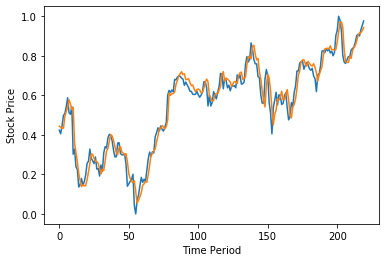

In [17]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={targets:testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY) #파란선
    plt.plot(test_predict) #주황선
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()


In [18]:
# LSTM 과 선형회귀와 어떤 차이가 있는지 살펴보기
# LSTM은 LONG Short-term Memory의 약자임.
# 끝으로 RNN은 다양하게 쓰일 수 있으므로 반드시 알아놓고 가기

## 7. Sources
---

- [Main site](https://hunkim.github.io/ml/)
- [Github](https://hunkim.github.io/ml/)